In [152]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from keras import objectives



In [153]:
import pandas as pd
muse=pd.read_csv("museMonitor_train1.csv",sep=',')
muse=muse.drop(['TimeStamp','Elements','HeadBandOn','HSI_AF7','HSI_AF8','HSI_TP9','HSI_TP10','Battery'],1);
muse.shape

(1848, 31)

In [154]:
muse.columns

Index(['Delta_TP9', 'Delta_AF7', 'Delta_AF8', 'Delta_TP10', 'Theta_TP9',
       'Theta_AF7', 'Theta_AF8', 'Theta_TP10', 'Alpha_TP9', 'Alpha_AF7',
       'Alpha_AF8', 'Alpha_TP10', 'Beta_TP9', 'Beta_AF7', 'Beta_AF8',
       'Beta_TP10', 'Gamma_TP9', 'Gamma_AF7', 'Gamma_AF8', 'Gamma_TP10',
       'RAW_TP9', 'RAW_AF7', 'RAW_AF8', 'RAW_TP10', 'AUX_RIGHT',
       'Accelerometer_X', 'Accelerometer_Y', 'Accelerometer_Z', 'Gyro_X',
       'Gyro_Y', 'Gyro_Z'],
      dtype='object')

In [155]:
muse=muse.drop([3])
muse=muse[['Delta_TP9', 'Delta_AF7', 'Delta_AF8', 'Delta_TP10', 'Theta_TP9',
       'Theta_AF7', 'Theta_AF8', 'Theta_TP10', 'Alpha_TP9', 'Alpha_AF7',
       'Alpha_AF8', 'Alpha_TP10', 'Beta_TP9', 'Beta_AF7', 'Beta_AF8',
       'Beta_TP10', 'Gamma_TP9', 'Gamma_AF7', 'Gamma_AF8', 'Gamma_TP10']]

In [156]:
def norm(x):
    return (x-np.min(x))/(np.max(x)-np.min(x))

for i in range(0,muse.shape[1]):
    muse.iloc[:,i]=norm(muse.iloc[:,i])

In [157]:
from skimage import io, color
from skimage.transform import resize

In [158]:
#! pip install opencv-python
import cv2
#rgb=cv2.cvtColor(np.array(muse).astype(np.float32),cv2.COLOR_GRAY2RGB)

In [159]:
#426
#320

x=260
y=260

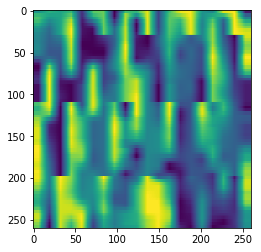

In [160]:
rgb = cv2.resize(np.array(muse),(x, y))
plt.imshow(rgb)

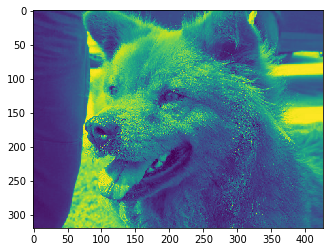

In [161]:
from PIL import Image
img=Image.open('muse_dog.jpg')
gray = cv2.cvtColor(np.array(img), cv2.COLOR_BGR2GRAY)
plt.imshow(norm(gray))
plt.show()

In [162]:
np.array(gray).shape

(320, 426)

In [163]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Concatenate
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, UpSampling2D, Reshape
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import ELU
from tensorflow.keras.layers import GlobalAveragePooling2D


In [164]:
input_shape=(x,y,1)

input_img = Input(batch_shape=(None, x,y,1))
squeeze=Conv2D(128, 3,3,
                          padding='same',
                        input_shape=input_shape)(input_img)
squeeze0=Activation('relu')(squeeze)
squeeze=BatchNormalization()(squeeze)
squeeze=MaxPooling2D(pool_size=(2,2))(squeeze)
squeeze=UpSampling2D(size=(2, 2))(squeeze)

squeeze=Conv2D(128, 3,3,
                            kernel_initializer='glorot_uniform')(squeeze)
squeeze0=Activation('relu')(squeeze)
squeeze0=Dense(100)(squeeze0)
squeeze0=Reshape((280,280))(squeeze0)
squeeze0=Activation('relu')(squeeze0)

model = Model(inputs = input_img, outputs = squeeze0)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 260, 260, 1)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 87, 87, 128)       1280      
_________________________________________________________________
batch_normalization_8 (Batch (None, 87, 87, 128)       512       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 43, 43, 128)       0         
_________________________________________________________________
up_sampling2d_8 (UpSampling2 (None, 86, 86, 128)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 28, 28, 128)       147584    
_________________________________________________________________
activation_25 (Activation)   (None, 28, 28, 128)       0         
__________

In [165]:
x_train0=cv2.resize(np.array(rgb),(x, y))
y_train0=cv2.resize(np.array(norm(gray)),( 280,280))

x_train=x_train0.reshape(1,x,y,1)
y_train=y_train0.reshape(1,280,280)

filepath="/home/ubuntu/anaconda3/VAE/VAE_MUSE-{loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True)



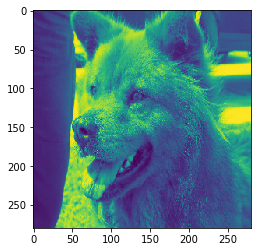

In [166]:
plt.imshow(y_train0)

In [167]:
from tensorflow.keras import optimizers

RMS = optimizers.RMSprop(lr=0.00007, rho=0.9, epsilon=None, decay=0.0)

model.compile(loss='mean_squared_error', optimizer=RMS)

model.fit(x_train, y_train,verbose=1,
        epochs=30000,
        batch_size=1,callbacks=[checkpoint])

Epoch 1/30000
1/1 [==============================] - 1s 719ms/step - loss: 0.1837

Epoch 00001: loss improved from inf to 0.18369, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.1837.hdf5
Epoch 2/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.1684

Epoch 00002: loss improved from 0.18369 to 0.16843, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.1684.hdf5
Epoch 3/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.1614

Epoch 00003: loss improved from 0.16843 to 0.16142, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.1614.hdf5
Epoch 4/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.1563

Epoch 00004: loss improved from 0.16142 to 0.15635, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.1563.hdf5
Epoch 5/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.1524

Epoch 00005: loss improved from 0.15635 to 0.15239, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.1524.hdf5
Epoch 6/30000
1/1

Epoch 43/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.1113

Epoch 00043: loss improved from 0.11185 to 0.11131, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.1113.hdf5
Epoch 44/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.1108

Epoch 00044: loss improved from 0.11131 to 0.11077, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.1108.hdf5
Epoch 45/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.1102

Epoch 00045: loss improved from 0.11077 to 0.11023, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.1102.hdf5
Epoch 46/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.1097

Epoch 00046: loss improved from 0.11023 to 0.10973, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.1097.hdf5
Epoch 47/30000
1/1 [==============================] - 0s 8ms/step - loss: 0.1092

Epoch 00047: loss improved from 0.10973 to 0.10922, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.1092.hdf5
Epoch 48/3


Epoch 00084: loss improved from 0.09339 to 0.09316, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0932.hdf5
Epoch 85/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0930

Epoch 00085: loss improved from 0.09316 to 0.09297, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0930.hdf5
Epoch 86/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0927

Epoch 00086: loss improved from 0.09297 to 0.09271, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0927.hdf5
Epoch 87/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0923

Epoch 00087: loss improved from 0.09271 to 0.09232, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0923.hdf5
Epoch 88/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0919

Epoch 00088: loss improved from 0.09232 to 0.09193, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0919.hdf5
Epoch 89/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0915

Epoch 000

Epoch 126/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0813

Epoch 00126: loss improved from 0.08149 to 0.08131, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0813.hdf5
Epoch 127/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0811

Epoch 00127: loss improved from 0.08131 to 0.08113, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0811.hdf5
Epoch 128/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0810

Epoch 00128: loss improved from 0.08113 to 0.08097, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0810.hdf5
Epoch 129/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0808

Epoch 00129: loss improved from 0.08097 to 0.08080, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0808.hdf5
Epoch 130/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0806

Epoch 00130: loss improved from 0.08080 to 0.08060, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0806.hdf5
Epoch

Epoch 168/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0744

Epoch 00168: loss improved from 0.07444 to 0.07436, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0744.hdf5
Epoch 169/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0743

Epoch 00169: loss improved from 0.07436 to 0.07428, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0743.hdf5
Epoch 170/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0742

Epoch 00170: loss improved from 0.07428 to 0.07415, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0742.hdf5
Epoch 171/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0740

Epoch 00171: loss improved from 0.07415 to 0.07396, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0740.hdf5
Epoch 172/30000
1/1 [==============================] - 0s 8ms/step - loss: 0.0738

Epoch 00172: loss improved from 0.07396 to 0.07376, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0738.hdf5
Epoch


Epoch 00209: loss improved from 0.07019 to 0.07005, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0700.hdf5
Epoch 210/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0700

Epoch 00210: loss improved from 0.07005 to 0.06996, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0700.hdf5
Epoch 211/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0699

Epoch 00211: loss improved from 0.06996 to 0.06990, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0699.hdf5
Epoch 212/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0699

Epoch 00212: loss did not improve from 0.06990
Epoch 213/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0699

Epoch 00213: loss improved from 0.06990 to 0.06986, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0699.hdf5
Epoch 214/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0698

Epoch 00214: loss improved from 0.06986 to 0.06976, saving model to /home

Epoch 253/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0668

Epoch 00253: loss improved from 0.06703 to 0.06681, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0668.hdf5
Epoch 254/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0667

Epoch 00254: loss improved from 0.06681 to 0.06667, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0667.hdf5
Epoch 255/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0665

Epoch 00255: loss improved from 0.06667 to 0.06655, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0665.hdf5
Epoch 256/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0665

Epoch 00256: loss improved from 0.06655 to 0.06649, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0665.hdf5
Epoch 257/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0664

Epoch 00257: loss improved from 0.06649 to 0.06645, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0664.hdf5
Epoch


Epoch 00298: loss improved from 0.06435 to 0.06428, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0643.hdf5
Epoch 299/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0642

Epoch 00299: loss improved from 0.06428 to 0.06422, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0642.hdf5
Epoch 300/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0641

Epoch 00300: loss improved from 0.06422 to 0.06410, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0641.hdf5
Epoch 301/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0641

Epoch 00301: loss improved from 0.06410 to 0.06408, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0641.hdf5
Epoch 302/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0641

Epoch 00302: loss did not improve from 0.06408
Epoch 303/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0643

Epoch 00303: loss did not improve from 0.06408
Epoch 304/30000
1/1 [=====

Epoch 345/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0617

Epoch 00345: loss improved from 0.06169 to 0.06169, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0617.hdf5
Epoch 346/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0617

Epoch 00346: loss did not improve from 0.06169
Epoch 347/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0618

Epoch 00347: loss did not improve from 0.06169
Epoch 348/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0619

Epoch 00348: loss did not improve from 0.06169
Epoch 349/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0618

Epoch 00349: loss did not improve from 0.06169
Epoch 350/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0617

Epoch 00350: loss did not improve from 0.06169
Epoch 351/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0616

Epoch 00351: loss improved from 0.06169 to 0.06158, saving model to 

1/1 [==============================] - 0s 7ms/step - loss: 0.0601

Epoch 00394: loss did not improve from 0.06005
Epoch 395/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0601

Epoch 00395: loss did not improve from 0.06005
Epoch 396/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0600

Epoch 00396: loss improved from 0.06005 to 0.06005, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0600.hdf5
Epoch 397/30000
1/1 [==============================] - 0s 8ms/step - loss: 0.0599

Epoch 00397: loss improved from 0.06005 to 0.05994, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0599.hdf5
Epoch 398/30000
1/1 [==============================] - 0s 8ms/step - loss: 0.0599

Epoch 00398: loss improved from 0.05994 to 0.05986, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0599.hdf5
Epoch 399/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0598

Epoch 00399: loss improved from 0.05986 to 0.05977, saving model to /home/ub

Epoch 442/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0583

Epoch 00442: loss did not improve from 0.05833
Epoch 443/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0583

Epoch 00443: loss did not improve from 0.05833
Epoch 444/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0584

Epoch 00444: loss did not improve from 0.05833
Epoch 445/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0584

Epoch 00445: loss did not improve from 0.05833
Epoch 446/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0584

Epoch 00446: loss did not improve from 0.05833
Epoch 447/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0583

Epoch 00447: loss did not improve from 0.05833
Epoch 448/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0583

Epoch 00448: loss improved from 0.05833 to 0.05829, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0583.hdf5
Epoch 449/30000
1/1 [


Epoch 00492: loss improved from 0.05684 to 0.05681, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0568.hdf5
Epoch 493/30000
1/1 [==============================] - 0s 8ms/step - loss: 0.0568

Epoch 00493: loss improved from 0.05681 to 0.05676, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0568.hdf5
Epoch 494/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0568

Epoch 00494: loss improved from 0.05676 to 0.05675, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0568.hdf5
Epoch 495/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0567

Epoch 00495: loss improved from 0.05675 to 0.05668, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0567.hdf5
Epoch 496/30000
1/1 [==============================] - 0s 8ms/step - loss: 0.0567

Epoch 00496: loss improved from 0.05668 to 0.05666, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0567.hdf5
Epoch 497/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0566

Epoc

Epoch 540/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0555

Epoch 00540: loss did not improve from 0.05546
Epoch 541/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0554

Epoch 00541: loss improved from 0.05546 to 0.05542, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0554.hdf5
Epoch 542/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0554

Epoch 00542: loss did not improve from 0.05542
Epoch 543/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0554

Epoch 00543: loss improved from 0.05542 to 0.05539, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0554.hdf5
Epoch 544/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0555

Epoch 00544: loss did not improve from 0.05539
Epoch 545/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0555

Epoch 00545: loss did not improve from 0.05539
Epoch 546/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0554


Epoch 591/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0541

Epoch 00591: loss improved from 0.05425 to 0.05411, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0541.hdf5
Epoch 592/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0540

Epoch 00592: loss improved from 0.05411 to 0.05404, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0540.hdf5
Epoch 593/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0540

Epoch 00593: loss improved from 0.05404 to 0.05400, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0540.hdf5
Epoch 594/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0540

Epoch 00594: loss did not improve from 0.05400
Epoch 595/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0541

Epoch 00595: loss did not improve from 0.05400
Epoch 596/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0542

Epoch 00596: loss did not improve from 0.05400
Epoch 597/300


Epoch 00642: loss did not improve from 0.05304
Epoch 643/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0531

Epoch 00643: loss did not improve from 0.05304
Epoch 644/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0531

Epoch 00644: loss did not improve from 0.05304
Epoch 645/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0530

Epoch 00645: loss improved from 0.05304 to 0.05298, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0530.hdf5
Epoch 646/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0529

Epoch 00646: loss improved from 0.05298 to 0.05294, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0529.hdf5
Epoch 647/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0529

Epoch 00647: loss improved from 0.05294 to 0.05289, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0529.hdf5
Epoch 648/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0529

Epoch 00648:


Epoch 00693: loss improved from 0.05209 to 0.05204, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0520.hdf5
Epoch 694/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0520

Epoch 00694: loss improved from 0.05204 to 0.05201, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0520.hdf5
Epoch 695/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0519

Epoch 00695: loss improved from 0.05201 to 0.05194, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0519.hdf5
Epoch 696/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0519

Epoch 00696: loss did not improve from 0.05194
Epoch 697/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0520

Epoch 00697: loss did not improve from 0.05194
Epoch 698/30000
1/1 [==============================] - 0s 8ms/step - loss: 0.0520

Epoch 00698: loss did not improve from 0.05194
Epoch 699/30000
1/1 [==============================] - 0s 8ms/step - loss: 0.0520

Epoch 00699:


Epoch 00746: loss did not improve from 0.05113
Epoch 747/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0511

Epoch 00747: loss improved from 0.05113 to 0.05109, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0511.hdf5
Epoch 748/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0510

Epoch 00748: loss improved from 0.05109 to 0.05104, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0510.hdf5
Epoch 749/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0510

Epoch 00749: loss improved from 0.05104 to 0.05103, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0510.hdf5
Epoch 750/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0510

Epoch 00750: loss improved from 0.05103 to 0.05102, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0510.hdf5
Epoch 751/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0510

Epoch 00751: loss did not improve from 0.05102
Epoch 752/30000
1/1 [=====


Epoch 00798: loss did not improve from 0.05040
Epoch 799/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0504

Epoch 00799: loss improved from 0.05040 to 0.05037, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0504.hdf5
Epoch 800/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0504

Epoch 00800: loss improved from 0.05037 to 0.05037, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0504.hdf5
Epoch 801/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0503

Epoch 00801: loss improved from 0.05037 to 0.05032, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0503.hdf5
Epoch 802/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0503

Epoch 00802: loss improved from 0.05032 to 0.05032, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0503.hdf5
Epoch 803/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0502

Epoch 00803: loss improved from 0.05032 to 0.05025, saving model to /home

1/1 [==============================] - 0s 8ms/step - loss: 0.0498

Epoch 00851: loss did not improve from 0.04957
Epoch 852/30000
1/1 [==============================] - 0s 8ms/step - loss: 0.0498

Epoch 00852: loss did not improve from 0.04957
Epoch 853/30000
1/1 [==============================] - 0s 8ms/step - loss: 0.0497

Epoch 00853: loss did not improve from 0.04957
Epoch 854/30000
1/1 [==============================] - 0s 8ms/step - loss: 0.0497

Epoch 00854: loss did not improve from 0.04957
Epoch 855/30000
1/1 [==============================] - 0s 8ms/step - loss: 0.0496

Epoch 00855: loss did not improve from 0.04957
Epoch 856/30000
1/1 [==============================] - 0s 8ms/step - loss: 0.0495

Epoch 00856: loss improved from 0.04957 to 0.04951, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0495.hdf5
Epoch 857/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0495

Epoch 00857: loss improved from 0.04951 to 0.04950, saving model to /home/ubuntu/ana


Epoch 00906: loss did not improve from 0.04894
Epoch 907/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0489

Epoch 00907: loss did not improve from 0.04894
Epoch 908/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0489

Epoch 00908: loss improved from 0.04894 to 0.04892, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0489.hdf5
Epoch 909/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0489

Epoch 00909: loss improved from 0.04892 to 0.04890, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0489.hdf5
Epoch 910/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0489

Epoch 00910: loss improved from 0.04890 to 0.04890, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0489.hdf5
Epoch 911/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0489

Epoch 00911: loss improved from 0.04890 to 0.04886, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0489.hdf5
Epoch 912/30000
1/1 [=====


Epoch 00960: loss did not improve from 0.04829
Epoch 961/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0485

Epoch 00961: loss did not improve from 0.04829
Epoch 962/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0484

Epoch 00962: loss did not improve from 0.04829
Epoch 963/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0483

Epoch 00963: loss improved from 0.04829 to 0.04826, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0483.hdf5
Epoch 964/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0482

Epoch 00964: loss improved from 0.04826 to 0.04823, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0482.hdf5
Epoch 965/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0482

Epoch 00965: loss improved from 0.04823 to 0.04822, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0482.hdf5
Epoch 966/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0482

Epoch 00966:

1/1 [==============================] - 0s 7ms/step - loss: 0.0478

Epoch 01015: loss did not improve from 0.04772
Epoch 1016/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0478

Epoch 01016: loss did not improve from 0.04772
Epoch 1017/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0478

Epoch 01017: loss did not improve from 0.04772
Epoch 1018/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0478

Epoch 01018: loss did not improve from 0.04772
Epoch 1019/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0477

Epoch 01019: loss improved from 0.04772 to 0.04770, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0477.hdf5
Epoch 1020/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0477

Epoch 01020: loss improved from 0.04770 to 0.04766, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0477.hdf5
Epoch 1021/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0476

Epoch 010

Epoch 1071/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0472

Epoch 01071: loss improved from 0.04721 to 0.04716, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0472.hdf5
Epoch 1072/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0472

Epoch 01072: loss did not improve from 0.04716
Epoch 1073/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0472

Epoch 01073: loss did not improve from 0.04716
Epoch 1074/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0472

Epoch 01074: loss improved from 0.04716 to 0.04716, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0472.hdf5
Epoch 1075/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0471

Epoch 01075: loss improved from 0.04716 to 0.04712, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0471.hdf5
Epoch 1076/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0471

Epoch 01076: loss improved from 0.04712 to 0.04707, sa


Epoch 01126: loss did not improve from 0.04666
Epoch 1127/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0467

Epoch 01127: loss did not improve from 0.04666
Epoch 1128/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0467

Epoch 01128: loss did not improve from 0.04666
Epoch 1129/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0466

Epoch 01129: loss improved from 0.04666 to 0.04664, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0466.hdf5
Epoch 1130/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0466

Epoch 01130: loss improved from 0.04664 to 0.04658, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0466.hdf5
Epoch 1131/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0465

Epoch 01131: loss improved from 0.04658 to 0.04648, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0465.hdf5
Epoch 1132/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0464

Epoch 

1/1 [==============================] - 0s 7ms/step - loss: 0.0460

Epoch 01182: loss improved from 0.04607 to 0.04602, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0460.hdf5
Epoch 1183/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0459

Epoch 01183: loss improved from 0.04602 to 0.04595, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0459.hdf5
Epoch 1184/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0459

Epoch 01184: loss improved from 0.04595 to 0.04591, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0459.hdf5
Epoch 1185/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0459

Epoch 01185: loss did not improve from 0.04591
Epoch 1186/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0460

Epoch 01186: loss did not improve from 0.04591
Epoch 1187/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0461

Epoch 01187: loss did not improve from 0.04591
Epoch 1188/30000
1/1 [==


Epoch 01237: loss improved from 0.04554 to 0.04541, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0454.hdf5
Epoch 1238/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0454

Epoch 01238: loss improved from 0.04541 to 0.04536, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0454.hdf5
Epoch 1239/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0454

Epoch 01239: loss improved from 0.04536 to 0.04535, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0454.hdf5
Epoch 1240/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0454

Epoch 01240: loss did not improve from 0.04535
Epoch 1241/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0455

Epoch 01241: loss did not improve from 0.04535
Epoch 1242/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0457

Epoch 01242: loss did not improve from 0.04535
Epoch 1243/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0459

Epoch 


Epoch 01293: loss did not improve from 0.04494
Epoch 1294/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0451

Epoch 01294: loss did not improve from 0.04494
Epoch 1295/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0452

Epoch 01295: loss did not improve from 0.04494
Epoch 1296/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0453

Epoch 01296: loss did not improve from 0.04494
Epoch 1297/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0454

Epoch 01297: loss did not improve from 0.04494
Epoch 1298/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0453

Epoch 01298: loss did not improve from 0.04494
Epoch 1299/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0452

Epoch 01299: loss did not improve from 0.04494
Epoch 1300/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0451

Epoch 01300: loss did not improve from 0.04494
Epoch 1301/30000
1/1 [=============

1/1 [==============================] - 0s 6ms/step - loss: 0.0450

Epoch 01350: loss did not improve from 0.04443
Epoch 1351/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0448

Epoch 01351: loss did not improve from 0.04443
Epoch 1352/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0446

Epoch 01352: loss did not improve from 0.04443
Epoch 1353/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0444

Epoch 01353: loss did not improve from 0.04443
Epoch 1354/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0444

Epoch 01354: loss improved from 0.04443 to 0.04437, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0444.hdf5
Epoch 1355/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0444

Epoch 01355: loss improved from 0.04437 to 0.04436, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0444.hdf5
Epoch 1356/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0444

Epoch 013


Epoch 01407: loss improved from 0.04400 to 0.04389, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0439.hdf5
Epoch 1408/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0439

Epoch 01408: loss improved from 0.04389 to 0.04388, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0439.hdf5
Epoch 1409/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0439

Epoch 01409: loss did not improve from 0.04388
Epoch 1410/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0441

Epoch 01410: loss did not improve from 0.04388
Epoch 1411/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0443

Epoch 01411: loss did not improve from 0.04388
Epoch 1412/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0446

Epoch 01412: loss did not improve from 0.04388
Epoch 1413/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0446

Epoch 01413: loss did not improve from 0.04388
Epoch 1414/30000
1/1 [======


Epoch 01464: loss did not improve from 0.04347
Epoch 1465/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0442

Epoch 01465: loss did not improve from 0.04347
Epoch 1466/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0440

Epoch 01466: loss did not improve from 0.04347
Epoch 1467/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0438

Epoch 01467: loss did not improve from 0.04347
Epoch 1468/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0436

Epoch 01468: loss did not improve from 0.04347
Epoch 1469/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0434

Epoch 01469: loss improved from 0.04347 to 0.04342, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0434.hdf5
Epoch 1470/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0433

Epoch 01470: loss improved from 0.04342 to 0.04334, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0433.hdf5
Epoch 1471/30000
1/1 [======

1/1 [==============================] - 0s 6ms/step - loss: 0.0430

Epoch 01522: loss did not improve from 0.04295
Epoch 1523/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0429

Epoch 01523: loss improved from 0.04295 to 0.04291, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0429.hdf5
Epoch 1524/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0429

Epoch 01524: loss improved from 0.04291 to 0.04288, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0429.hdf5
Epoch 1525/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0429

Epoch 01525: loss did not improve from 0.04288
Epoch 1526/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0431

Epoch 01526: loss did not improve from 0.04288
Epoch 1527/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0433

Epoch 01527: loss did not improve from 0.04288
Epoch 1528/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0436

Epoch 015

Epoch 1579/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0425

Epoch 01579: loss improved from 0.04246 to 0.04245, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0425.hdf5
Epoch 1580/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0425

Epoch 01580: loss did not improve from 0.04245
Epoch 1581/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0427

Epoch 01581: loss did not improve from 0.04245
Epoch 1582/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0430

Epoch 01582: loss did not improve from 0.04245
Epoch 1583/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0434

Epoch 01583: loss did not improve from 0.04245
Epoch 1584/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0436

Epoch 01584: loss did not improve from 0.04245
Epoch 1585/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0433

Epoch 01585: loss did not improve from 0.04245
Epoch 1586/300

Epoch 1636/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0420

Epoch 01636: loss did not improve from 0.04198
Epoch 1637/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0422

Epoch 01637: loss did not improve from 0.04198
Epoch 1638/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0426

Epoch 01638: loss did not improve from 0.04198
Epoch 1639/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0430

Epoch 01639: loss did not improve from 0.04198
Epoch 1640/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0431

Epoch 01640: loss did not improve from 0.04198
Epoch 1641/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0429

Epoch 01641: loss did not improve from 0.04198
Epoch 1642/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0426

Epoch 01642: loss did not improve from 0.04198
Epoch 1643/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0423



Epoch 01697: loss did not improve from 0.04178
Epoch 1698/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0418

Epoch 01698: loss did not improve from 0.04178
Epoch 1699/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0417

Epoch 01699: loss improved from 0.04178 to 0.04167, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0417.hdf5
Epoch 1700/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0416

Epoch 01700: loss improved from 0.04167 to 0.04161, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0416.hdf5
Epoch 1701/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0416

Epoch 01701: loss did not improve from 0.04161
Epoch 1702/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0419

Epoch 01702: loss did not improve from 0.04161
Epoch 1703/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0422

Epoch 01703: loss did not improve from 0.04161
Epoch 1704/30000
1/1 [======


Epoch 01757: loss did not improve from 0.04128
Epoch 1758/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0416

Epoch 01758: loss did not improve from 0.04128
Epoch 1759/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0418

Epoch 01759: loss did not improve from 0.04128
Epoch 1760/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0421

Epoch 01760: loss did not improve from 0.04128
Epoch 1761/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0422

Epoch 01761: loss did not improve from 0.04128
Epoch 1762/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0419

Epoch 01762: loss did not improve from 0.04128
Epoch 1763/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0416

Epoch 01763: loss did not improve from 0.04128
Epoch 1764/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0414

Epoch 01764: loss did not improve from 0.04128
Epoch 1765/30000
1/1 [=============

1/1 [==============================] - 0s 5ms/step - loss: 0.0417

Epoch 01816: loss did not improve from 0.04084
Epoch 1817/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0414

Epoch 01817: loss did not improve from 0.04084
Epoch 1818/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0412

Epoch 01818: loss did not improve from 0.04084
Epoch 1819/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0411

Epoch 01819: loss did not improve from 0.04084
Epoch 1820/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0410

Epoch 01820: loss did not improve from 0.04084
Epoch 1821/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0410

Epoch 01821: loss did not improve from 0.04084
Epoch 1822/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0410

Epoch 01822: loss did not improve from 0.04084
Epoch 1823/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0410

Epoch 01823: los


Epoch 01875: loss did not improve from 0.04050
Epoch 1876/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0405

Epoch 01876: loss improved from 0.04050 to 0.04050, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0405.hdf5
Epoch 1877/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0404

Epoch 01877: loss improved from 0.04050 to 0.04040, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0404.hdf5
Epoch 1878/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0404

Epoch 01878: loss improved from 0.04040 to 0.04037, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0404.hdf5
Epoch 1879/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0404

Epoch 01879: loss did not improve from 0.04037
Epoch 1880/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0407

Epoch 01880: loss did not improve from 0.04037
Epoch 1881/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0411

Epoch 

1/1 [==============================] - 0s 5ms/step - loss: 0.0404

Epoch 01933: loss did not improve from 0.04005
Epoch 1934/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0402

Epoch 01934: loss did not improve from 0.04005
Epoch 1935/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0400

Epoch 01935: loss improved from 0.04005 to 0.04004, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0400.hdf5
Epoch 1936/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0400

Epoch 01936: loss improved from 0.04004 to 0.04000, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0400.hdf5
Epoch 1937/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0400

Epoch 01937: loss did not improve from 0.04000
Epoch 1938/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0401

Epoch 01938: loss did not improve from 0.04000
Epoch 1939/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0402

Epoch 019


Epoch 01990: loss did not improve from 0.03965
Epoch 1991/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0404

Epoch 01991: loss did not improve from 0.03965
Epoch 1992/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0408

Epoch 01992: loss did not improve from 0.03965
Epoch 1993/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0410

Epoch 01993: loss did not improve from 0.03965
Epoch 1994/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0410

Epoch 01994: loss did not improve from 0.03965
Epoch 1995/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0406

Epoch 01995: loss did not improve from 0.03965
Epoch 1996/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0401

Epoch 01996: loss did not improve from 0.03965
Epoch 1997/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0398

Epoch 01997: loss did not improve from 0.03965
Epoch 1998/30000
1/1 [=============


Epoch 02049: loss did not improve from 0.03927
Epoch 2050/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0395

Epoch 02050: loss did not improve from 0.03927
Epoch 2051/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0398

Epoch 02051: loss did not improve from 0.03927
Epoch 2052/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0406

Epoch 02052: loss did not improve from 0.03927
Epoch 2053/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0421

Epoch 02053: loss did not improve from 0.03927
Epoch 2054/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0425

Epoch 02054: loss did not improve from 0.03927
Epoch 2055/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0410

Epoch 02055: loss did not improve from 0.03927
Epoch 2056/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0399

Epoch 02056: loss did not improve from 0.03927
Epoch 2057/30000
1/1 [=============


Epoch 02110: loss did not improve from 0.03890
Epoch 2111/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0392

Epoch 02111: loss did not improve from 0.03890
Epoch 2112/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0390

Epoch 02112: loss did not improve from 0.03890
Epoch 2113/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0388

Epoch 02113: loss improved from 0.03890 to 0.03884, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0388.hdf5
Epoch 2114/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0388

Epoch 02114: loss improved from 0.03884 to 0.03884, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0388.hdf5
Epoch 2115/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0389

Epoch 02115: loss did not improve from 0.03884
Epoch 2116/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0389

Epoch 02116: loss did not improve from 0.03884
Epoch 2117/30000
1/1 [======


Epoch 02168: loss improved from 0.03858 to 0.03854, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0385.hdf5
Epoch 2169/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0386

Epoch 02169: loss did not improve from 0.03854
Epoch 2170/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0387

Epoch 02170: loss did not improve from 0.03854
Epoch 2171/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0388

Epoch 02171: loss did not improve from 0.03854
Epoch 2172/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0388

Epoch 02172: loss did not improve from 0.03854
Epoch 2173/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0389

Epoch 02173: loss did not improve from 0.03854
Epoch 2174/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0387

Epoch 02174: loss did not improve from 0.03854
Epoch 2175/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0387

Epoch 02175: 


Epoch 02227: loss did not improve from 0.03825
Epoch 2228/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0384

Epoch 02228: loss did not improve from 0.03825
Epoch 2229/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0383

Epoch 02229: loss did not improve from 0.03825
Epoch 2230/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0384

Epoch 02230: loss did not improve from 0.03825
Epoch 2231/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0384

Epoch 02231: loss did not improve from 0.03825
Epoch 2232/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0385

Epoch 02232: loss did not improve from 0.03825
Epoch 2233/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0388

Epoch 02233: loss did not improve from 0.03825
Epoch 2234/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0394

Epoch 02234: loss did not improve from 0.03825
Epoch 2235/30000
1/1 [=============


Epoch 02286: loss did not improve from 0.03791
Epoch 2287/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0380

Epoch 02287: loss did not improve from 0.03791
Epoch 2288/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0381

Epoch 02288: loss did not improve from 0.03791
Epoch 2289/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0382

Epoch 02289: loss did not improve from 0.03791
Epoch 2290/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0386

Epoch 02290: loss did not improve from 0.03791
Epoch 2291/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0394

Epoch 02291: loss did not improve from 0.03791
Epoch 2292/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0402

Epoch 02292: loss did not improve from 0.03791
Epoch 2293/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0400

Epoch 02293: loss did not improve from 0.03791
Epoch 2294/30000
1/1 [=============


Epoch 02345: loss did not improve from 0.03763
Epoch 2346/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0382

Epoch 02346: loss did not improve from 0.03763
Epoch 2347/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0389

Epoch 02347: loss did not improve from 0.03763
Epoch 2348/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0400

Epoch 02348: loss did not improve from 0.03763
Epoch 2349/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0402

Epoch 02349: loss did not improve from 0.03763
Epoch 2350/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0393

Epoch 02350: loss did not improve from 0.03763
Epoch 2351/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0383

Epoch 02351: loss did not improve from 0.03763
Epoch 2352/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0378

Epoch 02352: loss did not improve from 0.03763
Epoch 2353/30000
1/1 [=============


Epoch 02405: loss did not improve from 0.03730
Epoch 2406/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0397

Epoch 02406: loss did not improve from 0.03730
Epoch 2407/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0388

Epoch 02407: loss did not improve from 0.03730
Epoch 2408/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0381

Epoch 02408: loss did not improve from 0.03730
Epoch 2409/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0375

Epoch 02409: loss did not improve from 0.03730
Epoch 2410/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0373

Epoch 02410: loss improved from 0.03730 to 0.03727, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0373.hdf5
Epoch 2411/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0372

Epoch 02411: loss improved from 0.03727 to 0.03723, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0372.hdf5
Epoch 2412/30000
1/1 [======


Epoch 02464: loss did not improve from 0.03690
Epoch 2465/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0369

Epoch 02465: loss did not improve from 0.03690
Epoch 2466/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0371

Epoch 02466: loss did not improve from 0.03690
Epoch 2467/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0375

Epoch 02467: loss did not improve from 0.03690
Epoch 2468/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0380

Epoch 02468: loss did not improve from 0.03690
Epoch 2469/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0380

Epoch 02469: loss did not improve from 0.03690
Epoch 2470/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0379

Epoch 02470: loss did not improve from 0.03690
Epoch 2471/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0375

Epoch 02471: loss did not improve from 0.03690
Epoch 2472/30000
1/1 [=============

1/1 [==============================] - 0s 5ms/step - loss: 0.0370

Epoch 02525: loss did not improve from 0.03662
Epoch 2526/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0369

Epoch 02526: loss did not improve from 0.03662
Epoch 2527/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0370

Epoch 02527: loss did not improve from 0.03662
Epoch 2528/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0370

Epoch 02528: loss did not improve from 0.03662
Epoch 2529/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0371

Epoch 02529: loss did not improve from 0.03662
Epoch 2530/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0373

Epoch 02530: loss did not improve from 0.03662
Epoch 2531/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0378

Epoch 02531: loss did not improve from 0.03662
Epoch 2532/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0382

Epoch 02532: los


Epoch 02584: loss did not improve from 0.03624
Epoch 2585/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0373

Epoch 02585: loss did not improve from 0.03624
Epoch 2586/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0370

Epoch 02586: loss did not improve from 0.03624
Epoch 2587/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0369

Epoch 02587: loss did not improve from 0.03624
Epoch 2588/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0368

Epoch 02588: loss did not improve from 0.03624
Epoch 2589/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0369

Epoch 02589: loss did not improve from 0.03624
Epoch 2590/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0370

Epoch 02590: loss did not improve from 0.03624
Epoch 2591/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0370

Epoch 02591: loss did not improve from 0.03624
Epoch 2592/30000
1/1 [=============


Epoch 02645: loss did not improve from 0.03610
Epoch 2646/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0369

Epoch 02646: loss did not improve from 0.03610
Epoch 2647/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0366

Epoch 02647: loss did not improve from 0.03610
Epoch 2648/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0364

Epoch 02648: loss did not improve from 0.03610
Epoch 2649/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0362

Epoch 02649: loss did not improve from 0.03610
Epoch 2650/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0361

Epoch 02650: loss improved from 0.03610 to 0.03610, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0361.hdf5
Epoch 2651/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0360

Epoch 02651: loss improved from 0.03610 to 0.03603, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0360.hdf5
Epoch 2652/30000
1/1 [======

1/1 [==============================] - 0s 6ms/step - loss: 0.0364

Epoch 02703: loss did not improve from 0.03565
Epoch 2704/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0360

Epoch 02704: loss did not improve from 0.03565
Epoch 2705/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0357

Epoch 02705: loss did not improve from 0.03565
Epoch 2706/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0356

Epoch 02706: loss improved from 0.03565 to 0.03563, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0356.hdf5
Epoch 2707/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0356

Epoch 02707: loss improved from 0.03563 to 0.03559, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0356.hdf5
Epoch 2708/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0356

Epoch 02708: loss improved from 0.03559 to 0.03558, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0356.hdf5
Epoch 2709/30000
1/1 [==


Epoch 02762: loss did not improve from 0.03546
Epoch 2763/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0359

Epoch 02763: loss did not improve from 0.03546
Epoch 2764/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0365

Epoch 02764: loss did not improve from 0.03546
Epoch 2765/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0372

Epoch 02765: loss did not improve from 0.03546
Epoch 2766/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0376

Epoch 02766: loss did not improve from 0.03546
Epoch 2767/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0370

Epoch 02767: loss did not improve from 0.03546
Epoch 2768/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0364

Epoch 02768: loss did not improve from 0.03546
Epoch 2769/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0358

Epoch 02769: loss did not improve from 0.03546
Epoch 2770/30000
1/1 [=============

1/1 [==============================] - 0s 5ms/step - loss: 0.0364

Epoch 02825: loss did not improve from 0.03543
Epoch 2826/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0361

Epoch 02826: loss did not improve from 0.03543
Epoch 2827/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0359

Epoch 02827: loss did not improve from 0.03543
Epoch 2828/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0360

Epoch 02828: loss did not improve from 0.03543
Epoch 2829/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0364

Epoch 02829: loss did not improve from 0.03543
Epoch 2830/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0369

Epoch 02830: loss did not improve from 0.03543
Epoch 2831/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0369

Epoch 02831: loss did not improve from 0.03543
Epoch 2832/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0364

Epoch 02832: los


Epoch 02883: loss did not improve from 0.03483
Epoch 2884/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0362

Epoch 02884: loss did not improve from 0.03483
Epoch 2885/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0361

Epoch 02885: loss did not improve from 0.03483
Epoch 2886/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0358

Epoch 02886: loss did not improve from 0.03483
Epoch 2887/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0355

Epoch 02887: loss did not improve from 0.03483
Epoch 2888/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0352

Epoch 02888: loss did not improve from 0.03483
Epoch 2889/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0351

Epoch 02889: loss did not improve from 0.03483
Epoch 2890/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0350

Epoch 02890: loss did not improve from 0.03483
Epoch 2891/30000
1/1 [=============


Epoch 02944: loss did not improve from 0.03459
Epoch 2945/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0351

Epoch 02945: loss did not improve from 0.03459
Epoch 2946/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0348

Epoch 02946: loss did not improve from 0.03459
Epoch 2947/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0347

Epoch 02947: loss did not improve from 0.03459
Epoch 2948/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0347

Epoch 02948: loss did not improve from 0.03459
Epoch 2949/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0348

Epoch 02949: loss did not improve from 0.03459
Epoch 2950/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0350

Epoch 02950: loss did not improve from 0.03459
Epoch 2951/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0351

Epoch 02951: loss did not improve from 0.03459
Epoch 2952/30000
1/1 [=============

1/1 [==============================] - 0s 5ms/step - loss: 0.0352

Epoch 03005: loss did not improve from 0.03436
Epoch 3006/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0349

Epoch 03006: loss did not improve from 0.03436
Epoch 3007/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0347

Epoch 03007: loss did not improve from 0.03436
Epoch 3008/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0347

Epoch 03008: loss did not improve from 0.03436
Epoch 3009/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0348

Epoch 03009: loss did not improve from 0.03436
Epoch 3010/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0349

Epoch 03010: loss did not improve from 0.03436
Epoch 3011/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0348

Epoch 03011: loss did not improve from 0.03436
Epoch 3012/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0348

Epoch 03012: los

1/1 [==============================] - 0s 6ms/step - loss: 0.0362

Epoch 03065: loss did not improve from 0.03411
Epoch 3066/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0355

Epoch 03066: loss did not improve from 0.03411
Epoch 3067/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0349

Epoch 03067: loss did not improve from 0.03411
Epoch 3068/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0346

Epoch 03068: loss did not improve from 0.03411
Epoch 3069/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0343

Epoch 03069: loss did not improve from 0.03411
Epoch 3070/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0343

Epoch 03070: loss did not improve from 0.03411
Epoch 3071/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0344

Epoch 03071: loss did not improve from 0.03411
Epoch 3072/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0346

Epoch 03072: los


Epoch 03126: loss did not improve from 0.03398
Epoch 3127/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0348

Epoch 03127: loss did not improve from 0.03398
Epoch 3128/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0345

Epoch 03128: loss did not improve from 0.03398
Epoch 3129/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0346

Epoch 03129: loss did not improve from 0.03398
Epoch 3130/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0351

Epoch 03130: loss did not improve from 0.03398
Epoch 3131/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0359

Epoch 03131: loss did not improve from 0.03398
Epoch 3132/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0360

Epoch 03132: loss did not improve from 0.03398
Epoch 3133/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0355

Epoch 03133: loss did not improve from 0.03398
Epoch 3134/30000
1/1 [=============


Epoch 03187: loss did not improve from 0.03374
Epoch 3188/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0339

Epoch 03188: loss did not improve from 0.03374
Epoch 3189/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0340

Epoch 03189: loss did not improve from 0.03374
Epoch 3190/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0346

Epoch 03190: loss did not improve from 0.03374
Epoch 3191/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0356

Epoch 03191: loss did not improve from 0.03374
Epoch 3192/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0357

Epoch 03192: loss did not improve from 0.03374
Epoch 3193/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0349

Epoch 03193: loss did not improve from 0.03374
Epoch 3194/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0343

Epoch 03194: loss did not improve from 0.03374
Epoch 3195/30000
1/1 [=============


Epoch 03247: loss did not improve from 0.03359
Epoch 3248/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0336

Epoch 03248: loss did not improve from 0.03359
Epoch 3249/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0335

Epoch 03249: loss improved from 0.03359 to 0.03354, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0335.hdf5
Epoch 3250/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0335

Epoch 03250: loss improved from 0.03354 to 0.03349, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0335.hdf5
Epoch 3251/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0335

Epoch 03251: loss did not improve from 0.03349
Epoch 3252/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0337

Epoch 03252: loss did not improve from 0.03349
Epoch 3253/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0340

Epoch 03253: loss did not improve from 0.03349
Epoch 3254/30000
1/1 [======

1/1 [==============================] - 0s 6ms/step - loss: 0.0335

Epoch 03306: loss did not improve from 0.03319
Epoch 3307/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0338

Epoch 03307: loss did not improve from 0.03319
Epoch 3308/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0341

Epoch 03308: loss did not improve from 0.03319
Epoch 3309/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0345

Epoch 03309: loss did not improve from 0.03319
Epoch 3310/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0347

Epoch 03310: loss did not improve from 0.03319
Epoch 3311/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0347

Epoch 03311: loss did not improve from 0.03319
Epoch 3312/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0346

Epoch 03312: loss did not improve from 0.03319
Epoch 3313/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0347

Epoch 03313: los

1/1 [==============================] - 0s 5ms/step - loss: 0.0344

Epoch 03369: loss did not improve from 0.03319
Epoch 3370/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0344

Epoch 03370: loss did not improve from 0.03319
Epoch 3371/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0342

Epoch 03371: loss did not improve from 0.03319
Epoch 3372/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0339

Epoch 03372: loss did not improve from 0.03319
Epoch 3373/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0337

Epoch 03373: loss did not improve from 0.03319
Epoch 3374/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0335

Epoch 03374: loss did not improve from 0.03319
Epoch 3375/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0335

Epoch 03375: loss did not improve from 0.03319
Epoch 3376/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0334

Epoch 03376: los


Epoch 03429: loss did not improve from 0.03301
Epoch 3430/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0339

Epoch 03430: loss did not improve from 0.03301
Epoch 3431/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0342

Epoch 03431: loss did not improve from 0.03301
Epoch 3432/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0340

Epoch 03432: loss did not improve from 0.03301
Epoch 3433/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0337

Epoch 03433: loss did not improve from 0.03301
Epoch 3434/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0333

Epoch 03434: loss did not improve from 0.03301
Epoch 3435/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0332

Epoch 03435: loss did not improve from 0.03301
Epoch 3436/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0333

Epoch 03436: loss did not improve from 0.03301
Epoch 3437/30000
1/1 [=============

1/1 [==============================] - 0s 6ms/step - loss: 0.0330

Epoch 03490: loss did not improve from 0.03263
Epoch 3491/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0331

Epoch 03491: loss did not improve from 0.03263
Epoch 3492/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0330

Epoch 03492: loss did not improve from 0.03263
Epoch 3493/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0331

Epoch 03493: loss did not improve from 0.03263
Epoch 3494/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0332

Epoch 03494: loss did not improve from 0.03263
Epoch 3495/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0335

Epoch 03495: loss did not improve from 0.03263
Epoch 3496/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0337

Epoch 03496: loss did not improve from 0.03263
Epoch 3497/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0340

Epoch 03497: los


Epoch 03551: loss did not improve from 0.03233
Epoch 3552/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0329

Epoch 03552: loss did not improve from 0.03233
Epoch 3553/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0327

Epoch 03553: loss did not improve from 0.03233
Epoch 3554/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0326

Epoch 03554: loss did not improve from 0.03233
Epoch 3555/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0326

Epoch 03555: loss did not improve from 0.03233
Epoch 3556/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0329

Epoch 03556: loss did not improve from 0.03233
Epoch 3557/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0333

Epoch 03557: loss did not improve from 0.03233
Epoch 3558/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0335

Epoch 03558: loss did not improve from 0.03233
Epoch 3559/30000
1/1 [=============


Epoch 03611: loss did not improve from 0.03212
Epoch 3612/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0330

Epoch 03612: loss did not improve from 0.03212
Epoch 3613/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0336

Epoch 03613: loss did not improve from 0.03212
Epoch 3614/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0340

Epoch 03614: loss did not improve from 0.03212
Epoch 3615/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0335

Epoch 03615: loss did not improve from 0.03212
Epoch 3616/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0333

Epoch 03616: loss did not improve from 0.03212
Epoch 3617/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0329

Epoch 03617: loss did not improve from 0.03212
Epoch 3618/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0329

Epoch 03618: loss did not improve from 0.03212
Epoch 3619/30000
1/1 [=============


Epoch 03673: loss did not improve from 0.03201
Epoch 3674/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0323

Epoch 03674: loss did not improve from 0.03201
Epoch 3675/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0324

Epoch 03675: loss did not improve from 0.03201
Epoch 3676/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0323

Epoch 03676: loss did not improve from 0.03201
Epoch 3677/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0324

Epoch 03677: loss did not improve from 0.03201
Epoch 3678/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0324

Epoch 03678: loss did not improve from 0.03201
Epoch 3679/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0325

Epoch 03679: loss did not improve from 0.03201
Epoch 3680/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0325

Epoch 03680: loss did not improve from 0.03201
Epoch 3681/30000
1/1 [=============

1/1 [==============================] - 0s 6ms/step - loss: 0.0324

Epoch 03736: loss did not improve from 0.03188
Epoch 3737/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0326

Epoch 03737: loss did not improve from 0.03188
Epoch 3738/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0329

Epoch 03738: loss did not improve from 0.03188
Epoch 3739/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0326

Epoch 03739: loss did not improve from 0.03188
Epoch 3740/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0325

Epoch 03740: loss did not improve from 0.03188
Epoch 3741/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0322

Epoch 03741: loss did not improve from 0.03188
Epoch 3742/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0322

Epoch 03742: loss did not improve from 0.03188
Epoch 3743/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0322

Epoch 03743: los

1/1 [==============================] - 0s 6ms/step - loss: 0.0334

Epoch 03797: loss did not improve from 0.03152
Epoch 3798/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0331

Epoch 03798: loss did not improve from 0.03152
Epoch 3799/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0326

Epoch 03799: loss did not improve from 0.03152
Epoch 3800/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0322

Epoch 03800: loss did not improve from 0.03152
Epoch 3801/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0320

Epoch 03801: loss did not improve from 0.03152
Epoch 3802/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0317

Epoch 03802: loss did not improve from 0.03152
Epoch 3803/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0317

Epoch 03803: loss did not improve from 0.03152
Epoch 3804/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0316

Epoch 03804: los

1/1 [==============================] - 0s 6ms/step - loss: 0.0323

Epoch 03860: loss did not improve from 0.03152
Epoch 3861/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0323

Epoch 03861: loss did not improve from 0.03152
Epoch 3862/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0325

Epoch 03862: loss did not improve from 0.03152
Epoch 3863/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0325

Epoch 03863: loss did not improve from 0.03152
Epoch 3864/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0325

Epoch 03864: loss did not improve from 0.03152
Epoch 3865/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0325

Epoch 03865: loss did not improve from 0.03152
Epoch 3866/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0323

Epoch 03866: loss did not improve from 0.03152
Epoch 3867/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0322

Epoch 03867: los


Epoch 03920: loss did not improve from 0.03127
Epoch 3921/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0325

Epoch 03921: loss did not improve from 0.03127
Epoch 3922/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0320

Epoch 03922: loss did not improve from 0.03127
Epoch 3923/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0317

Epoch 03923: loss did not improve from 0.03127
Epoch 3924/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0313

Epoch 03924: loss did not improve from 0.03127
Epoch 3925/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0312

Epoch 03925: loss improved from 0.03127 to 0.03122, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0312.hdf5
Epoch 3926/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0312

Epoch 03926: loss improved from 0.03122 to 0.03115, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0312.hdf5
Epoch 3927/30000
1/1 [======

1/1 [==============================] - 0s 5ms/step - loss: 0.0320

Epoch 03982: loss did not improve from 0.03115
Epoch 3983/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0319

Epoch 03983: loss did not improve from 0.03115
Epoch 3984/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0317

Epoch 03984: loss did not improve from 0.03115
Epoch 3985/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0314

Epoch 03985: loss did not improve from 0.03115
Epoch 3986/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0312

Epoch 03986: loss did not improve from 0.03115
Epoch 3987/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0311

Epoch 03987: loss improved from 0.03115 to 0.03107, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0311.hdf5
Epoch 3988/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0311

Epoch 03988: loss did not improve from 0.03107
Epoch 3989/30000
1/1 [=========

1/1 [==============================] - 0s 5ms/step - loss: 0.0314

Epoch 04042: loss did not improve from 0.03087
Epoch 4043/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0322

Epoch 04043: loss did not improve from 0.03087
Epoch 4044/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0336

Epoch 04044: loss did not improve from 0.03087
Epoch 4045/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0333

Epoch 04045: loss did not improve from 0.03087
Epoch 4046/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0326

Epoch 04046: loss did not improve from 0.03087
Epoch 4047/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0318

Epoch 04047: loss did not improve from 0.03087
Epoch 4048/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0314

Epoch 04048: loss did not improve from 0.03087
Epoch 4049/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0313

Epoch 04049: los


Epoch 04102: loss did not improve from 0.03057
Epoch 4103/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0324

Epoch 04103: loss did not improve from 0.03057
Epoch 4104/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0320

Epoch 04104: loss did not improve from 0.03057
Epoch 4105/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0315

Epoch 04105: loss did not improve from 0.03057
Epoch 4106/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0310

Epoch 04106: loss did not improve from 0.03057
Epoch 4107/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0308

Epoch 04107: loss did not improve from 0.03057
Epoch 4108/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0308

Epoch 04108: loss did not improve from 0.03057
Epoch 4109/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0310

Epoch 04109: loss did not improve from 0.03057
Epoch 4110/30000
1/1 [=============


Epoch 04165: loss did not improve from 0.03057
Epoch 4166/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0310

Epoch 04166: loss did not improve from 0.03057
Epoch 4167/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0307

Epoch 04167: loss did not improve from 0.03057
Epoch 4168/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0306

Epoch 04168: loss did not improve from 0.03057
Epoch 4169/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0307

Epoch 04169: loss did not improve from 0.03057
Epoch 4170/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0308

Epoch 04170: loss did not improve from 0.03057
Epoch 4171/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0312

Epoch 04171: loss did not improve from 0.03057
Epoch 4172/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0314

Epoch 04172: loss did not improve from 0.03057
Epoch 4173/30000
1/1 [=============


Epoch 04226: loss did not improve from 0.03034
Epoch 4227/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0312

Epoch 04227: loss did not improve from 0.03034
Epoch 4228/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0313

Epoch 04228: loss did not improve from 0.03034
Epoch 4229/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0311

Epoch 04229: loss did not improve from 0.03034
Epoch 4230/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0313

Epoch 04230: loss did not improve from 0.03034
Epoch 4231/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0315

Epoch 04231: loss did not improve from 0.03034
Epoch 4232/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0318

Epoch 04232: loss did not improve from 0.03034
Epoch 4233/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0318

Epoch 04233: loss did not improve from 0.03034
Epoch 4234/30000
1/1 [=============


Epoch 04289: loss did not improve from 0.03034
Epoch 4290/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0307

Epoch 04290: loss did not improve from 0.03034
Epoch 4291/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0311

Epoch 04291: loss did not improve from 0.03034
Epoch 4292/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0313

Epoch 04292: loss did not improve from 0.03034
Epoch 4293/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0316

Epoch 04293: loss did not improve from 0.03034
Epoch 4294/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0316

Epoch 04294: loss did not improve from 0.03034
Epoch 4295/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0314

Epoch 04295: loss did not improve from 0.03034
Epoch 4296/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0312

Epoch 04296: loss did not improve from 0.03034
Epoch 4297/30000
1/1 [=============


Epoch 04352: loss did not improve from 0.03034
Epoch 4353/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0308

Epoch 04353: loss did not improve from 0.03034
Epoch 4354/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0304

Epoch 04354: loss did not improve from 0.03034
Epoch 4355/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0302

Epoch 04355: loss improved from 0.03034 to 0.03017, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0302.hdf5
Epoch 4356/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0300

Epoch 04356: loss improved from 0.03017 to 0.03003, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0300.hdf5
Epoch 4357/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0300

Epoch 04357: loss did not improve from 0.03003
Epoch 4358/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0301

Epoch 04358: loss did not improve from 0.03003
Epoch 4359/30000
1/1 [======


Epoch 04412: loss did not improve from 0.02988
Epoch 4413/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0307

Epoch 04413: loss did not improve from 0.02988
Epoch 4414/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0309

Epoch 04414: loss did not improve from 0.02988
Epoch 4415/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0311

Epoch 04415: loss did not improve from 0.02988
Epoch 4416/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0313

Epoch 04416: loss did not improve from 0.02988
Epoch 4417/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0309

Epoch 04417: loss did not improve from 0.02988
Epoch 4418/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0308

Epoch 04418: loss did not improve from 0.02988
Epoch 4419/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0304

Epoch 04419: loss did not improve from 0.02988
Epoch 4420/30000
1/1 [=============


Epoch 04475: loss did not improve from 0.02988
Epoch 4476/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0312

Epoch 04476: loss did not improve from 0.02988
Epoch 4477/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0310

Epoch 04477: loss did not improve from 0.02988
Epoch 4478/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0304

Epoch 04478: loss did not improve from 0.02988
Epoch 4479/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0302

Epoch 04479: loss did not improve from 0.02988
Epoch 4480/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0299

Epoch 04480: loss did not improve from 0.02988
Epoch 4481/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0298

Epoch 04481: loss improved from 0.02988 to 0.02984, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0298.hdf5
Epoch 4482/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0298

Epoch 04482: 


Epoch 04536: loss did not improve from 0.02965
Epoch 4537/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0303

Epoch 04537: loss did not improve from 0.02965
Epoch 4538/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0304

Epoch 04538: loss did not improve from 0.02965
Epoch 4539/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0307

Epoch 04539: loss did not improve from 0.02965
Epoch 4540/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0304

Epoch 04540: loss did not improve from 0.02965
Epoch 4541/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0304

Epoch 04541: loss did not improve from 0.02965
Epoch 4542/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0302

Epoch 04542: loss did not improve from 0.02965
Epoch 4543/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0303

Epoch 04543: loss did not improve from 0.02965
Epoch 4544/30000
1/1 [=============

Epoch 4596/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0291

Epoch 04596: loss improved from 0.02918 to 0.02915, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0291.hdf5
Epoch 4597/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0292

Epoch 04597: loss did not improve from 0.02915
Epoch 4598/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0294

Epoch 04598: loss did not improve from 0.02915
Epoch 4599/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0300

Epoch 04599: loss did not improve from 0.02915
Epoch 4600/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0312

Epoch 04600: loss did not improve from 0.02915
Epoch 4601/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0316

Epoch 04601: loss did not improve from 0.02915
Epoch 4602/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0315

Epoch 04602: loss did not improve from 0.02915
Epoch 4603/300

1/1 [==============================] - 0s 6ms/step - loss: 0.0300

Epoch 04658: loss did not improve from 0.02915
Epoch 4659/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0302

Epoch 04659: loss did not improve from 0.02915
Epoch 4660/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0303

Epoch 04660: loss did not improve from 0.02915
Epoch 4661/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0303

Epoch 04661: loss did not improve from 0.02915
Epoch 4662/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0301

Epoch 04662: loss did not improve from 0.02915
Epoch 4663/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0298

Epoch 04663: loss did not improve from 0.02915
Epoch 4664/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0297

Epoch 04664: loss did not improve from 0.02915
Epoch 4665/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0296

Epoch 04665: los


Epoch 04719: loss did not improve from 0.02903
Epoch 4720/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0294

Epoch 04720: loss did not improve from 0.02903
Epoch 4721/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0292

Epoch 04721: loss did not improve from 0.02903
Epoch 4722/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0292

Epoch 04722: loss did not improve from 0.02903
Epoch 4723/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0293

Epoch 04723: loss did not improve from 0.02903
Epoch 4724/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0297

Epoch 04724: loss did not improve from 0.02903
Epoch 4725/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0304

Epoch 04725: loss did not improve from 0.02903
Epoch 4726/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0312

Epoch 04726: loss did not improve from 0.02903
Epoch 4727/30000
1/1 [=============


Epoch 04780: loss did not improve from 0.02879
Epoch 4781/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0297

Epoch 04781: loss did not improve from 0.02879
Epoch 4782/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0295

Epoch 04782: loss did not improve from 0.02879
Epoch 4783/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0295

Epoch 04783: loss did not improve from 0.02879
Epoch 4784/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0295

Epoch 04784: loss did not improve from 0.02879
Epoch 4785/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0298

Epoch 04785: loss did not improve from 0.02879
Epoch 4786/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0302

Epoch 04786: loss did not improve from 0.02879
Epoch 4787/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0306

Epoch 04787: loss did not improve from 0.02879
Epoch 4788/30000
1/1 [=============

1/1 [==============================] - 0s 6ms/step - loss: 0.0297

Epoch 04843: loss did not improve from 0.02877
Epoch 4844/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0300

Epoch 04844: loss did not improve from 0.02877
Epoch 4845/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0299

Epoch 04845: loss did not improve from 0.02877
Epoch 4846/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0301

Epoch 04846: loss did not improve from 0.02877
Epoch 4847/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0299

Epoch 04847: loss did not improve from 0.02877
Epoch 4848/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0299

Epoch 04848: loss did not improve from 0.02877
Epoch 4849/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0295

Epoch 04849: loss did not improve from 0.02877
Epoch 4850/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0295

Epoch 04850: los


Epoch 04905: loss did not improve from 0.02875
Epoch 4906/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0296

Epoch 04906: loss did not improve from 0.02875
Epoch 4907/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0297

Epoch 04907: loss did not improve from 0.02875
Epoch 4908/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0298

Epoch 04908: loss did not improve from 0.02875
Epoch 4909/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0297

Epoch 04909: loss did not improve from 0.02875
Epoch 4910/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0296

Epoch 04910: loss did not improve from 0.02875
Epoch 4911/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0293

Epoch 04911: loss did not improve from 0.02875
Epoch 4912/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0292

Epoch 04912: loss did not improve from 0.02875
Epoch 4913/30000
1/1 [=============


Epoch 04967: loss did not improve from 0.02862
Epoch 4968/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0294

Epoch 04968: loss did not improve from 0.02862
Epoch 4969/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0294

Epoch 04969: loss did not improve from 0.02862
Epoch 4970/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0294

Epoch 04970: loss did not improve from 0.02862
Epoch 4971/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0295

Epoch 04971: loss did not improve from 0.02862
Epoch 4972/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0295

Epoch 04972: loss did not improve from 0.02862
Epoch 4973/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0295

Epoch 04973: loss did not improve from 0.02862
Epoch 4974/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0295

Epoch 04974: loss did not improve from 0.02862
Epoch 4975/30000
1/1 [=============

1/1 [==============================] - 0s 6ms/step - loss: 0.0287

Epoch 05029: loss did not improve from 0.02842
Epoch 5030/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0286

Epoch 05030: loss did not improve from 0.02842
Epoch 5031/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0286

Epoch 05031: loss did not improve from 0.02842
Epoch 5032/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0286

Epoch 05032: loss did not improve from 0.02842
Epoch 5033/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0287

Epoch 05033: loss did not improve from 0.02842
Epoch 5034/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0289

Epoch 05034: loss did not improve from 0.02842
Epoch 5035/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0294

Epoch 05035: loss did not improve from 0.02842
Epoch 5036/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0301

Epoch 05036: los

Epoch 5091/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0284

Epoch 05091: loss did not improve from 0.02834
Epoch 5092/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0287

Epoch 05092: loss did not improve from 0.02834
Epoch 5093/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0292

Epoch 05093: loss did not improve from 0.02834
Epoch 5094/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0295

Epoch 05094: loss did not improve from 0.02834
Epoch 5095/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0298

Epoch 05095: loss did not improve from 0.02834
Epoch 5096/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0294

Epoch 05096: loss did not improve from 0.02834
Epoch 5097/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0293

Epoch 05097: loss did not improve from 0.02834
Epoch 5098/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0290



Epoch 05151: loss did not improve from 0.02813
Epoch 5152/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0286

Epoch 05152: loss did not improve from 0.02813
Epoch 5153/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0289

Epoch 05153: loss did not improve from 0.02813
Epoch 5154/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0298

Epoch 05154: loss did not improve from 0.02813
Epoch 5155/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0309

Epoch 05155: loss did not improve from 0.02813
Epoch 5156/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0308

Epoch 05156: loss did not improve from 0.02813
Epoch 5157/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0298

Epoch 05157: loss did not improve from 0.02813
Epoch 5158/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0290

Epoch 05158: loss did not improve from 0.02813
Epoch 5159/30000
1/1 [=============

1/1 [==============================] - 0s 6ms/step - loss: 0.0297

Epoch 05214: loss did not improve from 0.02810
Epoch 5215/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0298

Epoch 05215: loss did not improve from 0.02810
Epoch 5216/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0293

Epoch 05216: loss did not improve from 0.02810
Epoch 5217/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0290

Epoch 05217: loss did not improve from 0.02810
Epoch 5218/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0286

Epoch 05218: loss did not improve from 0.02810
Epoch 5219/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0284

Epoch 05219: loss did not improve from 0.02810
Epoch 5220/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0283

Epoch 05220: loss did not improve from 0.02810
Epoch 5221/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0283

Epoch 05221: los

1/1 [==============================] - 0s 6ms/step - loss: 0.0279

Epoch 05275: loss did not improve from 0.02789
Epoch 5276/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0279

Epoch 05276: loss did not improve from 0.02789
Epoch 5277/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0282

Epoch 05277: loss did not improve from 0.02789
Epoch 5278/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0287

Epoch 05278: loss did not improve from 0.02789
Epoch 5279/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0295

Epoch 05279: loss did not improve from 0.02789
Epoch 5280/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0300

Epoch 05280: loss did not improve from 0.02789
Epoch 5281/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0297

Epoch 05281: loss did not improve from 0.02789
Epoch 5282/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0291

Epoch 05282: los


Epoch 05337: loss did not improve from 0.02782
Epoch 5338/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0281

Epoch 05338: loss did not improve from 0.02782
Epoch 5339/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0282

Epoch 05339: loss did not improve from 0.02782
Epoch 5340/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0283

Epoch 05340: loss did not improve from 0.02782
Epoch 5341/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0285

Epoch 05341: loss did not improve from 0.02782
Epoch 5342/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0285

Epoch 05342: loss did not improve from 0.02782
Epoch 5343/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0285

Epoch 05343: loss did not improve from 0.02782
Epoch 5344/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0285

Epoch 05344: loss did not improve from 0.02782
Epoch 5345/30000
1/1 [=============


Epoch 05399: loss did not improve from 0.02769
Epoch 5400/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0283

Epoch 05400: loss did not improve from 0.02769
Epoch 5401/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0282

Epoch 05401: loss did not improve from 0.02769
Epoch 5402/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0280

Epoch 05402: loss did not improve from 0.02769
Epoch 5403/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0281

Epoch 05403: loss did not improve from 0.02769
Epoch 5404/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0280

Epoch 05404: loss did not improve from 0.02769
Epoch 5405/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0280

Epoch 05405: loss did not improve from 0.02769
Epoch 5406/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0280

Epoch 05406: loss did not improve from 0.02769
Epoch 5407/30000
1/1 [=============


Epoch 05461: loss did not improve from 0.02756
Epoch 5462/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0289

Epoch 05462: loss did not improve from 0.02756
Epoch 5463/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0283

Epoch 05463: loss did not improve from 0.02756
Epoch 5464/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0278

Epoch 05464: loss did not improve from 0.02756
Epoch 5465/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0276

Epoch 05465: loss did not improve from 0.02756
Epoch 5466/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0275

Epoch 05466: loss improved from 0.02756 to 0.02745, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0275.hdf5
Epoch 5467/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0275

Epoch 05467: loss did not improve from 0.02745
Epoch 5468/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0275

Epoch 05468: 

1/1 [==============================] - 0s 5ms/step - loss: 0.0282

Epoch 05523: loss did not improve from 0.02744
Epoch 5524/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0282

Epoch 05524: loss did not improve from 0.02744
Epoch 5525/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0283

Epoch 05525: loss did not improve from 0.02744
Epoch 5526/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0281

Epoch 05526: loss did not improve from 0.02744
Epoch 5527/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0282

Epoch 05527: loss did not improve from 0.02744
Epoch 5528/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0283

Epoch 05528: loss did not improve from 0.02744
Epoch 5529/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0287

Epoch 05529: loss did not improve from 0.02744
Epoch 5530/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0285

Epoch 05530: los

1/1 [==============================] - 0s 6ms/step - loss: 0.0273

Epoch 05583: loss did not improve from 0.02719
Epoch 5584/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0275

Epoch 05584: loss did not improve from 0.02719
Epoch 5585/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0280

Epoch 05585: loss did not improve from 0.02719
Epoch 5586/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0287

Epoch 05586: loss did not improve from 0.02719
Epoch 5587/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0293

Epoch 05587: loss did not improve from 0.02719
Epoch 5588/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0293

Epoch 05588: loss did not improve from 0.02719
Epoch 5589/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0286

Epoch 05589: loss did not improve from 0.02719
Epoch 5590/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0281

Epoch 05590: los


Epoch 05645: loss did not improve from 0.02712
Epoch 5646/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0272

Epoch 05646: loss did not improve from 0.02712
Epoch 5647/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0271

Epoch 05647: loss did not improve from 0.02712
Epoch 5648/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0272

Epoch 05648: loss did not improve from 0.02712
Epoch 5649/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0274

Epoch 05649: loss did not improve from 0.02712
Epoch 5650/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0278

Epoch 05650: loss did not improve from 0.02712
Epoch 5651/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0283

Epoch 05651: loss did not improve from 0.02712
Epoch 5652/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0286

Epoch 05652: loss did not improve from 0.02712
Epoch 5653/30000
1/1 [=============


Epoch 05706: loss did not improve from 0.02696
Epoch 5707/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0282

Epoch 05707: loss did not improve from 0.02696
Epoch 5708/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0280

Epoch 05708: loss did not improve from 0.02696
Epoch 5709/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0282

Epoch 05709: loss did not improve from 0.02696
Epoch 5710/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0281

Epoch 05710: loss did not improve from 0.02696
Epoch 5711/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0282

Epoch 05711: loss did not improve from 0.02696
Epoch 5712/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0278

Epoch 05712: loss did not improve from 0.02696
Epoch 5713/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0276

Epoch 05713: loss did not improve from 0.02696
Epoch 5714/30000
1/1 [=============


Epoch 05767: loss did not improve from 0.02690
Epoch 5768/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0289

Epoch 05768: loss did not improve from 0.02690
Epoch 5769/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0282

Epoch 05769: loss did not improve from 0.02690
Epoch 5770/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0277

Epoch 05770: loss did not improve from 0.02690
Epoch 5771/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0272

Epoch 05771: loss did not improve from 0.02690
Epoch 5772/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0271

Epoch 05772: loss did not improve from 0.02690
Epoch 5773/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0269

Epoch 05773: loss did not improve from 0.02690
Epoch 5774/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0270

Epoch 05774: loss did not improve from 0.02690
Epoch 5775/30000
1/1 [=============


Epoch 05828: loss did not improve from 0.02664
Epoch 5829/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0269

Epoch 05829: loss did not improve from 0.02664
Epoch 5830/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0270

Epoch 05830: loss did not improve from 0.02664
Epoch 5831/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0274

Epoch 05831: loss did not improve from 0.02664
Epoch 5832/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0278

Epoch 05832: loss did not improve from 0.02664
Epoch 5833/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0280

Epoch 05833: loss did not improve from 0.02664
Epoch 5834/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0280

Epoch 05834: loss did not improve from 0.02664
Epoch 5835/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0276

Epoch 05835: loss did not improve from 0.02664
Epoch 5836/30000
1/1 [=============

1/1 [==============================] - 0s 6ms/step - loss: 0.0279

Epoch 05891: loss did not improve from 0.02663
Epoch 5892/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0274

Epoch 05892: loss did not improve from 0.02663
Epoch 5893/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0271

Epoch 05893: loss did not improve from 0.02663
Epoch 5894/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0268

Epoch 05894: loss did not improve from 0.02663
Epoch 5895/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0267

Epoch 05895: loss did not improve from 0.02663
Epoch 5896/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0266

Epoch 05896: loss improved from 0.02663 to 0.02656, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0266.hdf5
Epoch 5897/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0266

Epoch 05897: loss did not improve from 0.02656
Epoch 5898/30000
1/1 [=========


Epoch 05952: loss did not improve from 0.02650
Epoch 5953/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0268

Epoch 05953: loss did not improve from 0.02650
Epoch 5954/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0272

Epoch 05954: loss did not improve from 0.02650
Epoch 5955/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0277

Epoch 05955: loss did not improve from 0.02650
Epoch 5956/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0287

Epoch 05956: loss did not improve from 0.02650
Epoch 5957/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0284

Epoch 05957: loss did not improve from 0.02650
Epoch 5958/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0277

Epoch 05958: loss did not improve from 0.02650
Epoch 5959/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0271

Epoch 05959: loss did not improve from 0.02650
Epoch 5960/30000
1/1 [=============


Epoch 06013: loss did not improve from 0.02634
Epoch 6014/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0270

Epoch 06014: loss did not improve from 0.02634
Epoch 6015/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0272

Epoch 06015: loss did not improve from 0.02634
Epoch 6016/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0273

Epoch 06016: loss did not improve from 0.02634
Epoch 6017/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0277

Epoch 06017: loss did not improve from 0.02634
Epoch 6018/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0276

Epoch 06018: loss did not improve from 0.02634
Epoch 6019/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0276

Epoch 06019: loss did not improve from 0.02634
Epoch 6020/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0273

Epoch 06020: loss did not improve from 0.02634
Epoch 6021/30000
1/1 [=============

1/1 [==============================] - 0s 6ms/step - loss: 0.0264

Epoch 06076: loss did not improve from 0.02629
Epoch 6077/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0263

Epoch 06077: loss improved from 0.02629 to 0.02626, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0263.hdf5
Epoch 6078/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0262

Epoch 06078: loss improved from 0.02626 to 0.02616, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0262.hdf5
Epoch 6079/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0262

Epoch 06079: loss did not improve from 0.02616
Epoch 6080/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0262

Epoch 06080: loss did not improve from 0.02616
Epoch 6081/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0265

Epoch 06081: loss did not improve from 0.02616
Epoch 6082/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0269

Epoch 060


Epoch 06136: loss did not improve from 0.02600
Epoch 6137/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0263

Epoch 06137: loss did not improve from 0.02600
Epoch 6138/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0264

Epoch 06138: loss did not improve from 0.02600
Epoch 6139/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0263

Epoch 06139: loss did not improve from 0.02600
Epoch 6140/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0265

Epoch 06140: loss did not improve from 0.02600
Epoch 6141/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0266

Epoch 06141: loss did not improve from 0.02600
Epoch 6142/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0270

Epoch 06142: loss did not improve from 0.02600
Epoch 6143/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0275

Epoch 06143: loss did not improve from 0.02600
Epoch 6144/30000
1/1 [=============

1/1 [==============================] - 0s 6ms/step - loss: 0.0265

Epoch 06199: loss did not improve from 0.02599
Epoch 6200/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0267

Epoch 06200: loss did not improve from 0.02599
Epoch 6201/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0269

Epoch 06201: loss did not improve from 0.02599
Epoch 6202/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0269

Epoch 06202: loss did not improve from 0.02599
Epoch 6203/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0270

Epoch 06203: loss did not improve from 0.02599
Epoch 6204/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0270

Epoch 06204: loss did not improve from 0.02599
Epoch 6205/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0271

Epoch 06205: loss did not improve from 0.02599
Epoch 6206/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0270

Epoch 06206: los

1/1 [==============================] - 0s 6ms/step - loss: 0.0263

Epoch 06260: loss did not improve from 0.02586
Epoch 6261/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0263

Epoch 06261: loss did not improve from 0.02586
Epoch 6262/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0264

Epoch 06262: loss did not improve from 0.02586
Epoch 6263/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0271

Epoch 06263: loss did not improve from 0.02586
Epoch 6264/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0278

Epoch 06264: loss did not improve from 0.02586
Epoch 6265/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0280

Epoch 06265: loss did not improve from 0.02586
Epoch 6266/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0272

Epoch 06266: loss did not improve from 0.02586
Epoch 6267/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0267

Epoch 06267: los

1/1 [==============================] - 0s 6ms/step - loss: 0.0273

Epoch 06321: loss did not improve from 0.02578
Epoch 6322/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0278

Epoch 06322: loss did not improve from 0.02578
Epoch 6323/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0277

Epoch 06323: loss did not improve from 0.02578
Epoch 6324/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0276

Epoch 06324: loss did not improve from 0.02578
Epoch 6325/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0270

Epoch 06325: loss did not improve from 0.02578
Epoch 6326/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0267

Epoch 06326: loss did not improve from 0.02578
Epoch 6327/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0261

Epoch 06327: loss did not improve from 0.02578
Epoch 6328/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0261

Epoch 06328: los


Epoch 06382: loss did not improve from 0.02561
Epoch 6383/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0271

Epoch 06383: loss did not improve from 0.02561
Epoch 6384/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0266

Epoch 06384: loss did not improve from 0.02561
Epoch 6385/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0263

Epoch 06385: loss did not improve from 0.02561
Epoch 6386/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0261

Epoch 06386: loss did not improve from 0.02561
Epoch 6387/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0260

Epoch 06387: loss did not improve from 0.02561
Epoch 6388/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0260

Epoch 06388: loss did not improve from 0.02561
Epoch 6389/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0262

Epoch 06389: loss did not improve from 0.02561
Epoch 6390/30000
1/1 [=============

1/1 [==============================] - 0s 5ms/step - loss: 0.0270

Epoch 06445: loss did not improve from 0.02550
Epoch 6446/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0271

Epoch 06446: loss did not improve from 0.02550
Epoch 6447/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0273

Epoch 06447: loss did not improve from 0.02550
Epoch 6448/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0267

Epoch 06448: loss did not improve from 0.02550
Epoch 6449/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0266

Epoch 06449: loss did not improve from 0.02550
Epoch 6450/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0262

Epoch 06450: loss did not improve from 0.02550
Epoch 6451/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0261

Epoch 06451: loss did not improve from 0.02550
Epoch 6452/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0258

Epoch 06452: los

1/1 [==============================] - 0s 6ms/step - loss: 0.0273

Epoch 06508: loss did not improve from 0.02550
Epoch 6509/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0268

Epoch 06509: loss did not improve from 0.02550
Epoch 6510/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0261

Epoch 06510: loss did not improve from 0.02550
Epoch 6511/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0257

Epoch 06511: loss did not improve from 0.02550
Epoch 6512/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0255

Epoch 06512: loss improved from 0.02550 to 0.02548, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0255.hdf5
Epoch 6513/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0254

Epoch 06513: loss improved from 0.02548 to 0.02541, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0254.hdf5
Epoch 6514/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0254

Epoch 065

1/1 [==============================] - 0s 6ms/step - loss: 0.0268

Epoch 06568: loss did not improve from 0.02528
Epoch 6569/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0270

Epoch 06569: loss did not improve from 0.02528
Epoch 6570/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0277

Epoch 06570: loss did not improve from 0.02528
Epoch 6571/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0275

Epoch 06571: loss did not improve from 0.02528
Epoch 6572/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0271

Epoch 06572: loss did not improve from 0.02528
Epoch 6573/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0262

Epoch 06573: loss did not improve from 0.02528
Epoch 6574/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0259

Epoch 06574: loss did not improve from 0.02528
Epoch 6575/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0255

Epoch 06575: los


Epoch 06630: loss did not improve from 0.02524
Epoch 6631/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0260

Epoch 06631: loss did not improve from 0.02524
Epoch 6632/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0258

Epoch 06632: loss did not improve from 0.02524
Epoch 6633/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0256

Epoch 06633: loss did not improve from 0.02524
Epoch 6634/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0256

Epoch 06634: loss did not improve from 0.02524
Epoch 6635/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0256

Epoch 06635: loss did not improve from 0.02524
Epoch 6636/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0258

Epoch 06636: loss did not improve from 0.02524
Epoch 6637/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0261

Epoch 06637: loss did not improve from 0.02524
Epoch 6638/30000
1/1 [=============


Epoch 06693: loss did not improve from 0.02524
Epoch 6694/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0267

Epoch 06694: loss did not improve from 0.02524
Epoch 6695/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0261

Epoch 06695: loss did not improve from 0.02524
Epoch 6696/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0260

Epoch 06696: loss did not improve from 0.02524
Epoch 6697/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0256

Epoch 06697: loss did not improve from 0.02524
Epoch 6698/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0256

Epoch 06698: loss did not improve from 0.02524
Epoch 6699/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0255

Epoch 06699: loss did not improve from 0.02524
Epoch 6700/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0257

Epoch 06700: loss did not improve from 0.02524
Epoch 6701/30000
1/1 [=============

1/1 [==============================] - 0s 5ms/step - loss: 0.0261

Epoch 06755: loss did not improve from 0.02521
Epoch 6756/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0260

Epoch 06756: loss did not improve from 0.02521
Epoch 6757/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0260

Epoch 06757: loss did not improve from 0.02521
Epoch 6758/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0258

Epoch 06758: loss did not improve from 0.02521
Epoch 6759/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0259

Epoch 06759: loss did not improve from 0.02521
Epoch 6760/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0257

Epoch 06760: loss did not improve from 0.02521
Epoch 6761/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0257

Epoch 06761: loss did not improve from 0.02521
Epoch 6762/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0256

Epoch 06762: los


Epoch 06815: loss did not improve from 0.02485
Epoch 6816/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0250

Epoch 06816: loss did not improve from 0.02485
Epoch 6817/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0251

Epoch 06817: loss did not improve from 0.02485
Epoch 6818/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0253

Epoch 06818: loss did not improve from 0.02485
Epoch 6819/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0257

Epoch 06819: loss did not improve from 0.02485
Epoch 6820/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0263

Epoch 06820: loss did not improve from 0.02485
Epoch 6821/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0268

Epoch 06821: loss did not improve from 0.02485
Epoch 6822/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0271

Epoch 06822: loss did not improve from 0.02485
Epoch 6823/30000
1/1 [=============


Epoch 06878: loss did not improve from 0.02485
Epoch 6879/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0250

Epoch 06879: loss did not improve from 0.02485
Epoch 6880/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0252

Epoch 06880: loss did not improve from 0.02485
Epoch 6881/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0254

Epoch 06881: loss did not improve from 0.02485
Epoch 6882/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0259

Epoch 06882: loss did not improve from 0.02485
Epoch 6883/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0261

Epoch 06883: loss did not improve from 0.02485
Epoch 6884/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0266

Epoch 06884: loss did not improve from 0.02485
Epoch 6885/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0265

Epoch 06885: loss did not improve from 0.02485
Epoch 6886/30000
1/1 [=============


Epoch 06941: loss did not improve from 0.02485
Epoch 6942/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0255

Epoch 06942: loss did not improve from 0.02485
Epoch 6943/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0257

Epoch 06943: loss did not improve from 0.02485
Epoch 6944/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0257

Epoch 06944: loss did not improve from 0.02485
Epoch 6945/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0261

Epoch 06945: loss did not improve from 0.02485
Epoch 6946/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0260

Epoch 06946: loss did not improve from 0.02485
Epoch 6947/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0261

Epoch 06947: loss did not improve from 0.02485
Epoch 6948/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0258

Epoch 06948: loss did not improve from 0.02485
Epoch 6949/30000
1/1 [=============


Epoch 07002: loss did not improve from 0.02464
Epoch 7003/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0253

Epoch 07003: loss did not improve from 0.02464
Epoch 7004/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0254

Epoch 07004: loss did not improve from 0.02464
Epoch 7005/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0261

Epoch 07005: loss did not improve from 0.02464
Epoch 7006/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0274

Epoch 07006: loss did not improve from 0.02464
Epoch 7007/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0272

Epoch 07007: loss did not improve from 0.02464
Epoch 7008/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0261

Epoch 07008: loss did not improve from 0.02464
Epoch 7009/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0253

Epoch 07009: loss did not improve from 0.02464
Epoch 7010/30000
1/1 [=============

1/1 [==============================] - 0s 6ms/step - loss: 0.0251

Epoch 07064: loss did not improve from 0.02459
Epoch 7065/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0256

Epoch 07065: loss did not improve from 0.02459
Epoch 7066/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0262

Epoch 07066: loss did not improve from 0.02459
Epoch 7067/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0265

Epoch 07067: loss did not improve from 0.02459
Epoch 7068/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0266

Epoch 07068: loss did not improve from 0.02459
Epoch 7069/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0259

Epoch 07069: loss did not improve from 0.02459
Epoch 7070/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0257

Epoch 07070: loss did not improve from 0.02459
Epoch 7071/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0251

Epoch 07071: los


Epoch 07125: loss did not improve from 0.02452
Epoch 7126/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0245

Epoch 07126: loss did not improve from 0.02452
Epoch 7127/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0245

Epoch 07127: loss did not improve from 0.02452
Epoch 7128/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0248

Epoch 07128: loss did not improve from 0.02452
Epoch 7129/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0251

Epoch 07129: loss did not improve from 0.02452
Epoch 7130/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0259

Epoch 07130: loss did not improve from 0.02452
Epoch 7131/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0266

Epoch 07131: loss did not improve from 0.02452
Epoch 7132/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0268

Epoch 07132: loss did not improve from 0.02452
Epoch 7133/30000
1/1 [=============


Epoch 07187: loss did not improve from 0.02447
Epoch 7188/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0247

Epoch 07188: loss did not improve from 0.02447
Epoch 7189/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0250

Epoch 07189: loss did not improve from 0.02447
Epoch 7190/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0252

Epoch 07190: loss did not improve from 0.02447
Epoch 7191/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0259

Epoch 07191: loss did not improve from 0.02447
Epoch 7192/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0259

Epoch 07192: loss did not improve from 0.02447
Epoch 7193/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0258

Epoch 07193: loss did not improve from 0.02447
Epoch 7194/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0253

Epoch 07194: loss did not improve from 0.02447
Epoch 7195/30000
1/1 [=============


Epoch 07250: loss improved from 0.02447 to 0.02445, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0244.hdf5
Epoch 7251/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0244

Epoch 07251: loss improved from 0.02445 to 0.02436, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0244.hdf5
Epoch 7252/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0244

Epoch 07252: loss did not improve from 0.02436
Epoch 7253/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0245

Epoch 07253: loss did not improve from 0.02436
Epoch 7254/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0248

Epoch 07254: loss did not improve from 0.02436
Epoch 7255/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0251

Epoch 07255: loss did not improve from 0.02436
Epoch 7256/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0260

Epoch 07256: loss did not improve from 0.02436
Epoch 7257/30000
1/1 [======

1/1 [==============================] - 0s 5ms/step - loss: 0.0249

Epoch 07311: loss did not improve from 0.02431
Epoch 7312/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0252

Epoch 07312: loss did not improve from 0.02431
Epoch 7313/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0253

Epoch 07313: loss did not improve from 0.02431
Epoch 7314/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0252

Epoch 07314: loss did not improve from 0.02431
Epoch 7315/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0250

Epoch 07315: loss did not improve from 0.02431
Epoch 7316/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0249

Epoch 07316: loss did not improve from 0.02431
Epoch 7317/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0251

Epoch 07317: loss did not improve from 0.02431
Epoch 7318/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0252

Epoch 07318: los


Epoch 07372: loss did not improve from 0.02423
Epoch 7373/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0252

Epoch 07373: loss did not improve from 0.02423
Epoch 7374/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0248

Epoch 07374: loss did not improve from 0.02423
Epoch 7375/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0246

Epoch 07375: loss did not improve from 0.02423
Epoch 7376/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0244

Epoch 07376: loss did not improve from 0.02423
Epoch 7377/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0244

Epoch 07377: loss did not improve from 0.02423
Epoch 7378/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0245

Epoch 07378: loss did not improve from 0.02423
Epoch 7379/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0246

Epoch 07379: loss did not improve from 0.02423
Epoch 7380/30000
1/1 [=============

1/1 [==============================] - 0s 6ms/step - loss: 0.0242

Epoch 07433: loss did not improve from 0.02402
Epoch 7434/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0244

Epoch 07434: loss did not improve from 0.02402
Epoch 7435/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0247

Epoch 07435: loss did not improve from 0.02402
Epoch 7436/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0249

Epoch 07436: loss did not improve from 0.02402
Epoch 7437/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0251

Epoch 07437: loss did not improve from 0.02402
Epoch 7438/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0255

Epoch 07438: loss did not improve from 0.02402
Epoch 7439/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0258

Epoch 07439: loss did not improve from 0.02402
Epoch 7440/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0259

Epoch 07440: los

1/1 [==============================] - 0s 6ms/step - loss: 0.0246

Epoch 07496: loss did not improve from 0.02402
Epoch 7497/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0247

Epoch 07497: loss did not improve from 0.02402
Epoch 7498/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0248

Epoch 07498: loss did not improve from 0.02402
Epoch 7499/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0247

Epoch 07499: loss did not improve from 0.02402
Epoch 7500/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0249

Epoch 07500: loss did not improve from 0.02402
Epoch 7501/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0251

Epoch 07501: loss did not improve from 0.02402
Epoch 7502/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0257

Epoch 07502: loss did not improve from 0.02402
Epoch 7503/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0257

Epoch 07503: los


Epoch 07557: loss did not improve from 0.02397
Epoch 7558/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0247

Epoch 07558: loss did not improve from 0.02397
Epoch 7559/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0242

Epoch 07559: loss did not improve from 0.02397
Epoch 7560/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0241

Epoch 07560: loss did not improve from 0.02397
Epoch 7561/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0240

Epoch 07561: loss improved from 0.02397 to 0.02396, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0240.hdf5
Epoch 7562/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0242

Epoch 07562: loss did not improve from 0.02396
Epoch 7563/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0247

Epoch 07563: loss did not improve from 0.02396
Epoch 7564/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0260

Epoch 07564: 

Epoch 7619/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0237

Epoch 07619: loss improved from 0.02376 to 0.02369, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0237.hdf5
Epoch 7620/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0237

Epoch 07620: loss did not improve from 0.02369
Epoch 7621/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0238

Epoch 07621: loss did not improve from 0.02369
Epoch 7622/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0239

Epoch 07622: loss did not improve from 0.02369
Epoch 7623/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0241

Epoch 07623: loss did not improve from 0.02369
Epoch 7624/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0243

Epoch 07624: loss did not improve from 0.02369
Epoch 7625/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0245

Epoch 07625: loss did not improve from 0.02369
Epoch 7626/300


Epoch 07680: loss did not improve from 0.02367
Epoch 7681/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0243

Epoch 07681: loss did not improve from 0.02367
Epoch 7682/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0247

Epoch 07682: loss did not improve from 0.02367
Epoch 7683/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0253

Epoch 07683: loss did not improve from 0.02367
Epoch 7684/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0257

Epoch 07684: loss did not improve from 0.02367
Epoch 7685/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0259

Epoch 07685: loss did not improve from 0.02367
Epoch 7686/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0256

Epoch 07686: loss did not improve from 0.02367
Epoch 7687/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0249

Epoch 07687: loss did not improve from 0.02367
Epoch 7688/30000
1/1 [=============

1/1 [==============================] - 0s 6ms/step - loss: 0.0236

Epoch 07743: loss improved from 0.02366 to 0.02363, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0236.hdf5
Epoch 7744/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0237

Epoch 07744: loss did not improve from 0.02363
Epoch 7745/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0238

Epoch 07745: loss did not improve from 0.02363
Epoch 7746/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0241

Epoch 07746: loss did not improve from 0.02363
Epoch 7747/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0247

Epoch 07747: loss did not improve from 0.02363
Epoch 7748/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0253

Epoch 07748: loss did not improve from 0.02363
Epoch 7749/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0257

Epoch 07749: loss did not improve from 0.02363
Epoch 7750/30000
1/1 [=========


Epoch 07804: loss did not improve from 0.02362
Epoch 7805/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0256

Epoch 07805: loss did not improve from 0.02362
Epoch 7806/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0251

Epoch 07806: loss did not improve from 0.02362
Epoch 7807/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0244

Epoch 07807: loss did not improve from 0.02362
Epoch 7808/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0242

Epoch 07808: loss did not improve from 0.02362
Epoch 7809/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0239

Epoch 07809: loss did not improve from 0.02362
Epoch 7810/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0238

Epoch 07810: loss did not improve from 0.02362
Epoch 7811/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0237

Epoch 07811: loss did not improve from 0.02362
Epoch 7812/30000
1/1 [=============

1/1 [==============================] - 0s 6ms/step - loss: 0.0254

Epoch 07866: loss did not improve from 0.02353
Epoch 7867/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0258

Epoch 07867: loss did not improve from 0.02353
Epoch 7868/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0255

Epoch 07868: loss did not improve from 0.02353
Epoch 7869/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0246

Epoch 07869: loss did not improve from 0.02353
Epoch 7870/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0240

Epoch 07870: loss did not improve from 0.02353
Epoch 7871/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0237

Epoch 07871: loss did not improve from 0.02353
Epoch 7872/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0236

Epoch 07872: loss did not improve from 0.02353
Epoch 7873/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0238

Epoch 07873: los

1/1 [==============================] - 0s 6ms/step - loss: 0.0259

Epoch 07929: loss did not improve from 0.02353
Epoch 7930/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0248

Epoch 07930: loss did not improve from 0.02353
Epoch 7931/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0245

Epoch 07931: loss did not improve from 0.02353
Epoch 7932/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0241

Epoch 07932: loss did not improve from 0.02353
Epoch 7933/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0241

Epoch 07933: loss did not improve from 0.02353
Epoch 7934/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0241

Epoch 07934: loss did not improve from 0.02353
Epoch 7935/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0242

Epoch 07935: loss did not improve from 0.02353
Epoch 7936/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0242

Epoch 07936: los


Epoch 07990: loss did not improve from 0.02347
Epoch 7991/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0248

Epoch 07991: loss did not improve from 0.02347
Epoch 7992/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0241

Epoch 07992: loss did not improve from 0.02347
Epoch 7993/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0240

Epoch 07993: loss did not improve from 0.02347
Epoch 7994/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0237

Epoch 07994: loss did not improve from 0.02347
Epoch 7995/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0238

Epoch 07995: loss did not improve from 0.02347
Epoch 7996/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0239

Epoch 07996: loss did not improve from 0.02347
Epoch 7997/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0242

Epoch 07997: loss did not improve from 0.02347
Epoch 7998/30000
1/1 [=============


Epoch 08051: loss did not improve from 0.02319
Epoch 8052/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0256

Epoch 08052: loss did not improve from 0.02319
Epoch 8053/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0251

Epoch 08053: loss did not improve from 0.02319
Epoch 8054/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0245

Epoch 08054: loss did not improve from 0.02319
Epoch 8055/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0239

Epoch 08055: loss did not improve from 0.02319
Epoch 8056/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0236

Epoch 08056: loss did not improve from 0.02319
Epoch 8057/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0234

Epoch 08057: loss did not improve from 0.02319
Epoch 8058/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0234

Epoch 08058: loss did not improve from 0.02319
Epoch 8059/30000
1/1 [=============


Epoch 08114: loss did not improve from 0.02317
Epoch 8115/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0243

Epoch 08115: loss did not improve from 0.02317
Epoch 8116/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0251

Epoch 08116: loss did not improve from 0.02317
Epoch 8117/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0248

Epoch 08117: loss did not improve from 0.02317
Epoch 8118/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0246

Epoch 08118: loss did not improve from 0.02317
Epoch 8119/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0237

Epoch 08119: loss did not improve from 0.02317
Epoch 8120/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0235

Epoch 08120: loss did not improve from 0.02317
Epoch 8121/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0233

Epoch 08121: loss did not improve from 0.02317
Epoch 8122/30000
1/1 [=============

1/1 [==============================] - 0s 6ms/step - loss: 0.0250

Epoch 08176: loss did not improve from 0.02316
Epoch 8177/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0248

Epoch 08177: loss did not improve from 0.02316
Epoch 8178/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0245

Epoch 08178: loss did not improve from 0.02316
Epoch 8179/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0239

Epoch 08179: loss did not improve from 0.02316
Epoch 8180/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0238

Epoch 08180: loss did not improve from 0.02316
Epoch 8181/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0234

Epoch 08181: loss did not improve from 0.02316
Epoch 8182/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0233

Epoch 08182: loss did not improve from 0.02316
Epoch 8183/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0232

Epoch 08183: los


Epoch 08238: loss did not improve from 0.02313
Epoch 8239/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0239

Epoch 08239: loss did not improve from 0.02313
Epoch 8240/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0238

Epoch 08240: loss did not improve from 0.02313
Epoch 8241/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0235

Epoch 08241: loss did not improve from 0.02313
Epoch 8242/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0234

Epoch 08242: loss did not improve from 0.02313
Epoch 8243/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0233

Epoch 08243: loss did not improve from 0.02313
Epoch 8244/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0233

Epoch 08244: loss did not improve from 0.02313
Epoch 8245/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0234

Epoch 08245: loss did not improve from 0.02313
Epoch 8246/30000
1/1 [=============


Epoch 08299: loss did not improve from 0.02294
Epoch 8300/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0245

Epoch 08300: loss did not improve from 0.02294
Epoch 8301/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0243

Epoch 08301: loss did not improve from 0.02294
Epoch 8302/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0241

Epoch 08302: loss did not improve from 0.02294
Epoch 8303/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0236

Epoch 08303: loss did not improve from 0.02294
Epoch 8304/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0233

Epoch 08304: loss did not improve from 0.02294
Epoch 8305/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0231

Epoch 08305: loss did not improve from 0.02294
Epoch 8306/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0231

Epoch 08306: loss did not improve from 0.02294
Epoch 8307/30000
1/1 [=============


Epoch 08360: loss did not improve from 0.02269
Epoch 8361/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0257

Epoch 08361: loss did not improve from 0.02269
Epoch 8362/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0251

Epoch 08362: loss did not improve from 0.02269
Epoch 8363/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0238

Epoch 08363: loss did not improve from 0.02269
Epoch 8364/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0232

Epoch 08364: loss did not improve from 0.02269
Epoch 8365/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0229

Epoch 08365: loss did not improve from 0.02269
Epoch 8366/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0228

Epoch 08366: loss did not improve from 0.02269
Epoch 8367/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0229

Epoch 08367: loss did not improve from 0.02269
Epoch 8368/30000
1/1 [=============


Epoch 08423: loss did not improve from 0.02267
Epoch 8424/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0231

Epoch 08424: loss did not improve from 0.02267
Epoch 8425/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0231

Epoch 08425: loss did not improve from 0.02267
Epoch 8426/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0233

Epoch 08426: loss did not improve from 0.02267
Epoch 8427/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0235

Epoch 08427: loss did not improve from 0.02267
Epoch 8428/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0237

Epoch 08428: loss did not improve from 0.02267
Epoch 8429/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0240

Epoch 08429: loss did not improve from 0.02267
Epoch 8430/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0240

Epoch 08430: loss did not improve from 0.02267
Epoch 8431/30000
1/1 [=============


Epoch 08486: loss did not improve from 0.02267
Epoch 8487/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0234

Epoch 08487: loss did not improve from 0.02267
Epoch 8488/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0235

Epoch 08488: loss did not improve from 0.02267
Epoch 8489/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0237

Epoch 08489: loss did not improve from 0.02267
Epoch 8490/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0238

Epoch 08490: loss did not improve from 0.02267
Epoch 8491/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0238

Epoch 08491: loss did not improve from 0.02267
Epoch 8492/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0238

Epoch 08492: loss did not improve from 0.02267
Epoch 8493/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0237

Epoch 08493: loss did not improve from 0.02267
Epoch 8494/30000
1/1 [=============


Epoch 08549: loss did not improve from 0.02267
Epoch 8550/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0232

Epoch 08550: loss did not improve from 0.02267
Epoch 8551/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0232

Epoch 08551: loss did not improve from 0.02267
Epoch 8552/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0233

Epoch 08552: loss did not improve from 0.02267
Epoch 8553/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0234

Epoch 08553: loss did not improve from 0.02267
Epoch 8554/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0236

Epoch 08554: loss did not improve from 0.02267
Epoch 8555/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0238

Epoch 08555: loss did not improve from 0.02267
Epoch 8556/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0240

Epoch 08556: loss did not improve from 0.02267
Epoch 8557/30000
1/1 [=============

Epoch 8611/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0227

Epoch 08611: loss did not improve from 0.02256
Epoch 8612/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0228

Epoch 08612: loss did not improve from 0.02256
Epoch 8613/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0232

Epoch 08613: loss did not improve from 0.02256
Epoch 8614/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0238

Epoch 08614: loss did not improve from 0.02256
Epoch 8615/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0249

Epoch 08615: loss did not improve from 0.02256
Epoch 8616/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0247

Epoch 08616: loss did not improve from 0.02256
Epoch 8617/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0247

Epoch 08617: loss did not improve from 0.02256
Epoch 8618/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0239


1/1 [==============================] - 0s 6ms/step - loss: 0.0231

Epoch 08673: loss did not improve from 0.02253
Epoch 8674/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0234

Epoch 08674: loss did not improve from 0.02253
Epoch 8675/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0235

Epoch 08675: loss did not improve from 0.02253
Epoch 8676/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0234

Epoch 08676: loss did not improve from 0.02253
Epoch 8677/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0231

Epoch 08677: loss did not improve from 0.02253
Epoch 8678/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0229

Epoch 08678: loss did not improve from 0.02253
Epoch 8679/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0226

Epoch 08679: loss did not improve from 0.02253
Epoch 8680/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0225

Epoch 08680: los


Epoch 08734: loss did not improve from 0.02245
Epoch 8735/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0226

Epoch 08735: loss did not improve from 0.02245
Epoch 8736/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0224

Epoch 08736: loss improved from 0.02245 to 0.02244, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0224.hdf5
Epoch 8737/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0224

Epoch 08737: loss improved from 0.02244 to 0.02238, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0224.hdf5
Epoch 8738/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0224

Epoch 08738: loss improved from 0.02238 to 0.02236, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0224.hdf5
Epoch 8739/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0224

Epoch 08739: loss did not improve from 0.02236
Epoch 8740/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0226

Epoch 


Epoch 08795: loss did not improve from 0.02236
Epoch 8796/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0230

Epoch 08796: loss did not improve from 0.02236
Epoch 8797/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0229

Epoch 08797: loss did not improve from 0.02236
Epoch 8798/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0227

Epoch 08798: loss did not improve from 0.02236
Epoch 8799/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0228

Epoch 08799: loss did not improve from 0.02236
Epoch 8800/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0228

Epoch 08800: loss did not improve from 0.02236
Epoch 8801/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0229

Epoch 08801: loss did not improve from 0.02236
Epoch 8802/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0228

Epoch 08802: loss did not improve from 0.02236
Epoch 8803/30000
1/1 [=============

1/1 [==============================] - 0s 6ms/step - loss: 0.0244

Epoch 08857: loss did not improve from 0.02217
Epoch 8858/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0233

Epoch 08858: loss did not improve from 0.02217
Epoch 8859/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0227

Epoch 08859: loss did not improve from 0.02217
Epoch 8860/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0224

Epoch 08860: loss did not improve from 0.02217
Epoch 8861/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0224

Epoch 08861: loss did not improve from 0.02217
Epoch 8862/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0225

Epoch 08862: loss did not improve from 0.02217
Epoch 8863/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0229

Epoch 08863: loss did not improve from 0.02217
Epoch 8864/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0233

Epoch 08864: los

1/1 [==============================] - 0s 5ms/step - loss: 0.0228

Epoch 08920: loss did not improve from 0.02217
Epoch 8921/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0227

Epoch 08921: loss did not improve from 0.02217
Epoch 8922/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0225

Epoch 08922: loss did not improve from 0.02217
Epoch 8923/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0224

Epoch 08923: loss did not improve from 0.02217
Epoch 8924/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0224

Epoch 08924: loss did not improve from 0.02217
Epoch 8925/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0224

Epoch 08925: loss did not improve from 0.02217
Epoch 8926/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0225

Epoch 08926: loss did not improve from 0.02217
Epoch 8927/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0227

Epoch 08927: los


Epoch 08982: loss did not improve from 0.02210
Epoch 8983/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0232

Epoch 08983: loss did not improve from 0.02210
Epoch 8984/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0226

Epoch 08984: loss did not improve from 0.02210
Epoch 8985/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0223

Epoch 08985: loss did not improve from 0.02210
Epoch 8986/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0221

Epoch 08986: loss did not improve from 0.02210
Epoch 8987/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0221

Epoch 08987: loss did not improve from 0.02210
Epoch 8988/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0222

Epoch 08988: loss did not improve from 0.02210
Epoch 8989/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0223

Epoch 08989: loss did not improve from 0.02210
Epoch 8990/30000
1/1 [=============


Epoch 09045: loss did not improve from 0.02210
Epoch 9046/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0240

Epoch 09046: loss did not improve from 0.02210
Epoch 9047/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0229

Epoch 09047: loss did not improve from 0.02210
Epoch 9048/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0223

Epoch 09048: loss did not improve from 0.02210
Epoch 9049/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0221

Epoch 09049: loss improved from 0.02210 to 0.02205, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0221.hdf5
Epoch 9050/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0219

Epoch 09050: loss improved from 0.02205 to 0.02189, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0219.hdf5
Epoch 9051/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0219

Epoch 09051: loss did not improve from 0.02189
Epoch 9052/30000
1/1 [======

1/1 [==============================] - 0s 5ms/step - loss: 0.0230

Epoch 09107: loss did not improve from 0.02189
Epoch 9108/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0228

Epoch 09108: loss did not improve from 0.02189
Epoch 9109/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0227

Epoch 09109: loss did not improve from 0.02189
Epoch 9110/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0224

Epoch 09110: loss did not improve from 0.02189
Epoch 9111/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0222

Epoch 09111: loss did not improve from 0.02189
Epoch 9112/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0222

Epoch 09112: loss did not improve from 0.02189
Epoch 9113/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0222

Epoch 09113: loss did not improve from 0.02189
Epoch 9114/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0223

Epoch 09114: los


Epoch 09170: loss did not improve from 0.02189
Epoch 9171/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0230

Epoch 09171: loss did not improve from 0.02189
Epoch 9172/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0227

Epoch 09172: loss did not improve from 0.02189
Epoch 9173/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0225

Epoch 09173: loss did not improve from 0.02189
Epoch 9174/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0224

Epoch 09174: loss did not improve from 0.02189
Epoch 9175/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0223

Epoch 09175: loss did not improve from 0.02189
Epoch 9176/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0222

Epoch 09176: loss did not improve from 0.02189
Epoch 9177/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0221

Epoch 09177: loss did not improve from 0.02189
Epoch 9178/30000
1/1 [=============

1/1 [==============================] - 0s 6ms/step - loss: 0.0234

Epoch 09233: loss did not improve from 0.02187
Epoch 9234/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0231

Epoch 09234: loss did not improve from 0.02187
Epoch 9235/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0228

Epoch 09235: loss did not improve from 0.02187
Epoch 9236/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0224

Epoch 09236: loss did not improve from 0.02187
Epoch 9237/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0221

Epoch 09237: loss did not improve from 0.02187
Epoch 9238/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0220

Epoch 09238: loss did not improve from 0.02187
Epoch 9239/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0220

Epoch 09239: loss did not improve from 0.02187
Epoch 9240/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0222

Epoch 09240: los


Epoch 09294: loss did not improve from 0.02169
Epoch 9295/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0236

Epoch 09295: loss did not improve from 0.02169
Epoch 9296/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0239

Epoch 09296: loss did not improve from 0.02169
Epoch 9297/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0234

Epoch 09297: loss did not improve from 0.02169
Epoch 9298/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0229

Epoch 09298: loss did not improve from 0.02169
Epoch 9299/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0228

Epoch 09299: loss did not improve from 0.02169
Epoch 9300/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0234

Epoch 09300: loss did not improve from 0.02169
Epoch 9301/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0235

Epoch 09301: loss did not improve from 0.02169
Epoch 9302/30000
1/1 [=============


Epoch 09357: loss did not improve from 0.02169
Epoch 9358/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0226

Epoch 09358: loss did not improve from 0.02169
Epoch 9359/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0232

Epoch 09359: loss did not improve from 0.02169
Epoch 9360/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0236

Epoch 09360: loss did not improve from 0.02169
Epoch 9361/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0236

Epoch 09361: loss did not improve from 0.02169
Epoch 9362/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0229

Epoch 09362: loss did not improve from 0.02169
Epoch 9363/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0224

Epoch 09363: loss did not improve from 0.02169
Epoch 9364/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0219

Epoch 09364: loss did not improve from 0.02169
Epoch 9365/30000
1/1 [=============

1/1 [==============================] - 0s 6ms/step - loss: 0.0220

Epoch 09418: loss did not improve from 0.02150
Epoch 9419/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0220

Epoch 09419: loss did not improve from 0.02150
Epoch 9420/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0222

Epoch 09420: loss did not improve from 0.02150
Epoch 9421/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0223

Epoch 09421: loss did not improve from 0.02150
Epoch 9422/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0227

Epoch 09422: loss did not improve from 0.02150
Epoch 9423/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0227

Epoch 09423: loss did not improve from 0.02150
Epoch 9424/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0227

Epoch 09424: loss did not improve from 0.02150
Epoch 9425/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0223

Epoch 09425: los


Epoch 09480: loss did not improve from 0.02150
Epoch 9481/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0223

Epoch 09481: loss did not improve from 0.02150
Epoch 9482/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0222

Epoch 09482: loss did not improve from 0.02150
Epoch 9483/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0226

Epoch 09483: loss did not improve from 0.02150
Epoch 9484/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0230

Epoch 09484: loss did not improve from 0.02150
Epoch 9485/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0233

Epoch 09485: loss did not improve from 0.02150
Epoch 9486/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0231

Epoch 09486: loss did not improve from 0.02150
Epoch 9487/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0230

Epoch 09487: loss did not improve from 0.02150
Epoch 9488/30000
1/1 [=============


Epoch 09543: loss did not improve from 0.02150
Epoch 9544/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0221

Epoch 09544: loss did not improve from 0.02150
Epoch 9545/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0224

Epoch 09545: loss did not improve from 0.02150
Epoch 9546/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0225

Epoch 09546: loss did not improve from 0.02150
Epoch 9547/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0228

Epoch 09547: loss did not improve from 0.02150
Epoch 9548/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0230

Epoch 09548: loss did not improve from 0.02150
Epoch 9549/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0230

Epoch 09549: loss did not improve from 0.02150
Epoch 9550/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0225

Epoch 09550: loss did not improve from 0.02150
Epoch 9551/30000
1/1 [=============

1/1 [==============================] - 0s 5ms/step - loss: 0.0214

Epoch 09605: loss did not improve from 0.02137
Epoch 9606/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0214

Epoch 09606: loss did not improve from 0.02137
Epoch 9607/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0216

Epoch 09607: loss did not improve from 0.02137
Epoch 9608/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0218

Epoch 09608: loss did not improve from 0.02137
Epoch 9609/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0220

Epoch 09609: loss did not improve from 0.02137
Epoch 9610/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0222

Epoch 09610: loss did not improve from 0.02137
Epoch 9611/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0222

Epoch 09611: loss did not improve from 0.02137
Epoch 9612/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0220

Epoch 09612: los

1/1 [==============================] - 0s 5ms/step - loss: 0.0229

Epoch 09668: loss did not improve from 0.02137
Epoch 9669/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0222

Epoch 09669: loss did not improve from 0.02137
Epoch 9670/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0217

Epoch 09670: loss did not improve from 0.02137
Epoch 9671/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0214

Epoch 09671: loss did not improve from 0.02137
Epoch 9672/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0213

Epoch 09672: loss improved from 0.02137 to 0.02134, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0213.hdf5
Epoch 9673/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0214

Epoch 09673: loss did not improve from 0.02134
Epoch 9674/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0215

Epoch 09674: loss did not improve from 0.02134
Epoch 9675/30000
1/1 [=========

Epoch 9730/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0213

Epoch 09730: loss did not improve from 0.02128
Epoch 9731/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0213

Epoch 09731: loss did not improve from 0.02128
Epoch 9732/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0215

Epoch 09732: loss did not improve from 0.02128
Epoch 9733/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0217

Epoch 09733: loss did not improve from 0.02128
Epoch 9734/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0220

Epoch 09734: loss did not improve from 0.02128
Epoch 9735/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0225

Epoch 09735: loss did not improve from 0.02128
Epoch 9736/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0232

Epoch 09736: loss did not improve from 0.02128
Epoch 9737/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0236



Epoch 09792: loss did not improve from 0.02128
Epoch 9793/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0225

Epoch 09793: loss did not improve from 0.02128
Epoch 9794/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0221

Epoch 09794: loss did not improve from 0.02128
Epoch 9795/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0219

Epoch 09795: loss did not improve from 0.02128
Epoch 9796/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0217

Epoch 09796: loss did not improve from 0.02128
Epoch 9797/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0216

Epoch 09797: loss did not improve from 0.02128
Epoch 9798/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0216

Epoch 09798: loss did not improve from 0.02128
Epoch 9799/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0217

Epoch 09799: loss did not improve from 0.02128
Epoch 9800/30000
1/1 [=============


Epoch 09853: loss did not improve from 0.02118
Epoch 9854/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0216

Epoch 09854: loss did not improve from 0.02118
Epoch 9855/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0217

Epoch 09855: loss did not improve from 0.02118
Epoch 9856/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0217

Epoch 09856: loss did not improve from 0.02118
Epoch 9857/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0217

Epoch 09857: loss did not improve from 0.02118
Epoch 9858/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0218

Epoch 09858: loss did not improve from 0.02118
Epoch 9859/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0219

Epoch 09859: loss did not improve from 0.02118
Epoch 9860/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0222

Epoch 09860: loss did not improve from 0.02118
Epoch 9861/30000
1/1 [=============


Epoch 09915: loss did not improve from 0.02103
Epoch 9916/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0215

Epoch 09916: loss did not improve from 0.02103
Epoch 9917/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0214

Epoch 09917: loss did not improve from 0.02103
Epoch 9918/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0213

Epoch 09918: loss did not improve from 0.02103
Epoch 9919/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0212

Epoch 09919: loss did not improve from 0.02103
Epoch 9920/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0212

Epoch 09920: loss did not improve from 0.02103
Epoch 9921/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0212

Epoch 09921: loss did not improve from 0.02103
Epoch 9922/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0213

Epoch 09922: loss did not improve from 0.02103
Epoch 9923/30000
1/1 [=============


Epoch 09978: loss did not improve from 0.02103
Epoch 9979/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0231

Epoch 09979: loss did not improve from 0.02103
Epoch 9980/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0228

Epoch 09980: loss did not improve from 0.02103
Epoch 9981/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0223

Epoch 09981: loss did not improve from 0.02103
Epoch 9982/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0218

Epoch 09982: loss did not improve from 0.02103
Epoch 9983/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0217

Epoch 09983: loss did not improve from 0.02103
Epoch 9984/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0217

Epoch 09984: loss did not improve from 0.02103
Epoch 9985/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0217

Epoch 09985: loss did not improve from 0.02103
Epoch 9986/30000
1/1 [=============

1/1 [==============================] - 0s 6ms/step - loss: 0.0220

Epoch 10041: loss did not improve from 0.02103
Epoch 10042/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0227

Epoch 10042: loss did not improve from 0.02103
Epoch 10043/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0226

Epoch 10043: loss did not improve from 0.02103
Epoch 10044/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0223

Epoch 10044: loss did not improve from 0.02103
Epoch 10045/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0218

Epoch 10045: loss did not improve from 0.02103
Epoch 10046/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0216

Epoch 10046: loss did not improve from 0.02103
Epoch 10047/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0214

Epoch 10047: loss did not improve from 0.02103
Epoch 10048/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0214

Epoch 100


Epoch 10103: loss did not improve from 0.02103
Epoch 10104/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0215

Epoch 10104: loss did not improve from 0.02103
Epoch 10105/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0218

Epoch 10105: loss did not improve from 0.02103
Epoch 10106/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0221

Epoch 10106: loss did not improve from 0.02103
Epoch 10107/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0221

Epoch 10107: loss did not improve from 0.02103
Epoch 10108/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0221

Epoch 10108: loss did not improve from 0.02103
Epoch 10109/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0220

Epoch 10109: loss did not improve from 0.02103
Epoch 10110/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0219

Epoch 10110: loss did not improve from 0.02103
Epoch 10111/30000
1/1 [=====

1/1 [==============================] - 0s 5ms/step - loss: 0.0219

Epoch 10163: loss did not improve from 0.02065
Epoch 10164/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0220

Epoch 10164: loss did not improve from 0.02065
Epoch 10165/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0224

Epoch 10165: loss did not improve from 0.02065
Epoch 10166/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0227

Epoch 10166: loss did not improve from 0.02065
Epoch 10167/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0226

Epoch 10167: loss did not improve from 0.02065
Epoch 10168/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0222

Epoch 10168: loss did not improve from 0.02065
Epoch 10169/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0217

Epoch 10169: loss did not improve from 0.02065
Epoch 10170/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0217

Epoch 101


Epoch 10225: loss did not improve from 0.02065
Epoch 10226/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0211

Epoch 10226: loss did not improve from 0.02065
Epoch 10227/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0209

Epoch 10227: loss did not improve from 0.02065
Epoch 10228/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0209

Epoch 10228: loss did not improve from 0.02065
Epoch 10229/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0211

Epoch 10229: loss did not improve from 0.02065
Epoch 10230/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0215

Epoch 10230: loss did not improve from 0.02065
Epoch 10231/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0219

Epoch 10231: loss did not improve from 0.02065
Epoch 10232/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0225

Epoch 10232: loss did not improve from 0.02065
Epoch 10233/30000
1/1 [=====

1/1 [==============================] - 0s 6ms/step - loss: 0.0212

Epoch 10288: loss did not improve from 0.02065
Epoch 10289/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0212

Epoch 10289: loss did not improve from 0.02065
Epoch 10290/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0213

Epoch 10290: loss did not improve from 0.02065
Epoch 10291/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0214

Epoch 10291: loss did not improve from 0.02065
Epoch 10292/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0218

Epoch 10292: loss did not improve from 0.02065
Epoch 10293/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0221

Epoch 10293: loss did not improve from 0.02065
Epoch 10294/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0228

Epoch 10294: loss did not improve from 0.02065
Epoch 10295/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0232

Epoch 102


Epoch 10350: loss did not improve from 0.02065
Epoch 10351/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0210

Epoch 10351: loss did not improve from 0.02065
Epoch 10352/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0211

Epoch 10352: loss did not improve from 0.02065
Epoch 10353/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0214

Epoch 10353: loss did not improve from 0.02065
Epoch 10354/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0217

Epoch 10354: loss did not improve from 0.02065
Epoch 10355/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0218

Epoch 10355: loss did not improve from 0.02065
Epoch 10356/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0217

Epoch 10356: loss did not improve from 0.02065
Epoch 10357/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0214

Epoch 10357: loss did not improve from 0.02065
Epoch 10358/30000
1/1 [=====

1/1 [==============================] - 0s 5ms/step - loss: 0.0212

Epoch 10413: loss did not improve from 0.02065
Epoch 10414/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0210

Epoch 10414: loss did not improve from 0.02065
Epoch 10415/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0211

Epoch 10415: loss did not improve from 0.02065
Epoch 10416/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0211

Epoch 10416: loss did not improve from 0.02065
Epoch 10417/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0214

Epoch 10417: loss did not improve from 0.02065
Epoch 10418/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0213

Epoch 10418: loss did not improve from 0.02065
Epoch 10419/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0214

Epoch 10419: loss did not improve from 0.02065
Epoch 10420/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0213

Epoch 104


Epoch 10475: loss did not improve from 0.02065
Epoch 10476/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0215

Epoch 10476: loss did not improve from 0.02065
Epoch 10477/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0215

Epoch 10477: loss did not improve from 0.02065
Epoch 10478/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0214

Epoch 10478: loss did not improve from 0.02065
Epoch 10479/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0213

Epoch 10479: loss did not improve from 0.02065
Epoch 10480/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0211

Epoch 10480: loss did not improve from 0.02065
Epoch 10481/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0212

Epoch 10481: loss did not improve from 0.02065
Epoch 10482/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0216

Epoch 10482: loss did not improve from 0.02065
Epoch 10483/30000
1/1 [=====

1/1 [==============================] - 0s 6ms/step - loss: 0.0226

Epoch 10537: loss did not improve from 0.02052
Epoch 10538/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0224

Epoch 10538: loss did not improve from 0.02052
Epoch 10539/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0215

Epoch 10539: loss did not improve from 0.02052
Epoch 10540/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0209

Epoch 10540: loss did not improve from 0.02052
Epoch 10541/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0206

Epoch 10541: loss did not improve from 0.02052
Epoch 10542/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0206

Epoch 10542: loss did not improve from 0.02052
Epoch 10543/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0210

Epoch 10543: loss did not improve from 0.02052
Epoch 10544/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0218

Epoch 105


Epoch 10599: loss did not improve from 0.02052
Epoch 10600/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0221

Epoch 10600: loss did not improve from 0.02052
Epoch 10601/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0214

Epoch 10601: loss did not improve from 0.02052
Epoch 10602/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0208

Epoch 10602: loss did not improve from 0.02052
Epoch 10603/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0205

Epoch 10603: loss improved from 0.02052 to 0.02049, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0205.hdf5
Epoch 10604/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0204

Epoch 10604: loss improved from 0.02049 to 0.02038, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0204.hdf5
Epoch 10605/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0204

Epoch 10605: loss did not improve from 0.02038
Epoch 10606/30000
1/1 

1/1 [==============================] - 0s 6ms/step - loss: 0.0211

Epoch 10661: loss did not improve from 0.02038
Epoch 10662/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0214

Epoch 10662: loss did not improve from 0.02038
Epoch 10663/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0213

Epoch 10663: loss did not improve from 0.02038
Epoch 10664/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0212

Epoch 10664: loss did not improve from 0.02038
Epoch 10665/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0210

Epoch 10665: loss did not improve from 0.02038
Epoch 10666/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0209

Epoch 10666: loss did not improve from 0.02038
Epoch 10667/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0209

Epoch 10667: loss did not improve from 0.02038
Epoch 10668/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0209

Epoch 106


Epoch 10723: loss did not improve from 0.02038
Epoch 10724/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0209

Epoch 10724: loss did not improve from 0.02038
Epoch 10725/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0212

Epoch 10725: loss did not improve from 0.02038
Epoch 10726/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0214

Epoch 10726: loss did not improve from 0.02038
Epoch 10727/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0217

Epoch 10727: loss did not improve from 0.02038
Epoch 10728/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0218

Epoch 10728: loss did not improve from 0.02038
Epoch 10729/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0218

Epoch 10729: loss did not improve from 0.02038
Epoch 10730/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0216

Epoch 10730: loss did not improve from 0.02038
Epoch 10731/30000
1/1 [=====

1/1 [==============================] - 0s 5ms/step - loss: 0.0210

Epoch 10784: loss did not improve from 0.02025
Epoch 10785/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0213

Epoch 10785: loss did not improve from 0.02025
Epoch 10786/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0216

Epoch 10786: loss did not improve from 0.02025
Epoch 10787/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0225

Epoch 10787: loss did not improve from 0.02025
Epoch 10788/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0229

Epoch 10788: loss did not improve from 0.02025
Epoch 10789/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0223

Epoch 10789: loss did not improve from 0.02025
Epoch 10790/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0211

Epoch 10790: loss did not improve from 0.02025
Epoch 10791/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0207

Epoch 107


Epoch 10845: loss did not improve from 0.02011
Epoch 10846/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0218

Epoch 10846: loss did not improve from 0.02011
Epoch 10847/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0212

Epoch 10847: loss did not improve from 0.02011
Epoch 10848/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0208

Epoch 10848: loss did not improve from 0.02011
Epoch 10849/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0204

Epoch 10849: loss did not improve from 0.02011
Epoch 10850/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0204

Epoch 10850: loss did not improve from 0.02011
Epoch 10851/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0205

Epoch 10851: loss did not improve from 0.02011
Epoch 10852/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0210

Epoch 10852: loss did not improve from 0.02011
Epoch 10853/30000
1/1 [=====

1/1 [==============================] - 0s 5ms/step - loss: 0.0211

Epoch 10908: loss did not improve from 0.02011
Epoch 10909/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0211

Epoch 10909: loss did not improve from 0.02011
Epoch 10910/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0209

Epoch 10910: loss did not improve from 0.02011
Epoch 10911/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0210

Epoch 10911: loss did not improve from 0.02011
Epoch 10912/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0208

Epoch 10912: loss did not improve from 0.02011
Epoch 10913/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0209

Epoch 10913: loss did not improve from 0.02011
Epoch 10914/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0207

Epoch 10914: loss did not improve from 0.02011
Epoch 10915/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0209

Epoch 109


Epoch 10970: loss did not improve from 0.02011
Epoch 10971/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0212

Epoch 10971: loss did not improve from 0.02011
Epoch 10972/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0213

Epoch 10972: loss did not improve from 0.02011
Epoch 10973/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0211

Epoch 10973: loss did not improve from 0.02011
Epoch 10974/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0211

Epoch 10974: loss did not improve from 0.02011
Epoch 10975/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0211

Epoch 10975: loss did not improve from 0.02011
Epoch 10976/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0215

Epoch 10976: loss did not improve from 0.02011
Epoch 10977/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0216

Epoch 10977: loss did not improve from 0.02011
Epoch 10978/30000
1/1 [=====

1/1 [==============================] - 0s 5ms/step - loss: 0.0203

Epoch 11032: loss did not improve from 0.02001
Epoch 11033/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0204

Epoch 11033: loss did not improve from 0.02001
Epoch 11034/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0205

Epoch 11034: loss did not improve from 0.02001
Epoch 11035/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0206

Epoch 11035: loss did not improve from 0.02001
Epoch 11036/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0206

Epoch 11036: loss did not improve from 0.02001
Epoch 11037/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0206

Epoch 11037: loss did not improve from 0.02001
Epoch 11038/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0205

Epoch 11038: loss did not improve from 0.02001
Epoch 11039/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0207

Epoch 110


Epoch 11093: loss did not improve from 0.01990
Epoch 11094/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0215

Epoch 11094: loss did not improve from 0.01990
Epoch 11095/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0220

Epoch 11095: loss did not improve from 0.01990
Epoch 11096/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0219

Epoch 11096: loss did not improve from 0.01990
Epoch 11097/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0220

Epoch 11097: loss did not improve from 0.01990
Epoch 11098/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0218

Epoch 11098: loss did not improve from 0.01990
Epoch 11099/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0215

Epoch 11099: loss did not improve from 0.01990
Epoch 11100/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0207

Epoch 11100: loss did not improve from 0.01990
Epoch 11101/30000
1/1 [=====

1/1 [==============================] - 0s 5ms/step - loss: 0.0211

Epoch 11156: loss did not improve from 0.01990
Epoch 11157/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0213

Epoch 11157: loss did not improve from 0.01990
Epoch 11158/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0214

Epoch 11158: loss did not improve from 0.01990
Epoch 11159/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0212

Epoch 11159: loss did not improve from 0.01990
Epoch 11160/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0213

Epoch 11160: loss did not improve from 0.01990
Epoch 11161/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0212

Epoch 11161: loss did not improve from 0.01990
Epoch 11162/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0210

Epoch 11162: loss did not improve from 0.01990
Epoch 11163/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0212

Epoch 111


Epoch 11218: loss did not improve from 0.01990
Epoch 11219/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0208

Epoch 11219: loss did not improve from 0.01990
Epoch 11220/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0207

Epoch 11220: loss did not improve from 0.01990
Epoch 11221/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0206

Epoch 11221: loss did not improve from 0.01990
Epoch 11222/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0205

Epoch 11222: loss did not improve from 0.01990
Epoch 11223/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0204

Epoch 11223: loss did not improve from 0.01990
Epoch 11224/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0203

Epoch 11224: loss did not improve from 0.01990
Epoch 11225/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0203

Epoch 11225: loss did not improve from 0.01990
Epoch 11226/30000
1/1 [=====

1/1 [==============================] - 0s 6ms/step - loss: 0.0205

Epoch 11281: loss did not improve from 0.01990
Epoch 11282/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0204

Epoch 11282: loss did not improve from 0.01990
Epoch 11283/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0204

Epoch 11283: loss did not improve from 0.01990
Epoch 11284/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0204

Epoch 11284: loss did not improve from 0.01990
Epoch 11285/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0209

Epoch 11285: loss did not improve from 0.01990
Epoch 11286/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0214

Epoch 11286: loss did not improve from 0.01990
Epoch 11287/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0219

Epoch 11287: loss did not improve from 0.01990
Epoch 11288/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0212

Epoch 112


Epoch 11342: loss did not improve from 0.01978
Epoch 11343/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0220

Epoch 11343: loss did not improve from 0.01978
Epoch 11344/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0217

Epoch 11344: loss did not improve from 0.01978
Epoch 11345/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0212

Epoch 11345: loss did not improve from 0.01978
Epoch 11346/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0207

Epoch 11346: loss did not improve from 0.01978
Epoch 11347/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0206

Epoch 11347: loss did not improve from 0.01978
Epoch 11348/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0205

Epoch 11348: loss did not improve from 0.01978
Epoch 11349/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0207

Epoch 11349: loss did not improve from 0.01978
Epoch 11350/30000
1/1 [=====

1/1 [==============================] - 0s 5ms/step - loss: 0.0203

Epoch 11405: loss did not improve from 0.01978
Epoch 11406/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0202

Epoch 11406: loss did not improve from 0.01978
Epoch 11407/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0201

Epoch 11407: loss did not improve from 0.01978
Epoch 11408/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0201

Epoch 11408: loss did not improve from 0.01978
Epoch 11409/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0202

Epoch 11409: loss did not improve from 0.01978
Epoch 11410/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0203

Epoch 11410: loss did not improve from 0.01978
Epoch 11411/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0206

Epoch 11411: loss did not improve from 0.01978
Epoch 11412/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0211

Epoch 114

1/1 [==============================] - 0s 5ms/step - loss: 0.0202

Epoch 11467: loss did not improve from 0.01975
Epoch 11468/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0205

Epoch 11468: loss did not improve from 0.01975
Epoch 11469/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0211

Epoch 11469: loss did not improve from 0.01975
Epoch 11470/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0215

Epoch 11470: loss did not improve from 0.01975
Epoch 11471/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0214

Epoch 11471: loss did not improve from 0.01975
Epoch 11472/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0209

Epoch 11472: loss did not improve from 0.01975
Epoch 11473/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0201

Epoch 11473: loss did not improve from 0.01975
Epoch 11474/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0198

Epoch 114


Epoch 11527: loss did not improve from 0.01947
Epoch 11528/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0196

Epoch 11528: loss did not improve from 0.01947
Epoch 11529/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0196

Epoch 11529: loss did not improve from 0.01947
Epoch 11530/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0197

Epoch 11530: loss did not improve from 0.01947
Epoch 11531/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0198

Epoch 11531: loss did not improve from 0.01947
Epoch 11532/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0202

Epoch 11532: loss did not improve from 0.01947
Epoch 11533/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0206

Epoch 11533: loss did not improve from 0.01947
Epoch 11534/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0209

Epoch 11534: loss did not improve from 0.01947
Epoch 11535/30000
1/1 [=====

1/1 [==============================] - 0s 6ms/step - loss: 0.0211

Epoch 11590: loss did not improve from 0.01947
Epoch 11591/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0209

Epoch 11591: loss did not improve from 0.01947
Epoch 11592/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0207

Epoch 11592: loss did not improve from 0.01947
Epoch 11593/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0204

Epoch 11593: loss did not improve from 0.01947
Epoch 11594/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0200

Epoch 11594: loss did not improve from 0.01947
Epoch 11595/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0199

Epoch 11595: loss did not improve from 0.01947
Epoch 11596/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0198

Epoch 11596: loss did not improve from 0.01947
Epoch 11597/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0198

Epoch 115


Epoch 11652: loss did not improve from 0.01947
Epoch 11653/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0203

Epoch 11653: loss did not improve from 0.01947
Epoch 11654/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0206

Epoch 11654: loss did not improve from 0.01947
Epoch 11655/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0209

Epoch 11655: loss did not improve from 0.01947
Epoch 11656/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0206

Epoch 11656: loss did not improve from 0.01947
Epoch 11657/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0203

Epoch 11657: loss did not improve from 0.01947
Epoch 11658/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0200

Epoch 11658: loss did not improve from 0.01947
Epoch 11659/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0198

Epoch 11659: loss did not improve from 0.01947
Epoch 11660/30000
1/1 [=====

1/1 [==============================] - 0s 6ms/step - loss: 0.0197

Epoch 11715: loss did not improve from 0.01947
Epoch 11716/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0197

Epoch 11716: loss did not improve from 0.01947
Epoch 11717/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0198

Epoch 11717: loss did not improve from 0.01947
Epoch 11718/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0198

Epoch 11718: loss did not improve from 0.01947
Epoch 11719/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0200

Epoch 11719: loss did not improve from 0.01947
Epoch 11720/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0202

Epoch 11720: loss did not improve from 0.01947
Epoch 11721/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0208

Epoch 11721: loss did not improve from 0.01947
Epoch 11722/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0211

Epoch 117

1/1 [==============================] - 0s 6ms/step - loss: 0.0197

Epoch 11777: loss did not improve from 0.01944
Epoch 11778/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0199

Epoch 11778: loss did not improve from 0.01944
Epoch 11779/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0201

Epoch 11779: loss did not improve from 0.01944
Epoch 11780/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0204

Epoch 11780: loss did not improve from 0.01944
Epoch 11781/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0205

Epoch 11781: loss did not improve from 0.01944
Epoch 11782/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0204

Epoch 11782: loss did not improve from 0.01944
Epoch 11783/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0203

Epoch 11783: loss did not improve from 0.01944
Epoch 11784/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0202

Epoch 117

1/1 [==============================] - 0s 6ms/step - loss: 0.0204

Epoch 11839: loss did not improve from 0.01942
Epoch 11840/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0197

Epoch 11840: loss did not improve from 0.01942
Epoch 11841/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0197

Epoch 11841: loss did not improve from 0.01942
Epoch 11842/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0195

Epoch 11842: loss did not improve from 0.01942
Epoch 11843/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0196

Epoch 11843: loss did not improve from 0.01942
Epoch 11844/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0197

Epoch 11844: loss did not improve from 0.01942
Epoch 11845/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0200

Epoch 11845: loss did not improve from 0.01942
Epoch 11846/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0200

Epoch 118


Epoch 11901: loss did not improve from 0.01942
Epoch 11902/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0197

Epoch 11902: loss did not improve from 0.01942
Epoch 11903/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0200

Epoch 11903: loss did not improve from 0.01942
Epoch 11904/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0204

Epoch 11904: loss did not improve from 0.01942
Epoch 11905/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0214

Epoch 11905: loss did not improve from 0.01942
Epoch 11906/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0219

Epoch 11906: loss did not improve from 0.01942
Epoch 11907/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0211

Epoch 11907: loss did not improve from 0.01942
Epoch 11908/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0204

Epoch 11908: loss did not improve from 0.01942
Epoch 11909/30000
1/1 [=====

1/1 [==============================] - 0s 6ms/step - loss: 0.0197

Epoch 11962: loss did not improve from 0.01923
Epoch 11963/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0198

Epoch 11963: loss did not improve from 0.01923
Epoch 11964/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0198

Epoch 11964: loss did not improve from 0.01923
Epoch 11965/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0197

Epoch 11965: loss did not improve from 0.01923
Epoch 11966/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0197

Epoch 11966: loss did not improve from 0.01923
Epoch 11967/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0197

Epoch 11967: loss did not improve from 0.01923
Epoch 11968/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0199

Epoch 11968: loss did not improve from 0.01923
Epoch 11969/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0200

Epoch 119

1/1 [==============================] - 0s 6ms/step - loss: 0.0209

Epoch 12024: loss did not improve from 0.01923
Epoch 12025/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0204

Epoch 12025: loss did not improve from 0.01923
Epoch 12026/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0200

Epoch 12026: loss did not improve from 0.01923
Epoch 12027/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0200

Epoch 12027: loss did not improve from 0.01923
Epoch 12028/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0200

Epoch 12028: loss did not improve from 0.01923
Epoch 12029/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0200

Epoch 12029: loss did not improve from 0.01923
Epoch 12030/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0199

Epoch 12030: loss did not improve from 0.01923
Epoch 12031/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0197

Epoch 120


Epoch 12086: loss did not improve from 0.01923
Epoch 12087/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0199

Epoch 12087: loss did not improve from 0.01923
Epoch 12088/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0200

Epoch 12088: loss did not improve from 0.01923
Epoch 12089/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0199

Epoch 12089: loss did not improve from 0.01923
Epoch 12090/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0197

Epoch 12090: loss did not improve from 0.01923
Epoch 12091/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0195

Epoch 12091: loss did not improve from 0.01923
Epoch 12092/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0194

Epoch 12092: loss did not improve from 0.01923
Epoch 12093/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0194

Epoch 12093: loss did not improve from 0.01923
Epoch 12094/30000
1/1 [=====

1/1 [==============================] - 0s 6ms/step - loss: 0.0199

Epoch 12149: loss did not improve from 0.01923
Epoch 12150/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0196

Epoch 12150: loss did not improve from 0.01923
Epoch 12151/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0194

Epoch 12151: loss did not improve from 0.01923
Epoch 12152/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0193

Epoch 12152: loss did not improve from 0.01923
Epoch 12153/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0193

Epoch 12153: loss did not improve from 0.01923
Epoch 12154/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0194

Epoch 12154: loss did not improve from 0.01923
Epoch 12155/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0194

Epoch 12155: loss did not improve from 0.01923
Epoch 12156/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0195

Epoch 121


Epoch 12209: loss did not improve from 0.01903
Epoch 12210/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0200

Epoch 12210: loss did not improve from 0.01903
Epoch 12211/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0203

Epoch 12211: loss did not improve from 0.01903
Epoch 12212/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0204

Epoch 12212: loss did not improve from 0.01903
Epoch 12213/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0206

Epoch 12213: loss did not improve from 0.01903
Epoch 12214/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0205

Epoch 12214: loss did not improve from 0.01903
Epoch 12215/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0205

Epoch 12215: loss did not improve from 0.01903
Epoch 12216/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0201

Epoch 12216: loss did not improve from 0.01903
Epoch 12217/30000
1/1 [=====

1/1 [==============================] - 0s 6ms/step - loss: 0.0198

Epoch 12272: loss did not improve from 0.01903
Epoch 12273/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0198

Epoch 12273: loss did not improve from 0.01903
Epoch 12274/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0197

Epoch 12274: loss did not improve from 0.01903
Epoch 12275/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0197

Epoch 12275: loss did not improve from 0.01903
Epoch 12276/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0196

Epoch 12276: loss did not improve from 0.01903
Epoch 12277/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0196

Epoch 12277: loss did not improve from 0.01903
Epoch 12278/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0193

Epoch 12278: loss did not improve from 0.01903
Epoch 12279/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0193

Epoch 122


Epoch 12334: loss did not improve from 0.01903
Epoch 12335/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0196

Epoch 12335: loss did not improve from 0.01903
Epoch 12336/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0194

Epoch 12336: loss did not improve from 0.01903
Epoch 12337/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0194

Epoch 12337: loss did not improve from 0.01903
Epoch 12338/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0193

Epoch 12338: loss did not improve from 0.01903
Epoch 12339/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0193

Epoch 12339: loss did not improve from 0.01903
Epoch 12340/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0193

Epoch 12340: loss did not improve from 0.01903
Epoch 12341/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0194

Epoch 12341: loss did not improve from 0.01903
Epoch 12342/30000
1/1 [=====


Epoch 12396: loss did not improve from 0.01901
Epoch 12397/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0200

Epoch 12397: loss did not improve from 0.01901
Epoch 12398/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0198

Epoch 12398: loss did not improve from 0.01901
Epoch 12399/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0196

Epoch 12399: loss did not improve from 0.01901
Epoch 12400/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0198

Epoch 12400: loss did not improve from 0.01901
Epoch 12401/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0199

Epoch 12401: loss did not improve from 0.01901
Epoch 12402/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0202

Epoch 12402: loss did not improve from 0.01901
Epoch 12403/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0203

Epoch 12403: loss did not improve from 0.01901
Epoch 12404/30000
1/1 [=====

1/1 [==============================] - 0s 5ms/step - loss: 0.0189

Epoch 12459: loss improved from 0.01901 to 0.01891, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0189.hdf5
Epoch 12460/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0189

Epoch 12460: loss improved from 0.01891 to 0.01887, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0189.hdf5
Epoch 12461/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0189

Epoch 12461: loss did not improve from 0.01887
Epoch 12462/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0190

Epoch 12462: loss did not improve from 0.01887
Epoch 12463/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0192

Epoch 12463: loss did not improve from 0.01887
Epoch 12464/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0194

Epoch 12464: loss did not improve from 0.01887
Epoch 12465/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0196

Epo


Epoch 12520: loss did not improve from 0.01887
Epoch 12521/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0193

Epoch 12521: loss did not improve from 0.01887
Epoch 12522/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0194

Epoch 12522: loss did not improve from 0.01887
Epoch 12523/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0195

Epoch 12523: loss did not improve from 0.01887
Epoch 12524/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0199

Epoch 12524: loss did not improve from 0.01887
Epoch 12525/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0205

Epoch 12525: loss did not improve from 0.01887
Epoch 12526/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0209

Epoch 12526: loss did not improve from 0.01887
Epoch 12527/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0207

Epoch 12527: loss did not improve from 0.01887
Epoch 12528/30000
1/1 [=====

1/1 [==============================] - 0s 5ms/step - loss: 0.0200

Epoch 12583: loss did not improve from 0.01887
Epoch 12584/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0206

Epoch 12584: loss did not improve from 0.01887
Epoch 12585/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0202

Epoch 12585: loss did not improve from 0.01887
Epoch 12586/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0199

Epoch 12586: loss did not improve from 0.01887
Epoch 12587/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0194

Epoch 12587: loss did not improve from 0.01887
Epoch 12588/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0191

Epoch 12588: loss did not improve from 0.01887
Epoch 12589/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0189

Epoch 12589: loss did not improve from 0.01887
Epoch 12590/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0189

Epoch 125


Epoch 12644: loss did not improve from 0.01877
Epoch 12645/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0194

Epoch 12645: loss did not improve from 0.01877
Epoch 12646/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0194

Epoch 12646: loss did not improve from 0.01877
Epoch 12647/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0193

Epoch 12647: loss did not improve from 0.01877
Epoch 12648/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0192

Epoch 12648: loss did not improve from 0.01877
Epoch 12649/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0193

Epoch 12649: loss did not improve from 0.01877
Epoch 12650/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0196

Epoch 12650: loss did not improve from 0.01877
Epoch 12651/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0199

Epoch 12651: loss did not improve from 0.01877
Epoch 12652/30000
1/1 [=====


Epoch 12707: loss did not improve from 0.01877
Epoch 12708/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0192

Epoch 12708: loss did not improve from 0.01877
Epoch 12709/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0190

Epoch 12709: loss did not improve from 0.01877
Epoch 12710/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0191

Epoch 12710: loss did not improve from 0.01877
Epoch 12711/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0191

Epoch 12711: loss did not improve from 0.01877
Epoch 12712/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0192

Epoch 12712: loss did not improve from 0.01877
Epoch 12713/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0193

Epoch 12713: loss did not improve from 0.01877
Epoch 12714/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0195

Epoch 12714: loss did not improve from 0.01877
Epoch 12715/30000
1/1 [=====


Epoch 12769: loss did not improve from 0.01870
Epoch 12770/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0189

Epoch 12770: loss did not improve from 0.01870
Epoch 12771/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0190

Epoch 12771: loss did not improve from 0.01870
Epoch 12772/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0192

Epoch 12772: loss did not improve from 0.01870
Epoch 12773/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0196

Epoch 12773: loss did not improve from 0.01870
Epoch 12774/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0199

Epoch 12774: loss did not improve from 0.01870
Epoch 12775/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0201

Epoch 12775: loss did not improve from 0.01870
Epoch 12776/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0200

Epoch 12776: loss did not improve from 0.01870
Epoch 12777/30000
1/1 [=====

1/1 [==============================] - 0s 5ms/step - loss: 0.0195

Epoch 12831: loss did not improve from 0.01862
Epoch 12832/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0198

Epoch 12832: loss did not improve from 0.01862
Epoch 12833/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0198

Epoch 12833: loss did not improve from 0.01862
Epoch 12834/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0197

Epoch 12834: loss did not improve from 0.01862
Epoch 12835/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0195

Epoch 12835: loss did not improve from 0.01862
Epoch 12836/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0193

Epoch 12836: loss did not improve from 0.01862
Epoch 12837/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0193

Epoch 12837: loss did not improve from 0.01862
Epoch 12838/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0192

Epoch 128


Epoch 12893: loss did not improve from 0.01862
Epoch 12894/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0199

Epoch 12894: loss did not improve from 0.01862
Epoch 12895/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0196

Epoch 12895: loss did not improve from 0.01862
Epoch 12896/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0193

Epoch 12896: loss did not improve from 0.01862
Epoch 12897/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0191

Epoch 12897: loss did not improve from 0.01862
Epoch 12898/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0189

Epoch 12898: loss did not improve from 0.01862
Epoch 12899/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0189

Epoch 12899: loss did not improve from 0.01862
Epoch 12900/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0189

Epoch 12900: loss did not improve from 0.01862
Epoch 12901/30000
1/1 [=====

1/1 [==============================] - 0s 5ms/step - loss: 0.0192

Epoch 12955: loss did not improve from 0.01858
Epoch 12956/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0191

Epoch 12956: loss did not improve from 0.01858
Epoch 12957/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0190

Epoch 12957: loss did not improve from 0.01858
Epoch 12958/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0190

Epoch 12958: loss did not improve from 0.01858
Epoch 12959/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0190

Epoch 12959: loss did not improve from 0.01858
Epoch 12960/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0190

Epoch 12960: loss did not improve from 0.01858
Epoch 12961/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0191

Epoch 12961: loss did not improve from 0.01858
Epoch 12962/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0193

Epoch 129


Epoch 13017: loss did not improve from 0.01858
Epoch 13018/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0201

Epoch 13018: loss did not improve from 0.01858
Epoch 13019/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0202

Epoch 13019: loss did not improve from 0.01858
Epoch 13020/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0198

Epoch 13020: loss did not improve from 0.01858
Epoch 13021/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0195

Epoch 13021: loss did not improve from 0.01858
Epoch 13022/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0191

Epoch 13022: loss did not improve from 0.01858
Epoch 13023/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0189

Epoch 13023: loss did not improve from 0.01858
Epoch 13024/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0188

Epoch 13024: loss did not improve from 0.01858
Epoch 13025/30000
1/1 [=====


Epoch 13080: loss did not improve from 0.01858
Epoch 13081/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0186

Epoch 13081: loss did not improve from 0.01858
Epoch 13082/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0185

Epoch 13082: loss improved from 0.01858 to 0.01850, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0185.hdf5
Epoch 13083/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0185

Epoch 13083: loss improved from 0.01850 to 0.01845, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0185.hdf5
Epoch 13084/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0185

Epoch 13084: loss did not improve from 0.01845
Epoch 13085/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0186

Epoch 13085: loss did not improve from 0.01845
Epoch 13086/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0187

Epoch 13086: loss did not improve from 0.01845
Epoch 13087/30000
1/1 

1/1 [==============================] - 0s 5ms/step - loss: 0.0184

Epoch 13141: loss improved from 0.01842 to 0.01839, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0184.hdf5
Epoch 13142/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0183

Epoch 13142: loss improved from 0.01839 to 0.01829, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0183.hdf5
Epoch 13143/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0183

Epoch 13143: loss improved from 0.01829 to 0.01827, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0183.hdf5
Epoch 13144/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0184

Epoch 13144: loss did not improve from 0.01827
Epoch 13145/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0187

Epoch 13145: loss did not improve from 0.01827
Epoch 13146/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0193

Epoch 13146: loss did not improve from 0.01827
Epoch 13147/30000
1


Epoch 13201: loss did not improve from 0.01827
Epoch 13202/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0189

Epoch 13202: loss did not improve from 0.01827
Epoch 13203/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0187

Epoch 13203: loss did not improve from 0.01827
Epoch 13204/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0188

Epoch 13204: loss did not improve from 0.01827
Epoch 13205/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0189

Epoch 13205: loss did not improve from 0.01827
Epoch 13206/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0190

Epoch 13206: loss did not improve from 0.01827
Epoch 13207/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0190

Epoch 13207: loss did not improve from 0.01827
Epoch 13208/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0193

Epoch 13208: loss did not improve from 0.01827
Epoch 13209/30000
1/1 [=====

1/1 [==============================] - 0s 6ms/step - loss: 0.0189

Epoch 13264: loss did not improve from 0.01827
Epoch 13265/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0189

Epoch 13265: loss did not improve from 0.01827
Epoch 13266/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0188

Epoch 13266: loss did not improve from 0.01827
Epoch 13267/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0186

Epoch 13267: loss did not improve from 0.01827
Epoch 13268/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0186

Epoch 13268: loss did not improve from 0.01827
Epoch 13269/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0186

Epoch 13269: loss did not improve from 0.01827
Epoch 13270/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0188

Epoch 13270: loss did not improve from 0.01827
Epoch 13271/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0190

Epoch 132


Epoch 13326: loss did not improve from 0.01827
Epoch 13327/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0188

Epoch 13327: loss did not improve from 0.01827
Epoch 13328/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0189

Epoch 13328: loss did not improve from 0.01827
Epoch 13329/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0191

Epoch 13329: loss did not improve from 0.01827
Epoch 13330/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0193

Epoch 13330: loss did not improve from 0.01827
Epoch 13331/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0196

Epoch 13331: loss did not improve from 0.01827
Epoch 13332/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0195

Epoch 13332: loss did not improve from 0.01827
Epoch 13333/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0195

Epoch 13333: loss did not improve from 0.01827
Epoch 13334/30000
1/1 [=====


Epoch 13389: loss did not improve from 0.01827
Epoch 13390/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0192

Epoch 13390: loss did not improve from 0.01827
Epoch 13391/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0190

Epoch 13391: loss did not improve from 0.01827
Epoch 13392/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0188

Epoch 13392: loss did not improve from 0.01827
Epoch 13393/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0192

Epoch 13393: loss did not improve from 0.01827
Epoch 13394/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0193

Epoch 13394: loss did not improve from 0.01827
Epoch 13395/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0195

Epoch 13395: loss did not improve from 0.01827
Epoch 13396/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0192

Epoch 13396: loss did not improve from 0.01827
Epoch 13397/30000
1/1 [=====

1/1 [==============================] - 0s 7ms/step - loss: 0.0192

Epoch 13452: loss did not improve from 0.01827
Epoch 13453/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0190

Epoch 13453: loss did not improve from 0.01827
Epoch 13454/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0189

Epoch 13454: loss did not improve from 0.01827
Epoch 13455/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0190

Epoch 13455: loss did not improve from 0.01827
Epoch 13456/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0193

Epoch 13456: loss did not improve from 0.01827
Epoch 13457/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0196

Epoch 13457: loss did not improve from 0.01827
Epoch 13458/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0197

Epoch 13458: loss did not improve from 0.01827
Epoch 13459/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0195

Epoch 134


Epoch 13512: loss did not improve from 0.01809
Epoch 13513/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0194

Epoch 13513: loss did not improve from 0.01809
Epoch 13514/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0190

Epoch 13514: loss did not improve from 0.01809
Epoch 13515/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0190

Epoch 13515: loss did not improve from 0.01809
Epoch 13516/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0191

Epoch 13516: loss did not improve from 0.01809
Epoch 13517/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0193

Epoch 13517: loss did not improve from 0.01809
Epoch 13518/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0194

Epoch 13518: loss did not improve from 0.01809
Epoch 13519/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0193

Epoch 13519: loss did not improve from 0.01809
Epoch 13520/30000
1/1 [=====

1/1 [==============================] - 0s 6ms/step - loss: 0.0192

Epoch 13575: loss did not improve from 0.01809
Epoch 13576/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0188

Epoch 13576: loss did not improve from 0.01809
Epoch 13577/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0184

Epoch 13577: loss did not improve from 0.01809
Epoch 13578/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0183

Epoch 13578: loss did not improve from 0.01809
Epoch 13579/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0182

Epoch 13579: loss did not improve from 0.01809
Epoch 13580/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0181

Epoch 13580: loss did not improve from 0.01809
Epoch 13581/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0182

Epoch 13581: loss did not improve from 0.01809
Epoch 13582/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0182

Epoch 135


Epoch 13637: loss did not improve from 0.01809
Epoch 13638/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0190

Epoch 13638: loss did not improve from 0.01809
Epoch 13639/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0190

Epoch 13639: loss did not improve from 0.01809
Epoch 13640/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0190

Epoch 13640: loss did not improve from 0.01809
Epoch 13641/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0191

Epoch 13641: loss did not improve from 0.01809
Epoch 13642/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0190

Epoch 13642: loss did not improve from 0.01809
Epoch 13643/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0190

Epoch 13643: loss did not improve from 0.01809
Epoch 13644/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0192

Epoch 13644: loss did not improve from 0.01809
Epoch 13645/30000
1/1 [=====

1/1 [==============================] - 0s 6ms/step - loss: 0.0190

Epoch 13700: loss did not improve from 0.01809
Epoch 13701/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0193

Epoch 13701: loss did not improve from 0.01809
Epoch 13702/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0194

Epoch 13702: loss did not improve from 0.01809
Epoch 13703/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0194

Epoch 13703: loss did not improve from 0.01809
Epoch 13704/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0194

Epoch 13704: loss did not improve from 0.01809
Epoch 13705/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0191

Epoch 13705: loss did not improve from 0.01809
Epoch 13706/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0191

Epoch 13706: loss did not improve from 0.01809
Epoch 13707/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0188

Epoch 137


Epoch 13762: loss did not improve from 0.01809
Epoch 13763/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0183

Epoch 13763: loss did not improve from 0.01809
Epoch 13764/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0182

Epoch 13764: loss did not improve from 0.01809
Epoch 13765/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0183

Epoch 13765: loss did not improve from 0.01809
Epoch 13766/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0185

Epoch 13766: loss did not improve from 0.01809
Epoch 13767/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0191

Epoch 13767: loss did not improve from 0.01809
Epoch 13768/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0194

Epoch 13768: loss did not improve from 0.01809
Epoch 13769/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0196

Epoch 13769: loss did not improve from 0.01809
Epoch 13770/30000
1/1 [=====


Epoch 13824: loss did not improve from 0.01800
Epoch 13825/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0186

Epoch 13825: loss did not improve from 0.01800
Epoch 13826/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0189

Epoch 13826: loss did not improve from 0.01800
Epoch 13827/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0189

Epoch 13827: loss did not improve from 0.01800
Epoch 13828/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0191

Epoch 13828: loss did not improve from 0.01800
Epoch 13829/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0192

Epoch 13829: loss did not improve from 0.01800
Epoch 13830/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0195

Epoch 13830: loss did not improve from 0.01800
Epoch 13831/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0194

Epoch 13831: loss did not improve from 0.01800
Epoch 13832/30000
1/1 [=====

1/1 [==============================] - 0s 5ms/step - loss: 0.0182

Epoch 13886: loss did not improve from 0.01790
Epoch 13887/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0185

Epoch 13887: loss did not improve from 0.01790
Epoch 13888/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0188

Epoch 13888: loss did not improve from 0.01790
Epoch 13889/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0189

Epoch 13889: loss did not improve from 0.01790
Epoch 13890/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0189

Epoch 13890: loss did not improve from 0.01790
Epoch 13891/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0186

Epoch 13891: loss did not improve from 0.01790
Epoch 13892/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0184

Epoch 13892: loss did not improve from 0.01790
Epoch 13893/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0182

Epoch 138

1/1 [==============================] - 0s 6ms/step - loss: 0.0198

Epoch 13948: loss did not improve from 0.01787
Epoch 13949/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0194

Epoch 13949: loss did not improve from 0.01787
Epoch 13950/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0188

Epoch 13950: loss did not improve from 0.01787
Epoch 13951/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0188

Epoch 13951: loss did not improve from 0.01787
Epoch 13952/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0189

Epoch 13952: loss did not improve from 0.01787
Epoch 13953/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0194

Epoch 13953: loss did not improve from 0.01787
Epoch 13954/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0194

Epoch 13954: loss did not improve from 0.01787
Epoch 13955/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0194

Epoch 139

1/1 [==============================] - 0s 5ms/step - loss: 0.0187

Epoch 14010: loss did not improve from 0.01783
Epoch 14011/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0189

Epoch 14011: loss did not improve from 0.01783
Epoch 14012/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0189

Epoch 14012: loss did not improve from 0.01783
Epoch 14013/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0192

Epoch 14013: loss did not improve from 0.01783
Epoch 14014/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0193

Epoch 14014: loss did not improve from 0.01783
Epoch 14015/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0193

Epoch 14015: loss did not improve from 0.01783
Epoch 14016/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0192

Epoch 14016: loss did not improve from 0.01783
Epoch 14017/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0189

Epoch 140


Epoch 14072: loss did not improve from 0.01783
Epoch 14073/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0188

Epoch 14073: loss did not improve from 0.01783
Epoch 14074/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0185

Epoch 14074: loss did not improve from 0.01783
Epoch 14075/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0183

Epoch 14075: loss did not improve from 0.01783
Epoch 14076/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0180

Epoch 14076: loss did not improve from 0.01783
Epoch 14077/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0179

Epoch 14077: loss did not improve from 0.01783
Epoch 14078/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0178

Epoch 14078: loss improved from 0.01783 to 0.01778, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0178.hdf5
Epoch 14079/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0178

Epoch 


Epoch 14132: loss did not improve from 0.01768
Epoch 14133/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0188

Epoch 14133: loss did not improve from 0.01768
Epoch 14134/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0184

Epoch 14134: loss did not improve from 0.01768
Epoch 14135/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0181

Epoch 14135: loss did not improve from 0.01768
Epoch 14136/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0180

Epoch 14136: loss did not improve from 0.01768
Epoch 14137/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0181

Epoch 14137: loss did not improve from 0.01768
Epoch 14138/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0183

Epoch 14138: loss did not improve from 0.01768
Epoch 14139/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0184

Epoch 14139: loss did not improve from 0.01768
Epoch 14140/30000
1/1 [=====


Epoch 14194: loss did not improve from 0.01767
Epoch 14195/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0183

Epoch 14195: loss did not improve from 0.01767
Epoch 14196/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0184

Epoch 14196: loss did not improve from 0.01767
Epoch 14197/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0187

Epoch 14197: loss did not improve from 0.01767
Epoch 14198/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0193

Epoch 14198: loss did not improve from 0.01767
Epoch 14199/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0199

Epoch 14199: loss did not improve from 0.01767
Epoch 14200/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0194

Epoch 14200: loss did not improve from 0.01767
Epoch 14201/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0188

Epoch 14201: loss did not improve from 0.01767
Epoch 14202/30000
1/1 [=====

1/1 [==============================] - 0s 5ms/step - loss: 0.0187

Epoch 14256: loss did not improve from 0.01757
Epoch 14257/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0185

Epoch 14257: loss did not improve from 0.01757
Epoch 14258/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0184

Epoch 14258: loss did not improve from 0.01757
Epoch 14259/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0183

Epoch 14259: loss did not improve from 0.01757
Epoch 14260/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0182

Epoch 14260: loss did not improve from 0.01757
Epoch 14261/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0181

Epoch 14261: loss did not improve from 0.01757
Epoch 14262/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0179

Epoch 14262: loss did not improve from 0.01757
Epoch 14263/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0179

Epoch 142


Epoch 14318: loss did not improve from 0.01757
Epoch 14319/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0182

Epoch 14319: loss did not improve from 0.01757
Epoch 14320/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0181

Epoch 14320: loss did not improve from 0.01757
Epoch 14321/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0181

Epoch 14321: loss did not improve from 0.01757
Epoch 14322/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0180

Epoch 14322: loss did not improve from 0.01757
Epoch 14323/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0182

Epoch 14323: loss did not improve from 0.01757
Epoch 14324/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0185

Epoch 14324: loss did not improve from 0.01757
Epoch 14325/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0192

Epoch 14325: loss did not improve from 0.01757
Epoch 14326/30000
1/1 [=====

1/1 [==============================] - 0s 6ms/step - loss: 0.0180

Epoch 14379: loss did not improve from 0.01745
Epoch 14380/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0180

Epoch 14380: loss did not improve from 0.01745
Epoch 14381/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0183

Epoch 14381: loss did not improve from 0.01745
Epoch 14382/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0186

Epoch 14382: loss did not improve from 0.01745
Epoch 14383/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0190

Epoch 14383: loss did not improve from 0.01745
Epoch 14384/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0187

Epoch 14384: loss did not improve from 0.01745
Epoch 14385/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0183

Epoch 14385: loss did not improve from 0.01745
Epoch 14386/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0180

Epoch 143


Epoch 14441: loss did not improve from 0.01745
Epoch 14442/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0177

Epoch 14442: loss did not improve from 0.01745
Epoch 14443/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0177

Epoch 14443: loss did not improve from 0.01745
Epoch 14444/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0180

Epoch 14444: loss did not improve from 0.01745
Epoch 14445/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0185

Epoch 14445: loss did not improve from 0.01745
Epoch 14446/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0190

Epoch 14446: loss did not improve from 0.01745
Epoch 14447/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0194

Epoch 14447: loss did not improve from 0.01745
Epoch 14448/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0191

Epoch 14448: loss did not improve from 0.01745
Epoch 14449/30000
1/1 [=====

1/1 [==============================] - 0s 5ms/step - loss: 0.0178

Epoch 14504: loss did not improve from 0.01745
Epoch 14505/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0177

Epoch 14505: loss did not improve from 0.01745
Epoch 14506/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0177

Epoch 14506: loss did not improve from 0.01745
Epoch 14507/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0177

Epoch 14507: loss did not improve from 0.01745
Epoch 14508/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0179

Epoch 14508: loss did not improve from 0.01745
Epoch 14509/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0180

Epoch 14509: loss did not improve from 0.01745
Epoch 14510/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0184

Epoch 14510: loss did not improve from 0.01745
Epoch 14511/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0187

Epoch 145


Epoch 14566: loss did not improve from 0.01745
Epoch 14567/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0177

Epoch 14567: loss did not improve from 0.01745
Epoch 14568/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0177

Epoch 14568: loss did not improve from 0.01745
Epoch 14569/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0178

Epoch 14569: loss did not improve from 0.01745
Epoch 14570/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0181

Epoch 14570: loss did not improve from 0.01745
Epoch 14571/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0184

Epoch 14571: loss did not improve from 0.01745
Epoch 14572/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0186

Epoch 14572: loss did not improve from 0.01745
Epoch 14573/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0184

Epoch 14573: loss did not improve from 0.01745
Epoch 14574/30000
1/1 [=====

1/1 [==============================] - 0s 7ms/step - loss: 0.0177

Epoch 14629: loss did not improve from 0.01745
Epoch 14630/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0179

Epoch 14630: loss did not improve from 0.01745
Epoch 14631/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0181

Epoch 14631: loss did not improve from 0.01745
Epoch 14632/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0182

Epoch 14632: loss did not improve from 0.01745
Epoch 14633/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0183

Epoch 14633: loss did not improve from 0.01745
Epoch 14634/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0183

Epoch 14634: loss did not improve from 0.01745
Epoch 14635/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0184

Epoch 14635: loss did not improve from 0.01745
Epoch 14636/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0185

Epoch 146


Epoch 14691: loss did not improve from 0.01745
Epoch 14692/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0181

Epoch 14692: loss did not improve from 0.01745
Epoch 14693/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0181

Epoch 14693: loss did not improve from 0.01745
Epoch 14694/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0181

Epoch 14694: loss did not improve from 0.01745
Epoch 14695/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0182

Epoch 14695: loss did not improve from 0.01745
Epoch 14696/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0182

Epoch 14696: loss did not improve from 0.01745
Epoch 14697/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0181

Epoch 14697: loss did not improve from 0.01745
Epoch 14698/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0182

Epoch 14698: loss did not improve from 0.01745
Epoch 14699/30000
1/1 [=====

1/1 [==============================] - 0s 6ms/step - loss: 0.0177

Epoch 14754: loss did not improve from 0.01745
Epoch 14755/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0177

Epoch 14755: loss did not improve from 0.01745
Epoch 14756/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0177

Epoch 14756: loss did not improve from 0.01745
Epoch 14757/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0178

Epoch 14757: loss did not improve from 0.01745
Epoch 14758/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0180

Epoch 14758: loss did not improve from 0.01745
Epoch 14759/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0182

Epoch 14759: loss did not improve from 0.01745
Epoch 14760/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0184

Epoch 14760: loss did not improve from 0.01745
Epoch 14761/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0184

Epoch 147


Epoch 14816: loss did not improve from 0.01745
Epoch 14817/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0179

Epoch 14817: loss did not improve from 0.01745
Epoch 14818/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0177

Epoch 14818: loss did not improve from 0.01745
Epoch 14819/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0176

Epoch 14819: loss did not improve from 0.01745
Epoch 14820/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0175

Epoch 14820: loss did not improve from 0.01745
Epoch 14821/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0176

Epoch 14821: loss did not improve from 0.01745
Epoch 14822/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0177

Epoch 14822: loss did not improve from 0.01745
Epoch 14823/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0179

Epoch 14823: loss did not improve from 0.01745
Epoch 14824/30000
1/1 [=====

1/1 [==============================] - 0s 6ms/step - loss: 0.0175

Epoch 14877: loss did not improve from 0.01730
Epoch 14878/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0178

Epoch 14878: loss did not improve from 0.01730
Epoch 14879/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0182

Epoch 14879: loss did not improve from 0.01730
Epoch 14880/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0185

Epoch 14880: loss did not improve from 0.01730
Epoch 14881/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0187

Epoch 14881: loss did not improve from 0.01730
Epoch 14882/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0183

Epoch 14882: loss did not improve from 0.01730
Epoch 14883/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0181

Epoch 14883: loss did not improve from 0.01730
Epoch 14884/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0180

Epoch 148


Epoch 14939: loss did not improve from 0.01730
Epoch 14940/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0174

Epoch 14940: loss did not improve from 0.01730
Epoch 14941/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0175

Epoch 14941: loss did not improve from 0.01730
Epoch 14942/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0175

Epoch 14942: loss did not improve from 0.01730
Epoch 14943/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0175

Epoch 14943: loss did not improve from 0.01730
Epoch 14944/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0175

Epoch 14944: loss did not improve from 0.01730
Epoch 14945/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0177

Epoch 14945: loss did not improve from 0.01730
Epoch 14946/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0180

Epoch 14946: loss did not improve from 0.01730
Epoch 14947/30000
1/1 [=====

1/1 [==============================] - 0s 6ms/step - loss: 0.0190

Epoch 15002: loss did not improve from 0.01730
Epoch 15003/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0185

Epoch 15003: loss did not improve from 0.01730
Epoch 15004/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0181

Epoch 15004: loss did not improve from 0.01730
Epoch 15005/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0177

Epoch 15005: loss did not improve from 0.01730
Epoch 15006/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0176

Epoch 15006: loss did not improve from 0.01730
Epoch 15007/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0178

Epoch 15007: loss did not improve from 0.01730
Epoch 15008/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0179

Epoch 15008: loss did not improve from 0.01730
Epoch 15009/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0182

Epoch 150

1/1 [==============================] - 0s 6ms/step - loss: 0.0173

Epoch 15064: loss did not improve from 0.01717
Epoch 15065/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0173

Epoch 15065: loss did not improve from 0.01717
Epoch 15066/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0174

Epoch 15066: loss did not improve from 0.01717
Epoch 15067/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0175

Epoch 15067: loss did not improve from 0.01717
Epoch 15068/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0179

Epoch 15068: loss did not improve from 0.01717
Epoch 15069/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0181

Epoch 15069: loss did not improve from 0.01717
Epoch 15070/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0188

Epoch 15070: loss did not improve from 0.01717
Epoch 15071/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0189

Epoch 150

1/1 [==============================] - 0s 6ms/step - loss: 0.0179

Epoch 15126: loss did not improve from 0.01713
Epoch 15127/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0177

Epoch 15127: loss did not improve from 0.01713
Epoch 15128/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0175

Epoch 15128: loss did not improve from 0.01713
Epoch 15129/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0174

Epoch 15129: loss did not improve from 0.01713
Epoch 15130/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0173

Epoch 15130: loss did not improve from 0.01713
Epoch 15131/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0173

Epoch 15131: loss did not improve from 0.01713
Epoch 15132/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0176

Epoch 15132: loss did not improve from 0.01713
Epoch 15133/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0183

Epoch 151


Epoch 15188: loss did not improve from 0.01713
Epoch 15189/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0189

Epoch 15189: loss did not improve from 0.01713
Epoch 15190/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0182

Epoch 15190: loss did not improve from 0.01713
Epoch 15191/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0177

Epoch 15191: loss did not improve from 0.01713
Epoch 15192/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0174

Epoch 15192: loss did not improve from 0.01713
Epoch 15193/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0172

Epoch 15193: loss did not improve from 0.01713
Epoch 15194/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0171

Epoch 15194: loss did not improve from 0.01713
Epoch 15195/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0171

Epoch 15195: loss improved from 0.01713 to 0.01708, saving model to /home/u


Epoch 15250: loss did not improve from 0.01708
Epoch 15251/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0174

Epoch 15251: loss did not improve from 0.01708
Epoch 15252/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0180

Epoch 15252: loss did not improve from 0.01708
Epoch 15253/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0187

Epoch 15253: loss did not improve from 0.01708
Epoch 15254/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0189

Epoch 15254: loss did not improve from 0.01708
Epoch 15255/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0184

Epoch 15255: loss did not improve from 0.01708
Epoch 15256/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0180

Epoch 15256: loss did not improve from 0.01708
Epoch 15257/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0177

Epoch 15257: loss did not improve from 0.01708
Epoch 15258/30000
1/1 [=====

1/1 [==============================] - 0s 5ms/step - loss: 0.0184

Epoch 15311: loss did not improve from 0.01695
Epoch 15312/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0194

Epoch 15312: loss did not improve from 0.01695
Epoch 15313/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0192

Epoch 15313: loss did not improve from 0.01695
Epoch 15314/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0184

Epoch 15314: loss did not improve from 0.01695
Epoch 15315/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0176

Epoch 15315: loss did not improve from 0.01695
Epoch 15316/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0172

Epoch 15316: loss did not improve from 0.01695
Epoch 15317/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0170

Epoch 15317: loss did not improve from 0.01695
Epoch 15318/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0170

Epoch 153


Epoch 15373: loss did not improve from 0.01695
Epoch 15374/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0177

Epoch 15374: loss did not improve from 0.01695
Epoch 15375/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0177

Epoch 15375: loss did not improve from 0.01695
Epoch 15376/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0177

Epoch 15376: loss did not improve from 0.01695
Epoch 15377/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0176

Epoch 15377: loss did not improve from 0.01695
Epoch 15378/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0176

Epoch 15378: loss did not improve from 0.01695
Epoch 15379/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0176

Epoch 15379: loss did not improve from 0.01695
Epoch 15380/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0180

Epoch 15380: loss did not improve from 0.01695
Epoch 15381/30000
1/1 [=====


Epoch 15436: loss did not improve from 0.01695
Epoch 15437/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0175

Epoch 15437: loss did not improve from 0.01695
Epoch 15438/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0179

Epoch 15438: loss did not improve from 0.01695
Epoch 15439/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0179

Epoch 15439: loss did not improve from 0.01695
Epoch 15440/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0179

Epoch 15440: loss did not improve from 0.01695
Epoch 15441/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0175

Epoch 15441: loss did not improve from 0.01695
Epoch 15442/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0175

Epoch 15442: loss did not improve from 0.01695
Epoch 15443/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0175

Epoch 15443: loss did not improve from 0.01695
Epoch 15444/30000
1/1 [=====

1/1 [==============================] - 0s 6ms/step - loss: 0.0173

Epoch 15499: loss did not improve from 0.01695
Epoch 15500/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0172

Epoch 15500: loss did not improve from 0.01695
Epoch 15501/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0171

Epoch 15501: loss did not improve from 0.01695
Epoch 15502/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0172

Epoch 15502: loss did not improve from 0.01695
Epoch 15503/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0173

Epoch 15503: loss did not improve from 0.01695
Epoch 15504/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0174

Epoch 15504: loss did not improve from 0.01695
Epoch 15505/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0175

Epoch 15505: loss did not improve from 0.01695
Epoch 15506/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0177

Epoch 155

1/1 [==============================] - 0s 5ms/step - loss: 0.0173

Epoch 15559: loss did not improve from 0.01683
Epoch 15560/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0173

Epoch 15560: loss did not improve from 0.01683
Epoch 15561/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0175

Epoch 15561: loss did not improve from 0.01683
Epoch 15562/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0174

Epoch 15562: loss did not improve from 0.01683
Epoch 15563/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0174

Epoch 15563: loss did not improve from 0.01683
Epoch 15564/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0172

Epoch 15564: loss did not improve from 0.01683
Epoch 15565/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0170

Epoch 15565: loss did not improve from 0.01683
Epoch 15566/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0170

Epoch 155


Epoch 15621: loss did not improve from 0.01683
Epoch 15622/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0182

Epoch 15622: loss did not improve from 0.01683
Epoch 15623/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0181

Epoch 15623: loss did not improve from 0.01683
Epoch 15624/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0178

Epoch 15624: loss did not improve from 0.01683
Epoch 15625/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0177

Epoch 15625: loss did not improve from 0.01683
Epoch 15626/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0176

Epoch 15626: loss did not improve from 0.01683
Epoch 15627/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0176

Epoch 15627: loss did not improve from 0.01683
Epoch 15628/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0176

Epoch 15628: loss did not improve from 0.01683
Epoch 15629/30000
1/1 [=====

1/1 [==============================] - 0s 5ms/step - loss: 0.0173

Epoch 15684: loss did not improve from 0.01683
Epoch 15685/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0175

Epoch 15685: loss did not improve from 0.01683
Epoch 15686/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0178

Epoch 15686: loss did not improve from 0.01683
Epoch 15687/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0182

Epoch 15687: loss did not improve from 0.01683
Epoch 15688/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0185

Epoch 15688: loss did not improve from 0.01683
Epoch 15689/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0182

Epoch 15689: loss did not improve from 0.01683
Epoch 15690/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0180

Epoch 15690: loss did not improve from 0.01683
Epoch 15691/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0177

Epoch 156

1/1 [==============================] - 0s 5ms/step - loss: 0.0187

Epoch 15746: loss did not improve from 0.01673
Epoch 15747/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0190

Epoch 15747: loss did not improve from 0.01673
Epoch 15748/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0181

Epoch 15748: loss did not improve from 0.01673
Epoch 15749/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0174

Epoch 15749: loss did not improve from 0.01673
Epoch 15750/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0171

Epoch 15750: loss did not improve from 0.01673
Epoch 15751/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0173

Epoch 15751: loss did not improve from 0.01673
Epoch 15752/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0180

Epoch 15752: loss did not improve from 0.01673
Epoch 15753/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0191

Epoch 157


Epoch 15808: loss did not improve from 0.01673
Epoch 15809/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0177

Epoch 15809: loss did not improve from 0.01673
Epoch 15810/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0177

Epoch 15810: loss did not improve from 0.01673
Epoch 15811/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0178

Epoch 15811: loss did not improve from 0.01673
Epoch 15812/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0175

Epoch 15812: loss did not improve from 0.01673
Epoch 15813/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0174

Epoch 15813: loss did not improve from 0.01673
Epoch 15814/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0172

Epoch 15814: loss did not improve from 0.01673
Epoch 15815/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0172

Epoch 15815: loss did not improve from 0.01673
Epoch 15816/30000
1/1 [=====

1/1 [==============================] - 0s 6ms/step - loss: 0.0175

Epoch 15871: loss did not improve from 0.01673
Epoch 15872/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0177

Epoch 15872: loss did not improve from 0.01673
Epoch 15873/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0179

Epoch 15873: loss did not improve from 0.01673
Epoch 15874/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0178

Epoch 15874: loss did not improve from 0.01673
Epoch 15875/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0177

Epoch 15875: loss did not improve from 0.01673
Epoch 15876/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0175

Epoch 15876: loss did not improve from 0.01673
Epoch 15877/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0178

Epoch 15877: loss did not improve from 0.01673
Epoch 15878/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0182

Epoch 158


Epoch 15933: loss did not improve from 0.01673
Epoch 15934/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0177

Epoch 15934: loss did not improve from 0.01673
Epoch 15935/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0178

Epoch 15935: loss did not improve from 0.01673
Epoch 15936/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0176

Epoch 15936: loss did not improve from 0.01673
Epoch 15937/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0172

Epoch 15937: loss did not improve from 0.01673
Epoch 15938/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0169

Epoch 15938: loss did not improve from 0.01673
Epoch 15939/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0168

Epoch 15939: loss did not improve from 0.01673
Epoch 15940/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0167

Epoch 15940: loss did not improve from 0.01673
Epoch 15941/30000
1/1 [=====


Epoch 15995: loss did not improve from 0.01662
Epoch 15996/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0173

Epoch 15996: loss did not improve from 0.01662
Epoch 15997/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0175

Epoch 15997: loss did not improve from 0.01662
Epoch 15998/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0177

Epoch 15998: loss did not improve from 0.01662
Epoch 15999/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0175

Epoch 15999: loss did not improve from 0.01662
Epoch 16000/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0172

Epoch 16000: loss did not improve from 0.01662
Epoch 16001/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0169

Epoch 16001: loss did not improve from 0.01662
Epoch 16002/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0167

Epoch 16002: loss did not improve from 0.01662
Epoch 16003/30000
1/1 [=====

1/1 [==============================] - 0s 5ms/step - loss: 0.0174

Epoch 16058: loss did not improve from 0.01662
Epoch 16059/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0174

Epoch 16059: loss did not improve from 0.01662
Epoch 16060/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0173

Epoch 16060: loss did not improve from 0.01662
Epoch 16061/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0173

Epoch 16061: loss did not improve from 0.01662
Epoch 16062/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0177

Epoch 16062: loss did not improve from 0.01662
Epoch 16063/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0181

Epoch 16063: loss did not improve from 0.01662
Epoch 16064/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0184

Epoch 16064: loss did not improve from 0.01662
Epoch 16065/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0179

Epoch 160


Epoch 16120: loss did not improve from 0.01662
Epoch 16121/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0175

Epoch 16121: loss did not improve from 0.01662
Epoch 16122/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0175

Epoch 16122: loss did not improve from 0.01662
Epoch 16123/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0173

Epoch 16123: loss did not improve from 0.01662
Epoch 16124/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0172

Epoch 16124: loss did not improve from 0.01662
Epoch 16125/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0171

Epoch 16125: loss did not improve from 0.01662
Epoch 16126/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0170

Epoch 16126: loss did not improve from 0.01662
Epoch 16127/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0170

Epoch 16127: loss did not improve from 0.01662
Epoch 16128/30000
1/1 [=====

1/1 [==============================] - 0s 5ms/step - loss: 0.0181

Epoch 16182: loss did not improve from 0.01655
Epoch 16183/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0179

Epoch 16183: loss did not improve from 0.01655
Epoch 16184/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0174

Epoch 16184: loss did not improve from 0.01655
Epoch 16185/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0171

Epoch 16185: loss did not improve from 0.01655
Epoch 16186/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0169

Epoch 16186: loss did not improve from 0.01655
Epoch 16187/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0168

Epoch 16187: loss did not improve from 0.01655
Epoch 16188/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0169

Epoch 16188: loss did not improve from 0.01655
Epoch 16189/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0169

Epoch 161


Epoch 16244: loss did not improve from 0.01655
Epoch 16245/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0173

Epoch 16245: loss did not improve from 0.01655
Epoch 16246/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0178

Epoch 16246: loss did not improve from 0.01655
Epoch 16247/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0182

Epoch 16247: loss did not improve from 0.01655
Epoch 16248/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0182

Epoch 16248: loss did not improve from 0.01655
Epoch 16249/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0175

Epoch 16249: loss did not improve from 0.01655
Epoch 16250/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0171

Epoch 16250: loss did not improve from 0.01655
Epoch 16251/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0168

Epoch 16251: loss did not improve from 0.01655
Epoch 16252/30000
1/1 [=====

1/1 [==============================] - 0s 5ms/step - loss: 0.0174

Epoch 16307: loss did not improve from 0.01655
Epoch 16308/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0170

Epoch 16308: loss did not improve from 0.01655
Epoch 16309/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0170

Epoch 16309: loss did not improve from 0.01655
Epoch 16310/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0171

Epoch 16310: loss did not improve from 0.01655
Epoch 16311/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0173

Epoch 16311: loss did not improve from 0.01655
Epoch 16312/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0175

Epoch 16312: loss did not improve from 0.01655
Epoch 16313/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0175

Epoch 16313: loss did not improve from 0.01655
Epoch 16314/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0175

Epoch 163

1/1 [==============================] - 0s 6ms/step - loss: 0.0175

Epoch 16369: loss did not improve from 0.01653
Epoch 16370/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0177

Epoch 16370: loss did not improve from 0.01653
Epoch 16371/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0181

Epoch 16371: loss did not improve from 0.01653
Epoch 16372/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0175

Epoch 16372: loss did not improve from 0.01653
Epoch 16373/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0172

Epoch 16373: loss did not improve from 0.01653
Epoch 16374/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0170

Epoch 16374: loss did not improve from 0.01653
Epoch 16375/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0169

Epoch 16375: loss did not improve from 0.01653
Epoch 16376/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0172

Epoch 163


Epoch 16429: loss did not improve from 0.01636
Epoch 16430/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0170

Epoch 16430: loss did not improve from 0.01636
Epoch 16431/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0169

Epoch 16431: loss did not improve from 0.01636
Epoch 16432/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0168

Epoch 16432: loss did not improve from 0.01636
Epoch 16433/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0168

Epoch 16433: loss did not improve from 0.01636
Epoch 16434/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0169

Epoch 16434: loss did not improve from 0.01636
Epoch 16435/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0173

Epoch 16435: loss did not improve from 0.01636
Epoch 16436/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0176

Epoch 16436: loss did not improve from 0.01636
Epoch 16437/30000
1/1 [=====


Epoch 16491: loss did not improve from 0.01633
Epoch 16492/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0171

Epoch 16492: loss did not improve from 0.01633
Epoch 16493/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0168

Epoch 16493: loss did not improve from 0.01633
Epoch 16494/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0167

Epoch 16494: loss did not improve from 0.01633
Epoch 16495/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0167

Epoch 16495: loss did not improve from 0.01633
Epoch 16496/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0167

Epoch 16496: loss did not improve from 0.01633
Epoch 16497/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0168

Epoch 16497: loss did not improve from 0.01633
Epoch 16498/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0169

Epoch 16498: loss did not improve from 0.01633
Epoch 16499/30000
1/1 [=====


Epoch 16554: loss did not improve from 0.01633
Epoch 16555/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0172

Epoch 16555: loss did not improve from 0.01633
Epoch 16556/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0173

Epoch 16556: loss did not improve from 0.01633
Epoch 16557/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0175

Epoch 16557: loss did not improve from 0.01633
Epoch 16558/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0180

Epoch 16558: loss did not improve from 0.01633
Epoch 16559/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0177

Epoch 16559: loss did not improve from 0.01633
Epoch 16560/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0170

Epoch 16560: loss did not improve from 0.01633
Epoch 16561/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0166

Epoch 16561: loss did not improve from 0.01633
Epoch 16562/30000
1/1 [=====


Epoch 16616: loss did not improve from 0.01632
Epoch 16617/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0175

Epoch 16617: loss did not improve from 0.01632
Epoch 16618/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0173

Epoch 16618: loss did not improve from 0.01632
Epoch 16619/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0171

Epoch 16619: loss did not improve from 0.01632
Epoch 16620/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0170

Epoch 16620: loss did not improve from 0.01632
Epoch 16621/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0170

Epoch 16621: loss did not improve from 0.01632
Epoch 16622/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0171

Epoch 16622: loss did not improve from 0.01632
Epoch 16623/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0171

Epoch 16623: loss did not improve from 0.01632
Epoch 16624/30000
1/1 [=====


Epoch 16678: loss did not improve from 0.01628
Epoch 16679/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0167

Epoch 16679: loss did not improve from 0.01628
Epoch 16680/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0167

Epoch 16680: loss did not improve from 0.01628
Epoch 16681/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0166

Epoch 16681: loss did not improve from 0.01628
Epoch 16682/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0167

Epoch 16682: loss did not improve from 0.01628
Epoch 16683/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0169

Epoch 16683: loss did not improve from 0.01628
Epoch 16684/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0172

Epoch 16684: loss did not improve from 0.01628
Epoch 16685/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0175

Epoch 16685: loss did not improve from 0.01628
Epoch 16686/30000
1/1 [=====

1/1 [==============================] - 0s 5ms/step - loss: 0.0171

Epoch 16741: loss did not improve from 0.01628
Epoch 16742/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0170

Epoch 16742: loss did not improve from 0.01628
Epoch 16743/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0173

Epoch 16743: loss did not improve from 0.01628
Epoch 16744/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0177

Epoch 16744: loss did not improve from 0.01628
Epoch 16745/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0178

Epoch 16745: loss did not improve from 0.01628
Epoch 16746/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0180

Epoch 16746: loss did not improve from 0.01628
Epoch 16747/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0173

Epoch 16747: loss did not improve from 0.01628
Epoch 16748/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0168

Epoch 167

1/1 [==============================] - 0s 6ms/step - loss: 0.0168

Epoch 16803: loss did not improve from 0.01619
Epoch 16804/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0170

Epoch 16804: loss did not improve from 0.01619
Epoch 16805/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0169

Epoch 16805: loss did not improve from 0.01619
Epoch 16806/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0169

Epoch 16806: loss did not improve from 0.01619
Epoch 16807/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0169

Epoch 16807: loss did not improve from 0.01619
Epoch 16808/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0170

Epoch 16808: loss did not improve from 0.01619
Epoch 16809/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0172

Epoch 16809: loss did not improve from 0.01619
Epoch 16810/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0172

Epoch 168


Epoch 16865: loss did not improve from 0.01619
Epoch 16866/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0165

Epoch 16866: loss did not improve from 0.01619
Epoch 16867/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0168

Epoch 16867: loss did not improve from 0.01619
Epoch 16868/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0173

Epoch 16868: loss did not improve from 0.01619
Epoch 16869/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0178

Epoch 16869: loss did not improve from 0.01619
Epoch 16870/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0177

Epoch 16870: loss did not improve from 0.01619
Epoch 16871/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0173

Epoch 16871: loss did not improve from 0.01619
Epoch 16872/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0169

Epoch 16872: loss did not improve from 0.01619
Epoch 16873/30000
1/1 [=====

1/1 [==============================] - 0s 6ms/step - loss: 0.0172

Epoch 16928: loss did not improve from 0.01619
Epoch 16929/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0173

Epoch 16929: loss did not improve from 0.01619
Epoch 16930/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0174

Epoch 16930: loss did not improve from 0.01619
Epoch 16931/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0174

Epoch 16931: loss did not improve from 0.01619
Epoch 16932/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0173

Epoch 16932: loss did not improve from 0.01619
Epoch 16933/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0170

Epoch 16933: loss did not improve from 0.01619
Epoch 16934/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0168

Epoch 16934: loss did not improve from 0.01619
Epoch 16935/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0166

Epoch 169


Epoch 16990: loss did not improve from 0.01619
Epoch 16991/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0170

Epoch 16991: loss did not improve from 0.01619
Epoch 16992/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0170

Epoch 16992: loss did not improve from 0.01619
Epoch 16993/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0168

Epoch 16993: loss did not improve from 0.01619
Epoch 16994/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0166

Epoch 16994: loss did not improve from 0.01619
Epoch 16995/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0164

Epoch 16995: loss did not improve from 0.01619
Epoch 16996/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0163

Epoch 16996: loss did not improve from 0.01619
Epoch 16997/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0164

Epoch 16997: loss did not improve from 0.01619
Epoch 16998/30000
1/1 [=====

1/1 [==============================] - 0s 5ms/step - loss: 0.0169

Epoch 17051: loss did not improve from 0.01607
Epoch 17052/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0168

Epoch 17052: loss did not improve from 0.01607
Epoch 17053/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0166

Epoch 17053: loss did not improve from 0.01607
Epoch 17054/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0166

Epoch 17054: loss did not improve from 0.01607
Epoch 17055/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0164

Epoch 17055: loss did not improve from 0.01607
Epoch 17056/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0165

Epoch 17056: loss did not improve from 0.01607
Epoch 17057/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0165

Epoch 17057: loss did not improve from 0.01607
Epoch 17058/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0167

Epoch 170


Epoch 17113: loss did not improve from 0.01607
Epoch 17114/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0181

Epoch 17114: loss did not improve from 0.01607
Epoch 17115/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0178

Epoch 17115: loss did not improve from 0.01607
Epoch 17116/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0174

Epoch 17116: loss did not improve from 0.01607
Epoch 17117/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0167

Epoch 17117: loss did not improve from 0.01607
Epoch 17118/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0163

Epoch 17118: loss did not improve from 0.01607
Epoch 17119/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0161

Epoch 17119: loss did not improve from 0.01607
Epoch 17120/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0161

Epoch 17120: loss did not improve from 0.01607
Epoch 17121/30000
1/1 [=====


Epoch 17175: loss did not improve from 0.01604
Epoch 17176/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0162

Epoch 17176: loss did not improve from 0.01604
Epoch 17177/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0162

Epoch 17177: loss did not improve from 0.01604
Epoch 17178/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0162

Epoch 17178: loss did not improve from 0.01604
Epoch 17179/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0164

Epoch 17179: loss did not improve from 0.01604
Epoch 17180/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0167

Epoch 17180: loss did not improve from 0.01604
Epoch 17181/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0172

Epoch 17181: loss did not improve from 0.01604
Epoch 17182/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0175

Epoch 17182: loss did not improve from 0.01604
Epoch 17183/30000
1/1 [=====

1/1 [==============================] - 0s 6ms/step - loss: 0.0165

Epoch 17238: loss did not improve from 0.01604
Epoch 17239/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0166

Epoch 17239: loss did not improve from 0.01604
Epoch 17240/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0169

Epoch 17240: loss did not improve from 0.01604
Epoch 17241/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0176

Epoch 17241: loss did not improve from 0.01604
Epoch 17242/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0180

Epoch 17242: loss did not improve from 0.01604
Epoch 17243/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0179

Epoch 17243: loss did not improve from 0.01604
Epoch 17244/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0170

Epoch 17244: loss did not improve from 0.01604
Epoch 17245/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0164

Epoch 172

1/1 [==============================] - 0s 6ms/step - loss: 0.0165

Epoch 17300: loss did not improve from 0.01596
Epoch 17301/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0164

Epoch 17301: loss did not improve from 0.01596
Epoch 17302/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0166

Epoch 17302: loss did not improve from 0.01596
Epoch 17303/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0167

Epoch 17303: loss did not improve from 0.01596
Epoch 17304/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0167

Epoch 17304: loss did not improve from 0.01596
Epoch 17305/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0168

Epoch 17305: loss did not improve from 0.01596
Epoch 17306/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0167

Epoch 17306: loss did not improve from 0.01596
Epoch 17307/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0169

Epoch 173


Epoch 17362: loss did not improve from 0.01596
Epoch 17363/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0164

Epoch 17363: loss did not improve from 0.01596
Epoch 17364/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0170

Epoch 17364: loss did not improve from 0.01596
Epoch 17365/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0172

Epoch 17365: loss did not improve from 0.01596
Epoch 17366/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0174

Epoch 17366: loss did not improve from 0.01596
Epoch 17367/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0170

Epoch 17367: loss did not improve from 0.01596
Epoch 17368/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0168

Epoch 17368: loss did not improve from 0.01596
Epoch 17369/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0166

Epoch 17369: loss did not improve from 0.01596
Epoch 17370/30000
1/1 [=====


Epoch 17424: loss did not improve from 0.01594
Epoch 17425/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0162

Epoch 17425: loss did not improve from 0.01594
Epoch 17426/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0163

Epoch 17426: loss did not improve from 0.01594
Epoch 17427/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0165

Epoch 17427: loss did not improve from 0.01594
Epoch 17428/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0170

Epoch 17428: loss did not improve from 0.01594
Epoch 17429/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0176

Epoch 17429: loss did not improve from 0.01594
Epoch 17430/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0174

Epoch 17430: loss did not improve from 0.01594
Epoch 17431/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0177

Epoch 17431: loss did not improve from 0.01594
Epoch 17432/30000
1/1 [=====

1/1 [==============================] - 0s 5ms/step - loss: 0.0172

Epoch 17485: loss did not improve from 0.01582
Epoch 17486/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0174

Epoch 17486: loss did not improve from 0.01582
Epoch 17487/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0171

Epoch 17487: loss did not improve from 0.01582
Epoch 17488/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0166

Epoch 17488: loss did not improve from 0.01582
Epoch 17489/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0164

Epoch 17489: loss did not improve from 0.01582
Epoch 17490/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0165

Epoch 17490: loss did not improve from 0.01582
Epoch 17491/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0168

Epoch 17491: loss did not improve from 0.01582
Epoch 17492/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0169

Epoch 174


Epoch 17547: loss did not improve from 0.01582
Epoch 17548/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0159

Epoch 17548: loss did not improve from 0.01582
Epoch 17549/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0161

Epoch 17549: loss did not improve from 0.01582
Epoch 17550/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0163

Epoch 17550: loss did not improve from 0.01582
Epoch 17551/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0166

Epoch 17551: loss did not improve from 0.01582
Epoch 17552/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0168

Epoch 17552: loss did not improve from 0.01582
Epoch 17553/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0169

Epoch 17553: loss did not improve from 0.01582
Epoch 17554/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0172

Epoch 17554: loss did not improve from 0.01582
Epoch 17555/30000
1/1 [=====

1/1 [==============================] - 0s 6ms/step - loss: 0.0172

Epoch 17610: loss did not improve from 0.01582
Epoch 17611/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0172

Epoch 17611: loss did not improve from 0.01582
Epoch 17612/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0172

Epoch 17612: loss did not improve from 0.01582
Epoch 17613/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0170

Epoch 17613: loss did not improve from 0.01582
Epoch 17614/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0166

Epoch 17614: loss did not improve from 0.01582
Epoch 17615/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0164

Epoch 17615: loss did not improve from 0.01582
Epoch 17616/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0163

Epoch 17616: loss did not improve from 0.01582
Epoch 17617/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0163

Epoch 176

1/1 [==============================] - 0s 5ms/step - loss: 0.0159

Epoch 17672: loss did not improve from 0.01581
Epoch 17673/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0161

Epoch 17673: loss did not improve from 0.01581
Epoch 17674/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0163

Epoch 17674: loss did not improve from 0.01581
Epoch 17675/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0166

Epoch 17675: loss did not improve from 0.01581
Epoch 17676/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0165

Epoch 17676: loss did not improve from 0.01581
Epoch 17677/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0164

Epoch 17677: loss did not improve from 0.01581
Epoch 17678/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0162

Epoch 17678: loss did not improve from 0.01581
Epoch 17679/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0162

Epoch 176

1/1 [==============================] - 0s 6ms/step - loss: 0.0163

Epoch 17734: loss did not improve from 0.01576
Epoch 17735/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0162

Epoch 17735: loss did not improve from 0.01576
Epoch 17736/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0161

Epoch 17736: loss did not improve from 0.01576
Epoch 17737/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0161

Epoch 17737: loss did not improve from 0.01576
Epoch 17738/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0163

Epoch 17738: loss did not improve from 0.01576
Epoch 17739/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0168

Epoch 17739: loss did not improve from 0.01576
Epoch 17740/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0172

Epoch 17740: loss did not improve from 0.01576
Epoch 17741/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0170

Epoch 177

1/1 [==============================] - 0s 6ms/step - loss: 0.0162

Epoch 17796: loss did not improve from 0.01576
Epoch 17797/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0164

Epoch 17797: loss did not improve from 0.01576
Epoch 17798/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0163

Epoch 17798: loss did not improve from 0.01576
Epoch 17799/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0163

Epoch 17799: loss did not improve from 0.01576
Epoch 17800/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0163

Epoch 17800: loss did not improve from 0.01576
Epoch 17801/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0164

Epoch 17801: loss did not improve from 0.01576
Epoch 17802/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0167

Epoch 17802: loss did not improve from 0.01576
Epoch 17803/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0171

Epoch 178


Epoch 17858: loss did not improve from 0.01573
Epoch 17859/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0161

Epoch 17859: loss did not improve from 0.01573
Epoch 17860/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0162

Epoch 17860: loss did not improve from 0.01573
Epoch 17861/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0164

Epoch 17861: loss did not improve from 0.01573
Epoch 17862/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0166

Epoch 17862: loss did not improve from 0.01573
Epoch 17863/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0166

Epoch 17863: loss did not improve from 0.01573
Epoch 17864/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0166

Epoch 17864: loss did not improve from 0.01573
Epoch 17865/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0164

Epoch 17865: loss did not improve from 0.01573
Epoch 17866/30000
1/1 [=====

1/1 [==============================] - 0s 6ms/step - loss: 0.0164

Epoch 17921: loss did not improve from 0.01573
Epoch 17922/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0161

Epoch 17922: loss did not improve from 0.01573
Epoch 17923/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0161

Epoch 17923: loss did not improve from 0.01573
Epoch 17924/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0159

Epoch 17924: loss did not improve from 0.01573
Epoch 17925/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0159

Epoch 17925: loss did not improve from 0.01573
Epoch 17926/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0158

Epoch 17926: loss did not improve from 0.01573
Epoch 17927/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0159

Epoch 17927: loss did not improve from 0.01573
Epoch 17928/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0160

Epoch 179


Epoch 17981: loss did not improve from 0.01554
Epoch 17982/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0161

Epoch 17982: loss did not improve from 0.01554
Epoch 17983/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0160

Epoch 17983: loss did not improve from 0.01554
Epoch 17984/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0159

Epoch 17984: loss did not improve from 0.01554
Epoch 17985/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0160

Epoch 17985: loss did not improve from 0.01554
Epoch 17986/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0161

Epoch 17986: loss did not improve from 0.01554
Epoch 17987/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0164

Epoch 17987: loss did not improve from 0.01554
Epoch 17988/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0166

Epoch 17988: loss did not improve from 0.01554
Epoch 17989/30000
1/1 [=====


Epoch 18044: loss did not improve from 0.01554
Epoch 18045/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0165

Epoch 18045: loss did not improve from 0.01554
Epoch 18046/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0161

Epoch 18046: loss did not improve from 0.01554
Epoch 18047/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0159

Epoch 18047: loss did not improve from 0.01554
Epoch 18048/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0157

Epoch 18048: loss did not improve from 0.01554
Epoch 18049/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0157

Epoch 18049: loss did not improve from 0.01554
Epoch 18050/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0158

Epoch 18050: loss did not improve from 0.01554
Epoch 18051/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0159

Epoch 18051: loss did not improve from 0.01554
Epoch 18052/30000
1/1 [=====

1/1 [==============================] - 0s 5ms/step - loss: 0.0161

Epoch 18107: loss did not improve from 0.01554
Epoch 18108/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0159

Epoch 18108: loss did not improve from 0.01554
Epoch 18109/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0160

Epoch 18109: loss did not improve from 0.01554
Epoch 18110/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0162

Epoch 18110: loss did not improve from 0.01554
Epoch 18111/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0166

Epoch 18111: loss did not improve from 0.01554
Epoch 18112/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0170

Epoch 18112: loss did not improve from 0.01554
Epoch 18113/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0169

Epoch 18113: loss did not improve from 0.01554
Epoch 18114/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0167

Epoch 181


Epoch 18169: loss did not improve from 0.01554
Epoch 18170/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0158

Epoch 18170: loss did not improve from 0.01554
Epoch 18171/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0158

Epoch 18171: loss did not improve from 0.01554
Epoch 18172/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0163

Epoch 18172: loss did not improve from 0.01554
Epoch 18173/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0176

Epoch 18173: loss did not improve from 0.01554
Epoch 18174/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0186

Epoch 18174: loss did not improve from 0.01554
Epoch 18175/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0176

Epoch 18175: loss did not improve from 0.01554
Epoch 18176/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0166

Epoch 18176: loss did not improve from 0.01554
Epoch 18177/30000
1/1 [=====


Epoch 18231: loss did not improve from 0.01541
Epoch 18232/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0160

Epoch 18232: loss did not improve from 0.01541
Epoch 18233/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0163

Epoch 18233: loss did not improve from 0.01541
Epoch 18234/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0167

Epoch 18234: loss did not improve from 0.01541
Epoch 18235/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0169

Epoch 18235: loss did not improve from 0.01541
Epoch 18236/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0166

Epoch 18236: loss did not improve from 0.01541
Epoch 18237/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0165

Epoch 18237: loss did not improve from 0.01541
Epoch 18238/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0163

Epoch 18238: loss did not improve from 0.01541
Epoch 18239/30000
1/1 [=====

1/1 [==============================] - 0s 5ms/step - loss: 0.0156

Epoch 18294: loss did not improve from 0.01541
Epoch 18295/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0156

Epoch 18295: loss did not improve from 0.01541
Epoch 18296/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0157

Epoch 18296: loss did not improve from 0.01541
Epoch 18297/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0159

Epoch 18297: loss did not improve from 0.01541
Epoch 18298/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0163

Epoch 18298: loss did not improve from 0.01541
Epoch 18299/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0165

Epoch 18299: loss did not improve from 0.01541
Epoch 18300/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0165

Epoch 18300: loss did not improve from 0.01541
Epoch 18301/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0165

Epoch 183


Epoch 18356: loss did not improve from 0.01541
Epoch 18357/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0163

Epoch 18357: loss did not improve from 0.01541
Epoch 18358/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0161

Epoch 18358: loss did not improve from 0.01541
Epoch 18359/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0161

Epoch 18359: loss did not improve from 0.01541
Epoch 18360/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0161

Epoch 18360: loss did not improve from 0.01541
Epoch 18361/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0161

Epoch 18361: loss did not improve from 0.01541
Epoch 18362/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0162

Epoch 18362: loss did not improve from 0.01541
Epoch 18363/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0162

Epoch 18363: loss did not improve from 0.01541
Epoch 18364/30000
1/1 [=====

1/1 [==============================] - 0s 6ms/step - loss: 0.0162

Epoch 18419: loss did not improve from 0.01541
Epoch 18420/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0161

Epoch 18420: loss did not improve from 0.01541
Epoch 18421/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0160

Epoch 18421: loss did not improve from 0.01541
Epoch 18422/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0159

Epoch 18422: loss did not improve from 0.01541
Epoch 18423/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0159

Epoch 18423: loss did not improve from 0.01541
Epoch 18424/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0159

Epoch 18424: loss did not improve from 0.01541
Epoch 18425/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0158

Epoch 18425: loss did not improve from 0.01541
Epoch 18426/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0157

Epoch 184


Epoch 18481: loss did not improve from 0.01541
Epoch 18482/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0163

Epoch 18482: loss did not improve from 0.01541
Epoch 18483/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0166

Epoch 18483: loss did not improve from 0.01541
Epoch 18484/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0165

Epoch 18484: loss did not improve from 0.01541
Epoch 18485/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0164

Epoch 18485: loss did not improve from 0.01541
Epoch 18486/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0161

Epoch 18486: loss did not improve from 0.01541
Epoch 18487/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0159

Epoch 18487: loss did not improve from 0.01541
Epoch 18488/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0158

Epoch 18488: loss did not improve from 0.01541
Epoch 18489/30000
1/1 [=====

1/1 [==============================] - 0s 5ms/step - loss: 0.0160

Epoch 18544: loss did not improve from 0.01541
Epoch 18545/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0160

Epoch 18545: loss did not improve from 0.01541
Epoch 18546/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0161

Epoch 18546: loss did not improve from 0.01541
Epoch 18547/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0162

Epoch 18547: loss did not improve from 0.01541
Epoch 18548/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0166

Epoch 18548: loss did not improve from 0.01541
Epoch 18549/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0169

Epoch 18549: loss did not improve from 0.01541
Epoch 18550/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0172

Epoch 18550: loss did not improve from 0.01541
Epoch 18551/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0169

Epoch 185


Epoch 18606: loss did not improve from 0.01541
Epoch 18607/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0157

Epoch 18607: loss did not improve from 0.01541
Epoch 18608/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0157

Epoch 18608: loss did not improve from 0.01541
Epoch 18609/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0158

Epoch 18609: loss did not improve from 0.01541
Epoch 18610/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0158

Epoch 18610: loss did not improve from 0.01541
Epoch 18611/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0158

Epoch 18611: loss did not improve from 0.01541
Epoch 18612/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0158

Epoch 18612: loss did not improve from 0.01541
Epoch 18613/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0158

Epoch 18613: loss did not improve from 0.01541
Epoch 18614/30000
1/1 [=====

1/1 [==============================] - 0s 5ms/step - loss: 0.0160

Epoch 18668: loss did not improve from 0.01516
Epoch 18669/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0158

Epoch 18669: loss did not improve from 0.01516
Epoch 18670/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0157

Epoch 18670: loss did not improve from 0.01516
Epoch 18671/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0158

Epoch 18671: loss did not improve from 0.01516
Epoch 18672/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0158

Epoch 18672: loss did not improve from 0.01516
Epoch 18673/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0159

Epoch 18673: loss did not improve from 0.01516
Epoch 18674/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0159

Epoch 18674: loss did not improve from 0.01516
Epoch 18675/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0160

Epoch 186


Epoch 18730: loss did not improve from 0.01516
Epoch 18731/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0161

Epoch 18731: loss did not improve from 0.01516
Epoch 18732/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0160

Epoch 18732: loss did not improve from 0.01516
Epoch 18733/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0159

Epoch 18733: loss did not improve from 0.01516
Epoch 18734/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0159

Epoch 18734: loss did not improve from 0.01516
Epoch 18735/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0158

Epoch 18735: loss did not improve from 0.01516
Epoch 18736/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0159

Epoch 18736: loss did not improve from 0.01516
Epoch 18737/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0158

Epoch 18737: loss did not improve from 0.01516
Epoch 18738/30000
1/1 [=====


Epoch 18793: loss did not improve from 0.01516
Epoch 18794/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0165

Epoch 18794: loss did not improve from 0.01516
Epoch 18795/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0160

Epoch 18795: loss did not improve from 0.01516
Epoch 18796/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0157

Epoch 18796: loss did not improve from 0.01516
Epoch 18797/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0155

Epoch 18797: loss did not improve from 0.01516
Epoch 18798/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0155

Epoch 18798: loss did not improve from 0.01516
Epoch 18799/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0156

Epoch 18799: loss did not improve from 0.01516
Epoch 18800/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0158

Epoch 18800: loss did not improve from 0.01516
Epoch 18801/30000
1/1 [=====

1/1 [==============================] - 0s 6ms/step - loss: 0.0159

Epoch 18856: loss did not improve from 0.01516
Epoch 18857/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0161

Epoch 18857: loss did not improve from 0.01516
Epoch 18858/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0160

Epoch 18858: loss did not improve from 0.01516
Epoch 18859/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0160

Epoch 18859: loss did not improve from 0.01516
Epoch 18860/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0160

Epoch 18860: loss did not improve from 0.01516
Epoch 18861/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0160

Epoch 18861: loss did not improve from 0.01516
Epoch 18862/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0160

Epoch 18862: loss did not improve from 0.01516
Epoch 18863/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0161

Epoch 188


Epoch 18918: loss did not improve from 0.01516
Epoch 18919/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0160

Epoch 18919: loss did not improve from 0.01516
Epoch 18920/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0165

Epoch 18920: loss did not improve from 0.01516
Epoch 18921/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0168

Epoch 18921: loss did not improve from 0.01516
Epoch 18922/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0168

Epoch 18922: loss did not improve from 0.01516
Epoch 18923/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0164

Epoch 18923: loss did not improve from 0.01516
Epoch 18924/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0160

Epoch 18924: loss did not improve from 0.01516
Epoch 18925/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0157

Epoch 18925: loss did not improve from 0.01516
Epoch 18926/30000
1/1 [=====


Epoch 18981: loss did not improve from 0.01516
Epoch 18982/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0159

Epoch 18982: loss did not improve from 0.01516
Epoch 18983/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0158

Epoch 18983: loss did not improve from 0.01516
Epoch 18984/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0157

Epoch 18984: loss did not improve from 0.01516
Epoch 18985/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0157

Epoch 18985: loss did not improve from 0.01516
Epoch 18986/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0156

Epoch 18986: loss did not improve from 0.01516
Epoch 18987/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0158

Epoch 18987: loss did not improve from 0.01516
Epoch 18988/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0160

Epoch 18988: loss did not improve from 0.01516
Epoch 18989/30000
1/1 [=====

1/1 [==============================] - 0s 5ms/step - loss: 0.0153

Epoch 19044: loss did not improve from 0.01516
Epoch 19045/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0154

Epoch 19045: loss did not improve from 0.01516
Epoch 19046/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0155

Epoch 19046: loss did not improve from 0.01516
Epoch 19047/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0157

Epoch 19047: loss did not improve from 0.01516
Epoch 19048/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0158

Epoch 19048: loss did not improve from 0.01516
Epoch 19049/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0162

Epoch 19049: loss did not improve from 0.01516
Epoch 19050/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0164

Epoch 19050: loss did not improve from 0.01516
Epoch 19051/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0165

Epoch 190


Epoch 19106: loss did not improve from 0.01516
Epoch 19107/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0159

Epoch 19107: loss did not improve from 0.01516
Epoch 19108/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0157

Epoch 19108: loss did not improve from 0.01516
Epoch 19109/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0158

Epoch 19109: loss did not improve from 0.01516
Epoch 19110/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0157

Epoch 19110: loss did not improve from 0.01516
Epoch 19111/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0159

Epoch 19111: loss did not improve from 0.01516
Epoch 19112/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0159

Epoch 19112: loss did not improve from 0.01516
Epoch 19113/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0159

Epoch 19113: loss did not improve from 0.01516
Epoch 19114/30000
1/1 [=====

1/1 [==============================] - 0s 5ms/step - loss: 0.0154

Epoch 19169: loss did not improve from 0.01516
Epoch 19170/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0154

Epoch 19170: loss did not improve from 0.01516
Epoch 19171/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0153

Epoch 19171: loss did not improve from 0.01516
Epoch 19172/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0154

Epoch 19172: loss did not improve from 0.01516
Epoch 19173/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0154

Epoch 19173: loss did not improve from 0.01516
Epoch 19174/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0155

Epoch 19174: loss did not improve from 0.01516
Epoch 19175/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0157

Epoch 19175: loss did not improve from 0.01516
Epoch 19176/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0162

Epoch 191


Epoch 19231: loss did not improve from 0.01516
Epoch 19232/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0160

Epoch 19232: loss did not improve from 0.01516
Epoch 19233/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0163

Epoch 19233: loss did not improve from 0.01516
Epoch 19234/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0165

Epoch 19234: loss did not improve from 0.01516
Epoch 19235/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0164

Epoch 19235: loss did not improve from 0.01516
Epoch 19236/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0161

Epoch 19236: loss did not improve from 0.01516
Epoch 19237/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0163

Epoch 19237: loss did not improve from 0.01516
Epoch 19238/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0165

Epoch 19238: loss did not improve from 0.01516
Epoch 19239/30000
1/1 [=====


Epoch 19294: loss did not improve from 0.01516
Epoch 19295/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0156

Epoch 19295: loss did not improve from 0.01516
Epoch 19296/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0159

Epoch 19296: loss did not improve from 0.01516
Epoch 19297/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0159

Epoch 19297: loss did not improve from 0.01516
Epoch 19298/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0160

Epoch 19298: loss did not improve from 0.01516
Epoch 19299/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0158

Epoch 19299: loss did not improve from 0.01516
Epoch 19300/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0157

Epoch 19300: loss did not improve from 0.01516
Epoch 19301/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0157

Epoch 19301: loss did not improve from 0.01516
Epoch 19302/30000
1/1 [=====


Epoch 19356: loss did not improve from 0.01510
Epoch 19357/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0155

Epoch 19357: loss did not improve from 0.01510
Epoch 19358/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0156

Epoch 19358: loss did not improve from 0.01510
Epoch 19359/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0157

Epoch 19359: loss did not improve from 0.01510
Epoch 19360/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0158

Epoch 19360: loss did not improve from 0.01510
Epoch 19361/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0157

Epoch 19361: loss did not improve from 0.01510
Epoch 19362/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0157

Epoch 19362: loss did not improve from 0.01510
Epoch 19363/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0155

Epoch 19363: loss did not improve from 0.01510
Epoch 19364/30000
1/1 [=====

1/1 [==============================] - 0s 6ms/step - loss: 0.0157

Epoch 19419: loss did not improve from 0.01510
Epoch 19420/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0159

Epoch 19420: loss did not improve from 0.01510
Epoch 19421/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0160

Epoch 19421: loss did not improve from 0.01510
Epoch 19422/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0160

Epoch 19422: loss did not improve from 0.01510
Epoch 19423/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0158

Epoch 19423: loss did not improve from 0.01510
Epoch 19424/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0157

Epoch 19424: loss did not improve from 0.01510
Epoch 19425/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0156

Epoch 19425: loss did not improve from 0.01510
Epoch 19426/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0156

Epoch 194


Epoch 19481: loss did not improve from 0.01510
Epoch 19482/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0154

Epoch 19482: loss did not improve from 0.01510
Epoch 19483/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0154

Epoch 19483: loss did not improve from 0.01510
Epoch 19484/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0155

Epoch 19484: loss did not improve from 0.01510
Epoch 19485/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0156

Epoch 19485: loss did not improve from 0.01510
Epoch 19486/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0157

Epoch 19486: loss did not improve from 0.01510
Epoch 19487/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0162

Epoch 19487: loss did not improve from 0.01510
Epoch 19488/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0168

Epoch 19488: loss did not improve from 0.01510
Epoch 19489/30000
1/1 [=====

1/1 [==============================] - 0s 5ms/step - loss: 0.0156

Epoch 19542: loss did not improve from 0.01495
Epoch 19543/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0158

Epoch 19543: loss did not improve from 0.01495
Epoch 19544/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0158

Epoch 19544: loss did not improve from 0.01495
Epoch 19545/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0159

Epoch 19545: loss did not improve from 0.01495
Epoch 19546/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0158

Epoch 19546: loss did not improve from 0.01495
Epoch 19547/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0157

Epoch 19547: loss did not improve from 0.01495
Epoch 19548/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0157

Epoch 19548: loss did not improve from 0.01495
Epoch 19549/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0157

Epoch 195


Epoch 19604: loss did not improve from 0.01495
Epoch 19605/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0163

Epoch 19605: loss did not improve from 0.01495
Epoch 19606/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0162

Epoch 19606: loss did not improve from 0.01495
Epoch 19607/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0159

Epoch 19607: loss did not improve from 0.01495
Epoch 19608/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0157

Epoch 19608: loss did not improve from 0.01495
Epoch 19609/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0156

Epoch 19609: loss did not improve from 0.01495
Epoch 19610/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0155

Epoch 19610: loss did not improve from 0.01495
Epoch 19611/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0155

Epoch 19611: loss did not improve from 0.01495
Epoch 19612/30000
1/1 [=====

1/1 [==============================] - 0s 5ms/step - loss: 0.0162

Epoch 19667: loss did not improve from 0.01495
Epoch 19668/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0160

Epoch 19668: loss did not improve from 0.01495
Epoch 19669/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0156

Epoch 19669: loss did not improve from 0.01495
Epoch 19670/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0154

Epoch 19670: loss did not improve from 0.01495
Epoch 19671/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0154

Epoch 19671: loss did not improve from 0.01495
Epoch 19672/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0157

Epoch 19672: loss did not improve from 0.01495
Epoch 19673/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0162

Epoch 19673: loss did not improve from 0.01495
Epoch 19674/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0165

Epoch 196


Epoch 19729: loss did not improve from 0.01495
Epoch 19730/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0153

Epoch 19730: loss did not improve from 0.01495
Epoch 19731/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0153

Epoch 19731: loss did not improve from 0.01495
Epoch 19732/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0156

Epoch 19732: loss did not improve from 0.01495
Epoch 19733/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0154

Epoch 19733: loss did not improve from 0.01495
Epoch 19734/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0157

Epoch 19734: loss did not improve from 0.01495
Epoch 19735/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0157

Epoch 19735: loss did not improve from 0.01495
Epoch 19736/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0161

Epoch 19736: loss did not improve from 0.01495
Epoch 19737/30000
1/1 [=====

1/1 [==============================] - 0s 5ms/step - loss: 0.0161

Epoch 19792: loss did not improve from 0.01495
Epoch 19793/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0159

Epoch 19793: loss did not improve from 0.01495
Epoch 19794/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0157

Epoch 19794: loss did not improve from 0.01495
Epoch 19795/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0154

Epoch 19795: loss did not improve from 0.01495
Epoch 19796/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0155

Epoch 19796: loss did not improve from 0.01495
Epoch 19797/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0153

Epoch 19797: loss did not improve from 0.01495
Epoch 19798/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0157

Epoch 19798: loss did not improve from 0.01495
Epoch 19799/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0164

Epoch 197

1/1 [==============================] - 0s 6ms/step - loss: 0.0155

Epoch 19854: loss did not improve from 0.01492
Epoch 19855/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0156

Epoch 19855: loss did not improve from 0.01492
Epoch 19856/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0160

Epoch 19856: loss did not improve from 0.01492
Epoch 19857/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0163

Epoch 19857: loss did not improve from 0.01492
Epoch 19858/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0163

Epoch 19858: loss did not improve from 0.01492
Epoch 19859/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0158

Epoch 19859: loss did not improve from 0.01492
Epoch 19860/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0155

Epoch 19860: loss did not improve from 0.01492
Epoch 19861/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0152

Epoch 198

1/1 [==============================] - 0s 5ms/step - loss: 0.0154

Epoch 19916: loss did not improve from 0.01485
Epoch 19917/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0157

Epoch 19917: loss did not improve from 0.01485
Epoch 19918/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0160

Epoch 19918: loss did not improve from 0.01485
Epoch 19919/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0162

Epoch 19919: loss did not improve from 0.01485
Epoch 19920/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0161

Epoch 19920: loss did not improve from 0.01485
Epoch 19921/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0160

Epoch 19921: loss did not improve from 0.01485
Epoch 19922/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0158

Epoch 19922: loss did not improve from 0.01485
Epoch 19923/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0154

Epoch 199


Epoch 19978: loss did not improve from 0.01485
Epoch 19979/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0164

Epoch 19979: loss did not improve from 0.01485
Epoch 19980/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0162

Epoch 19980: loss did not improve from 0.01485
Epoch 19981/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0159

Epoch 19981: loss did not improve from 0.01485
Epoch 19982/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0157

Epoch 19982: loss did not improve from 0.01485
Epoch 19983/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0154

Epoch 19983: loss did not improve from 0.01485
Epoch 19984/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0155

Epoch 19984: loss did not improve from 0.01485
Epoch 19985/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0155

Epoch 19985: loss did not improve from 0.01485
Epoch 19986/30000
1/1 [=====


Epoch 20040: loss did not improve from 0.01478
Epoch 20041/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0154

Epoch 20041: loss did not improve from 0.01478
Epoch 20042/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0151

Epoch 20042: loss did not improve from 0.01478
Epoch 20043/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0149

Epoch 20043: loss did not improve from 0.01478
Epoch 20044/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0149

Epoch 20044: loss did not improve from 0.01478
Epoch 20045/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0152

Epoch 20045: loss did not improve from 0.01478
Epoch 20046/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0157

Epoch 20046: loss did not improve from 0.01478
Epoch 20047/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0159

Epoch 20047: loss did not improve from 0.01478
Epoch 20048/30000
1/1 [=====

1/1 [==============================] - 0s 5ms/step - loss: 0.0160

Epoch 20103: loss did not improve from 0.01478
Epoch 20104/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0163

Epoch 20104: loss did not improve from 0.01478
Epoch 20105/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0164

Epoch 20105: loss did not improve from 0.01478
Epoch 20106/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0162

Epoch 20106: loss did not improve from 0.01478
Epoch 20107/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0157

Epoch 20107: loss did not improve from 0.01478
Epoch 20108/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0154

Epoch 20108: loss did not improve from 0.01478
Epoch 20109/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0152

Epoch 20109: loss did not improve from 0.01478
Epoch 20110/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0153

Epoch 201


Epoch 20165: loss did not improve from 0.01478
Epoch 20166/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0162

Epoch 20166: loss did not improve from 0.01478
Epoch 20167/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0163

Epoch 20167: loss did not improve from 0.01478
Epoch 20168/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0157

Epoch 20168: loss did not improve from 0.01478
Epoch 20169/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0153

Epoch 20169: loss did not improve from 0.01478
Epoch 20170/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0150

Epoch 20170: loss did not improve from 0.01478
Epoch 20171/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0149

Epoch 20171: loss did not improve from 0.01478
Epoch 20172/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0149

Epoch 20172: loss did not improve from 0.01478
Epoch 20173/30000
1/1 [=====

1/1 [==============================] - 0s 6ms/step - loss: 0.0153

Epoch 20227: loss did not improve from 0.01461
Epoch 20228/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0159

Epoch 20228: loss did not improve from 0.01461
Epoch 20229/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0163

Epoch 20229: loss did not improve from 0.01461
Epoch 20230/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0165

Epoch 20230: loss did not improve from 0.01461
Epoch 20231/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0159

Epoch 20231: loss did not improve from 0.01461
Epoch 20232/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0155

Epoch 20232: loss did not improve from 0.01461
Epoch 20233/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0152

Epoch 20233: loss did not improve from 0.01461
Epoch 20234/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0151

Epoch 202


Epoch 20289: loss did not improve from 0.01461
Epoch 20290/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0154

Epoch 20290: loss did not improve from 0.01461
Epoch 20291/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0154

Epoch 20291: loss did not improve from 0.01461
Epoch 20292/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0152

Epoch 20292: loss did not improve from 0.01461
Epoch 20293/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0153

Epoch 20293: loss did not improve from 0.01461
Epoch 20294/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0151

Epoch 20294: loss did not improve from 0.01461
Epoch 20295/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0153

Epoch 20295: loss did not improve from 0.01461
Epoch 20296/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0155

Epoch 20296: loss did not improve from 0.01461
Epoch 20297/30000
1/1 [=====


Epoch 20351: loss did not improve from 0.01456
Epoch 20352/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0151

Epoch 20352: loss did not improve from 0.01456
Epoch 20353/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0151

Epoch 20353: loss did not improve from 0.01456
Epoch 20354/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0152

Epoch 20354: loss did not improve from 0.01456
Epoch 20355/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0153

Epoch 20355: loss did not improve from 0.01456
Epoch 20356/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0154

Epoch 20356: loss did not improve from 0.01456
Epoch 20357/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0154

Epoch 20357: loss did not improve from 0.01456
Epoch 20358/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0153

Epoch 20358: loss did not improve from 0.01456
Epoch 20359/30000
1/1 [=====


Epoch 20414: loss did not improve from 0.01456
Epoch 20415/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0153

Epoch 20415: loss did not improve from 0.01456
Epoch 20416/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0159

Epoch 20416: loss did not improve from 0.01456
Epoch 20417/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0158

Epoch 20417: loss did not improve from 0.01456
Epoch 20418/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0155

Epoch 20418: loss did not improve from 0.01456
Epoch 20419/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0151

Epoch 20419: loss did not improve from 0.01456
Epoch 20420/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0149

Epoch 20420: loss did not improve from 0.01456
Epoch 20421/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0148

Epoch 20421: loss did not improve from 0.01456
Epoch 20422/30000
1/1 [=====

1/1 [==============================] - 0s 6ms/step - loss: 0.0150

Epoch 20477: loss did not improve from 0.01456
Epoch 20478/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0150

Epoch 20478: loss did not improve from 0.01456
Epoch 20479/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0151

Epoch 20479: loss did not improve from 0.01456
Epoch 20480/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0156

Epoch 20480: loss did not improve from 0.01456
Epoch 20481/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0156

Epoch 20481: loss did not improve from 0.01456
Epoch 20482/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0159

Epoch 20482: loss did not improve from 0.01456
Epoch 20483/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0158

Epoch 20483: loss did not improve from 0.01456
Epoch 20484/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0160

Epoch 204


Epoch 20539: loss did not improve from 0.01456
Epoch 20540/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0153

Epoch 20540: loss did not improve from 0.01456
Epoch 20541/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0154

Epoch 20541: loss did not improve from 0.01456
Epoch 20542/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0155

Epoch 20542: loss did not improve from 0.01456
Epoch 20543/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0159

Epoch 20543: loss did not improve from 0.01456
Epoch 20544/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0159

Epoch 20544: loss did not improve from 0.01456
Epoch 20545/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0159

Epoch 20545: loss did not improve from 0.01456
Epoch 20546/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0157

Epoch 20546: loss did not improve from 0.01456
Epoch 20547/30000
1/1 [=====

1/1 [==============================] - 0s 5ms/step - loss: 0.0157

Epoch 20602: loss did not improve from 0.01456
Epoch 20603/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0152

Epoch 20603: loss did not improve from 0.01456
Epoch 20604/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0150

Epoch 20604: loss did not improve from 0.01456
Epoch 20605/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0149

Epoch 20605: loss did not improve from 0.01456
Epoch 20606/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0152

Epoch 20606: loss did not improve from 0.01456
Epoch 20607/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0155

Epoch 20607: loss did not improve from 0.01456
Epoch 20608/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0158

Epoch 20608: loss did not improve from 0.01456
Epoch 20609/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0157

Epoch 206


Epoch 20664: loss did not improve from 0.01456
Epoch 20665/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0150

Epoch 20665: loss did not improve from 0.01456
Epoch 20666/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0153

Epoch 20666: loss did not improve from 0.01456
Epoch 20667/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0153

Epoch 20667: loss did not improve from 0.01456
Epoch 20668/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0152

Epoch 20668: loss did not improve from 0.01456
Epoch 20669/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0150

Epoch 20669: loss did not improve from 0.01456
Epoch 20670/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0148

Epoch 20670: loss did not improve from 0.01456
Epoch 20671/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0147

Epoch 20671: loss did not improve from 0.01456
Epoch 20672/30000
1/1 [=====

Epoch 20726/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0145

Epoch 20726: loss did not improve from 0.01445
Epoch 20727/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0146

Epoch 20727: loss did not improve from 0.01445
Epoch 20728/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0148

Epoch 20728: loss did not improve from 0.01445
Epoch 20729/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0151

Epoch 20729: loss did not improve from 0.01445
Epoch 20730/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0153

Epoch 20730: loss did not improve from 0.01445
Epoch 20731/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0158

Epoch 20731: loss did not improve from 0.01445
Epoch 20732/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0161

Epoch 20732: loss did not improve from 0.01445
Epoch 20733/30000
1/1 [==============================] - 0s 5ms/step - loss:

1/1 [==============================] - 0s 5ms/step - loss: 0.0160

Epoch 20788: loss did not improve from 0.01445
Epoch 20789/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0155

Epoch 20789: loss did not improve from 0.01445
Epoch 20790/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0153

Epoch 20790: loss did not improve from 0.01445
Epoch 20791/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0152

Epoch 20791: loss did not improve from 0.01445
Epoch 20792/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0154

Epoch 20792: loss did not improve from 0.01445
Epoch 20793/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0155

Epoch 20793: loss did not improve from 0.01445
Epoch 20794/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0156

Epoch 20794: loss did not improve from 0.01445
Epoch 20795/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0156

Epoch 207


Epoch 20850: loss did not improve from 0.01445
Epoch 20851/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0155

Epoch 20851: loss did not improve from 0.01445
Epoch 20852/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0154

Epoch 20852: loss did not improve from 0.01445
Epoch 20853/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0151

Epoch 20853: loss did not improve from 0.01445
Epoch 20854/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0148

Epoch 20854: loss did not improve from 0.01445
Epoch 20855/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0146

Epoch 20855: loss did not improve from 0.01445
Epoch 20856/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0144

Epoch 20856: loss improved from 0.01445 to 0.01445, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0144.hdf5
Epoch 20857/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0144

Epoch 

1/1 [==============================] - 0s 5ms/step - loss: 0.0153

Epoch 20911: loss did not improve from 0.01435
Epoch 20912/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0156

Epoch 20912: loss did not improve from 0.01435
Epoch 20913/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0157

Epoch 20913: loss did not improve from 0.01435
Epoch 20914/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0157

Epoch 20914: loss did not improve from 0.01435
Epoch 20915/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0157

Epoch 20915: loss did not improve from 0.01435
Epoch 20916/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0154

Epoch 20916: loss did not improve from 0.01435
Epoch 20917/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0152

Epoch 20917: loss did not improve from 0.01435
Epoch 20918/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0149

Epoch 209


Epoch 20973: loss did not improve from 0.01435
Epoch 20974/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0146

Epoch 20974: loss did not improve from 0.01435
Epoch 20975/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0148

Epoch 20975: loss did not improve from 0.01435
Epoch 20976/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0149

Epoch 20976: loss did not improve from 0.01435
Epoch 20977/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0151

Epoch 20977: loss did not improve from 0.01435
Epoch 20978/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0152

Epoch 20978: loss did not improve from 0.01435
Epoch 20979/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0150

Epoch 20979: loss did not improve from 0.01435
Epoch 20980/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0149

Epoch 20980: loss did not improve from 0.01435
Epoch 20981/30000
1/1 [=====

1/1 [==============================] - 0s 6ms/step - loss: 0.0146

Epoch 21036: loss did not improve from 0.01435
Epoch 21037/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0147

Epoch 21037: loss did not improve from 0.01435
Epoch 21038/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0148

Epoch 21038: loss did not improve from 0.01435
Epoch 21039/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0150

Epoch 21039: loss did not improve from 0.01435
Epoch 21040/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0150

Epoch 21040: loss did not improve from 0.01435
Epoch 21041/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0148

Epoch 21041: loss did not improve from 0.01435
Epoch 21042/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0146

Epoch 21042: loss did not improve from 0.01435
Epoch 21043/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0145

Epoch 210


Epoch 21098: loss did not improve from 0.01435
Epoch 21099/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0147

Epoch 21099: loss did not improve from 0.01435
Epoch 21100/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0147

Epoch 21100: loss did not improve from 0.01435
Epoch 21101/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0149

Epoch 21101: loss did not improve from 0.01435
Epoch 21102/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0150

Epoch 21102: loss did not improve from 0.01435
Epoch 21103/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0153

Epoch 21103: loss did not improve from 0.01435
Epoch 21104/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0153

Epoch 21104: loss did not improve from 0.01435
Epoch 21105/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0153

Epoch 21105: loss did not improve from 0.01435
Epoch 21106/30000
1/1 [=====

1/1 [==============================] - 0s 7ms/step - loss: 0.0148

Epoch 21159: loss did not improve from 0.01419
Epoch 21160/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0148

Epoch 21160: loss did not improve from 0.01419
Epoch 21161/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0149

Epoch 21161: loss did not improve from 0.01419
Epoch 21162/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0149

Epoch 21162: loss did not improve from 0.01419
Epoch 21163/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0150

Epoch 21163: loss did not improve from 0.01419
Epoch 21164/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0149

Epoch 21164: loss did not improve from 0.01419
Epoch 21165/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0150

Epoch 21165: loss did not improve from 0.01419
Epoch 21166/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0149

Epoch 211


Epoch 21221: loss did not improve from 0.01419
Epoch 21222/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0146

Epoch 21222: loss did not improve from 0.01419
Epoch 21223/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0144

Epoch 21223: loss did not improve from 0.01419
Epoch 21224/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0144

Epoch 21224: loss did not improve from 0.01419
Epoch 21225/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0144

Epoch 21225: loss did not improve from 0.01419
Epoch 21226/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0145

Epoch 21226: loss did not improve from 0.01419
Epoch 21227/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0147

Epoch 21227: loss did not improve from 0.01419
Epoch 21228/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0149

Epoch 21228: loss did not improve from 0.01419
Epoch 21229/30000
1/1 [=====

1/1 [==============================] - 0s 6ms/step - loss: 0.0145

Epoch 21284: loss did not improve from 0.01419
Epoch 21285/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0145

Epoch 21285: loss did not improve from 0.01419
Epoch 21286/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0147

Epoch 21286: loss did not improve from 0.01419
Epoch 21287/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0151

Epoch 21287: loss did not improve from 0.01419
Epoch 21288/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0154

Epoch 21288: loss did not improve from 0.01419
Epoch 21289/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0159

Epoch 21289: loss did not improve from 0.01419
Epoch 21290/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0156

Epoch 21290: loss did not improve from 0.01419
Epoch 21291/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0156

Epoch 212


Epoch 21346: loss did not improve from 0.01419
Epoch 21347/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0145

Epoch 21347: loss did not improve from 0.01419
Epoch 21348/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0143

Epoch 21348: loss did not improve from 0.01419
Epoch 21349/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0143

Epoch 21349: loss did not improve from 0.01419
Epoch 21350/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0143

Epoch 21350: loss did not improve from 0.01419
Epoch 21351/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0145

Epoch 21351: loss did not improve from 0.01419
Epoch 21352/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0148

Epoch 21352: loss did not improve from 0.01419
Epoch 21353/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0154

Epoch 21353: loss did not improve from 0.01419
Epoch 21354/30000
1/1 [=====

1/1 [==============================] - 0s 7ms/step - loss: 0.0154

Epoch 21409: loss did not improve from 0.01419
Epoch 21410/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0157

Epoch 21410: loss did not improve from 0.01419
Epoch 21411/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0152

Epoch 21411: loss did not improve from 0.01419
Epoch 21412/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0150

Epoch 21412: loss did not improve from 0.01419
Epoch 21413/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0147

Epoch 21413: loss did not improve from 0.01419
Epoch 21414/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0145

Epoch 21414: loss did not improve from 0.01419
Epoch 21415/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0144

Epoch 21415: loss did not improve from 0.01419
Epoch 21416/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0144

Epoch 214


Epoch 21471: loss did not improve from 0.01419
Epoch 21472/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0148

Epoch 21472: loss did not improve from 0.01419
Epoch 21473/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0149

Epoch 21473: loss did not improve from 0.01419
Epoch 21474/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0150

Epoch 21474: loss did not improve from 0.01419
Epoch 21475/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0152

Epoch 21475: loss did not improve from 0.01419
Epoch 21476/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0152

Epoch 21476: loss did not improve from 0.01419
Epoch 21477/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0155

Epoch 21477: loss did not improve from 0.01419
Epoch 21478/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0157

Epoch 21478: loss did not improve from 0.01419
Epoch 21479/30000
1/1 [=====


Epoch 21533: loss did not improve from 0.01418
Epoch 21534/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0144

Epoch 21534: loss did not improve from 0.01418
Epoch 21535/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0147

Epoch 21535: loss did not improve from 0.01418
Epoch 21536/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0150

Epoch 21536: loss did not improve from 0.01418
Epoch 21537/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0152

Epoch 21537: loss did not improve from 0.01418
Epoch 21538/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0153

Epoch 21538: loss did not improve from 0.01418
Epoch 21539/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0155

Epoch 21539: loss did not improve from 0.01418
Epoch 21540/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0157

Epoch 21540: loss did not improve from 0.01418
Epoch 21541/30000
1/1 [=====

1/1 [==============================] - 0s 5ms/step - loss: 0.0150

Epoch 21596: loss did not improve from 0.01418
Epoch 21597/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0150

Epoch 21597: loss did not improve from 0.01418
Epoch 21598/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0151

Epoch 21598: loss did not improve from 0.01418
Epoch 21599/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0151

Epoch 21599: loss did not improve from 0.01418
Epoch 21600/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0151

Epoch 21600: loss did not improve from 0.01418
Epoch 21601/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0147

Epoch 21601: loss did not improve from 0.01418
Epoch 21602/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0146

Epoch 21602: loss did not improve from 0.01418
Epoch 21603/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0145

Epoch 216


Epoch 21658: loss did not improve from 0.01418
Epoch 21659/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0148

Epoch 21659: loss did not improve from 0.01418
Epoch 21660/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0147

Epoch 21660: loss did not improve from 0.01418
Epoch 21661/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0143

Epoch 21661: loss did not improve from 0.01418
Epoch 21662/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0143

Epoch 21662: loss did not improve from 0.01418
Epoch 21663/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0142

Epoch 21663: loss did not improve from 0.01418
Epoch 21664/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0145

Epoch 21664: loss did not improve from 0.01418
Epoch 21665/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0150

Epoch 21665: loss did not improve from 0.01418
Epoch 21666/30000
1/1 [=====

1/1 [==============================] - 0s 5ms/step - loss: 0.0148

Epoch 21721: loss did not improve from 0.01418
Epoch 21722/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0145

Epoch 21722: loss did not improve from 0.01418
Epoch 21723/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0144

Epoch 21723: loss did not improve from 0.01418
Epoch 21724/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0144

Epoch 21724: loss did not improve from 0.01418
Epoch 21725/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0146

Epoch 21725: loss did not improve from 0.01418
Epoch 21726/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0145

Epoch 21726: loss did not improve from 0.01418
Epoch 21727/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0145

Epoch 21727: loss did not improve from 0.01418
Epoch 21728/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0143

Epoch 217


Epoch 21783: loss did not improve from 0.01418
Epoch 21784/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0155

Epoch 21784: loss did not improve from 0.01418
Epoch 21785/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0160

Epoch 21785: loss did not improve from 0.01418
Epoch 21786/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0157

Epoch 21786: loss did not improve from 0.01418
Epoch 21787/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0153

Epoch 21787: loss did not improve from 0.01418
Epoch 21788/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0146

Epoch 21788: loss did not improve from 0.01418
Epoch 21789/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0146

Epoch 21789: loss did not improve from 0.01418
Epoch 21790/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0143

Epoch 21790: loss did not improve from 0.01418
Epoch 21791/30000
1/1 [=====


Epoch 21845: loss did not improve from 0.01407
Epoch 21846/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0148

Epoch 21846: loss did not improve from 0.01407
Epoch 21847/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0148

Epoch 21847: loss did not improve from 0.01407
Epoch 21848/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0149

Epoch 21848: loss did not improve from 0.01407
Epoch 21849/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0149

Epoch 21849: loss did not improve from 0.01407
Epoch 21850/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0147

Epoch 21850: loss did not improve from 0.01407
Epoch 21851/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0144

Epoch 21851: loss did not improve from 0.01407
Epoch 21852/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0143

Epoch 21852: loss did not improve from 0.01407
Epoch 21853/30000
1/1 [=====

1/1 [==============================] - 0s 6ms/step - loss: 0.0154

Epoch 21908: loss did not improve from 0.01407
Epoch 21909/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0154

Epoch 21909: loss did not improve from 0.01407
Epoch 21910/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0148

Epoch 21910: loss did not improve from 0.01407
Epoch 21911/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0146

Epoch 21911: loss did not improve from 0.01407
Epoch 21912/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0144

Epoch 21912: loss did not improve from 0.01407
Epoch 21913/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0145

Epoch 21913: loss did not improve from 0.01407
Epoch 21914/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0145

Epoch 21914: loss did not improve from 0.01407
Epoch 21915/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0149

Epoch 219


Epoch 21970: loss did not improve from 0.01407
Epoch 21971/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0150

Epoch 21971: loss did not improve from 0.01407
Epoch 21972/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0151

Epoch 21972: loss did not improve from 0.01407
Epoch 21973/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0148

Epoch 21973: loss did not improve from 0.01407
Epoch 21974/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0147

Epoch 21974: loss did not improve from 0.01407
Epoch 21975/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0146

Epoch 21975: loss did not improve from 0.01407
Epoch 21976/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0146

Epoch 21976: loss did not improve from 0.01407
Epoch 21977/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0146

Epoch 21977: loss did not improve from 0.01407
Epoch 21978/30000
1/1 [=====


Epoch 22033: loss did not improve from 0.01407
Epoch 22034/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0144

Epoch 22034: loss did not improve from 0.01407
Epoch 22035/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0142

Epoch 22035: loss did not improve from 0.01407
Epoch 22036/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0141

Epoch 22036: loss did not improve from 0.01407
Epoch 22037/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0141

Epoch 22037: loss improved from 0.01407 to 0.01407, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0141.hdf5
Epoch 22038/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0141

Epoch 22038: loss did not improve from 0.01407
Epoch 22039/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0142

Epoch 22039: loss did not improve from 0.01407
Epoch 22040/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0145

Epoch 


Epoch 22095: loss did not improve from 0.01407
Epoch 22096/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0145

Epoch 22096: loss did not improve from 0.01407
Epoch 22097/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0145

Epoch 22097: loss did not improve from 0.01407
Epoch 22098/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0144

Epoch 22098: loss did not improve from 0.01407
Epoch 22099/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0144

Epoch 22099: loss did not improve from 0.01407
Epoch 22100/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0145

Epoch 22100: loss did not improve from 0.01407
Epoch 22101/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0148

Epoch 22101: loss did not improve from 0.01407
Epoch 22102/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0156

Epoch 22102: loss did not improve from 0.01407
Epoch 22103/30000
1/1 [=====


Epoch 22157: loss did not improve from 0.01402
Epoch 22158/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0143

Epoch 22158: loss did not improve from 0.01402
Epoch 22159/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0144

Epoch 22159: loss did not improve from 0.01402
Epoch 22160/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0145

Epoch 22160: loss did not improve from 0.01402
Epoch 22161/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0148

Epoch 22161: loss did not improve from 0.01402
Epoch 22162/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0152

Epoch 22162: loss did not improve from 0.01402
Epoch 22163/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0156

Epoch 22163: loss did not improve from 0.01402
Epoch 22164/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0154

Epoch 22164: loss did not improve from 0.01402
Epoch 22165/30000
1/1 [=====

1/1 [==============================] - 0s 6ms/step - loss: 0.0144

Epoch 22220: loss did not improve from 0.01402
Epoch 22221/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0148

Epoch 22221: loss did not improve from 0.01402
Epoch 22222/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0153

Epoch 22222: loss did not improve from 0.01402
Epoch 22223/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0154

Epoch 22223: loss did not improve from 0.01402
Epoch 22224/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0154

Epoch 22224: loss did not improve from 0.01402
Epoch 22225/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0149

Epoch 22225: loss did not improve from 0.01402
Epoch 22226/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0146

Epoch 22226: loss did not improve from 0.01402
Epoch 22227/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0145

Epoch 222


Epoch 22282: loss did not improve from 0.01402
Epoch 22283/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0142

Epoch 22283: loss did not improve from 0.01402
Epoch 22284/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0142

Epoch 22284: loss did not improve from 0.01402
Epoch 22285/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0143

Epoch 22285: loss did not improve from 0.01402
Epoch 22286/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0145

Epoch 22286: loss did not improve from 0.01402
Epoch 22287/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0146

Epoch 22287: loss did not improve from 0.01402
Epoch 22288/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0146

Epoch 22288: loss did not improve from 0.01402
Epoch 22289/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0145

Epoch 22289: loss did not improve from 0.01402
Epoch 22290/30000
1/1 [=====


Epoch 22344: loss did not improve from 0.01395
Epoch 22345/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0147

Epoch 22345: loss did not improve from 0.01395
Epoch 22346/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0146

Epoch 22346: loss did not improve from 0.01395
Epoch 22347/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0145

Epoch 22347: loss did not improve from 0.01395
Epoch 22348/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0143

Epoch 22348: loss did not improve from 0.01395
Epoch 22349/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0144

Epoch 22349: loss did not improve from 0.01395
Epoch 22350/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0142

Epoch 22350: loss did not improve from 0.01395
Epoch 22351/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0146

Epoch 22351: loss did not improve from 0.01395
Epoch 22352/30000
1/1 [=====

1/1 [==============================] - 0s 6ms/step - loss: 0.0149

Epoch 22407: loss did not improve from 0.01395
Epoch 22408/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0149

Epoch 22408: loss did not improve from 0.01395
Epoch 22409/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0147

Epoch 22409: loss did not improve from 0.01395
Epoch 22410/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0147

Epoch 22410: loss did not improve from 0.01395
Epoch 22411/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0145

Epoch 22411: loss did not improve from 0.01395
Epoch 22412/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0145

Epoch 22412: loss did not improve from 0.01395
Epoch 22413/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0146

Epoch 22413: loss did not improve from 0.01395
Epoch 22414/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0146

Epoch 224


Epoch 22469: loss did not improve from 0.01395
Epoch 22470/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0147

Epoch 22470: loss did not improve from 0.01395
Epoch 22471/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0150

Epoch 22471: loss did not improve from 0.01395
Epoch 22472/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0151

Epoch 22472: loss did not improve from 0.01395
Epoch 22473/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0148

Epoch 22473: loss did not improve from 0.01395
Epoch 22474/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0144

Epoch 22474: loss did not improve from 0.01395
Epoch 22475/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0142

Epoch 22475: loss did not improve from 0.01395
Epoch 22476/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0142

Epoch 22476: loss did not improve from 0.01395
Epoch 22477/30000
1/1 [=====

1/1 [==============================] - 0s 5ms/step - loss: 0.0152

Epoch 22532: loss did not improve from 0.01395
Epoch 22533/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0147

Epoch 22533: loss did not improve from 0.01395
Epoch 22534/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0145

Epoch 22534: loss did not improve from 0.01395
Epoch 22535/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0144

Epoch 22535: loss did not improve from 0.01395
Epoch 22536/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0142

Epoch 22536: loss did not improve from 0.01395
Epoch 22537/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0141

Epoch 22537: loss did not improve from 0.01395
Epoch 22538/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0141

Epoch 22538: loss did not improve from 0.01395
Epoch 22539/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0143

Epoch 225


Epoch 22594: loss did not improve from 0.01395
Epoch 22595/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0141

Epoch 22595: loss did not improve from 0.01395
Epoch 22596/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0141

Epoch 22596: loss did not improve from 0.01395
Epoch 22597/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0142

Epoch 22597: loss did not improve from 0.01395
Epoch 22598/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0143

Epoch 22598: loss did not improve from 0.01395
Epoch 22599/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0146

Epoch 22599: loss did not improve from 0.01395
Epoch 22600/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0150

Epoch 22600: loss did not improve from 0.01395
Epoch 22601/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0153

Epoch 22601: loss did not improve from 0.01395
Epoch 22602/30000
1/1 [=====


Epoch 22657: loss did not improve from 0.01395
Epoch 22658/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0148

Epoch 22658: loss did not improve from 0.01395
Epoch 22659/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0149

Epoch 22659: loss did not improve from 0.01395
Epoch 22660/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0153

Epoch 22660: loss did not improve from 0.01395
Epoch 22661/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0151

Epoch 22661: loss did not improve from 0.01395
Epoch 22662/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0149

Epoch 22662: loss did not improve from 0.01395
Epoch 22663/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0146

Epoch 22663: loss did not improve from 0.01395
Epoch 22664/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0144

Epoch 22664: loss did not improve from 0.01395
Epoch 22665/30000
1/1 [=====


Epoch 22719: loss did not improve from 0.01385
Epoch 22720/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0151

Epoch 22720: loss did not improve from 0.01385
Epoch 22721/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0151

Epoch 22721: loss did not improve from 0.01385
Epoch 22722/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0150

Epoch 22722: loss did not improve from 0.01385
Epoch 22723/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0144

Epoch 22723: loss did not improve from 0.01385
Epoch 22724/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0141

Epoch 22724: loss did not improve from 0.01385
Epoch 22725/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0139

Epoch 22725: loss did not improve from 0.01385
Epoch 22726/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0139

Epoch 22726: loss improved from 0.01385 to 0.01385, saving model to /home/u

1/1 [==============================] - 0s 6ms/step - loss: 0.0149

Epoch 22781: loss did not improve from 0.01383
Epoch 22782/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0149

Epoch 22782: loss did not improve from 0.01383
Epoch 22783/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0146

Epoch 22783: loss did not improve from 0.01383
Epoch 22784/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0143

Epoch 22784: loss did not improve from 0.01383
Epoch 22785/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0141

Epoch 22785: loss did not improve from 0.01383
Epoch 22786/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0141

Epoch 22786: loss did not improve from 0.01383
Epoch 22787/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0142

Epoch 22787: loss did not improve from 0.01383
Epoch 22788/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0144

Epoch 227


Epoch 22843: loss did not improve from 0.01383
Epoch 22844/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0143

Epoch 22844: loss did not improve from 0.01383
Epoch 22845/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0141

Epoch 22845: loss did not improve from 0.01383
Epoch 22846/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0140

Epoch 22846: loss did not improve from 0.01383
Epoch 22847/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0141

Epoch 22847: loss did not improve from 0.01383
Epoch 22848/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0143

Epoch 22848: loss did not improve from 0.01383
Epoch 22849/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0148

Epoch 22849: loss did not improve from 0.01383
Epoch 22850/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0150

Epoch 22850: loss did not improve from 0.01383
Epoch 22851/30000
1/1 [=====


Epoch 22905: loss did not improve from 0.01369
Epoch 22906/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0140

Epoch 22906: loss did not improve from 0.01369
Epoch 22907/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0140

Epoch 22907: loss did not improve from 0.01369
Epoch 22908/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0140

Epoch 22908: loss did not improve from 0.01369
Epoch 22909/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0141

Epoch 22909: loss did not improve from 0.01369
Epoch 22910/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0143

Epoch 22910: loss did not improve from 0.01369
Epoch 22911/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0144

Epoch 22911: loss did not improve from 0.01369
Epoch 22912/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0146

Epoch 22912: loss did not improve from 0.01369
Epoch 22913/30000
1/1 [=====

1/1 [==============================] - 0s 6ms/step - loss: 0.0138

Epoch 22968: loss did not improve from 0.01369
Epoch 22969/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0139

Epoch 22969: loss did not improve from 0.01369
Epoch 22970/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0142

Epoch 22970: loss did not improve from 0.01369
Epoch 22971/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0146

Epoch 22971: loss did not improve from 0.01369
Epoch 22972/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0150

Epoch 22972: loss did not improve from 0.01369
Epoch 22973/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0155

Epoch 22973: loss did not improve from 0.01369
Epoch 22974/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0154

Epoch 22974: loss did not improve from 0.01369
Epoch 22975/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0152

Epoch 229


Epoch 23030: loss did not improve from 0.01369
Epoch 23031/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0142

Epoch 23031: loss did not improve from 0.01369
Epoch 23032/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0143

Epoch 23032: loss did not improve from 0.01369
Epoch 23033/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0142

Epoch 23033: loss did not improve from 0.01369
Epoch 23034/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0142

Epoch 23034: loss did not improve from 0.01369
Epoch 23035/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0141

Epoch 23035: loss did not improve from 0.01369
Epoch 23036/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0140

Epoch 23036: loss did not improve from 0.01369
Epoch 23037/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0141

Epoch 23037: loss did not improve from 0.01369
Epoch 23038/30000
1/1 [=====

1/1 [==============================] - 0s 6ms/step - loss: 0.0146

Epoch 23093: loss did not improve from 0.01369
Epoch 23094/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0142

Epoch 23094: loss did not improve from 0.01369
Epoch 23095/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0138

Epoch 23095: loss did not improve from 0.01369
Epoch 23096/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0138

Epoch 23096: loss did not improve from 0.01369
Epoch 23097/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0137

Epoch 23097: loss improved from 0.01369 to 0.01368, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0137.hdf5
Epoch 23098/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0137

Epoch 23098: loss did not improve from 0.01368
Epoch 23099/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0138

Epoch 23099: loss did not improve from 0.01368
Epoch 23100/30000
1/1 [==

1/1 [==============================] - 0s 5ms/step - loss: 0.0143

Epoch 23155: loss did not improve from 0.01368
Epoch 23156/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0145

Epoch 23156: loss did not improve from 0.01368
Epoch 23157/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0143

Epoch 23157: loss did not improve from 0.01368
Epoch 23158/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0143

Epoch 23158: loss did not improve from 0.01368
Epoch 23159/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0143

Epoch 23159: loss did not improve from 0.01368
Epoch 23160/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0144

Epoch 23160: loss did not improve from 0.01368
Epoch 23161/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0144

Epoch 23161: loss did not improve from 0.01368
Epoch 23162/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0143

Epoch 231


Epoch 23217: loss did not improve from 0.01368
Epoch 23218/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0146

Epoch 23218: loss did not improve from 0.01368
Epoch 23219/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0147

Epoch 23219: loss did not improve from 0.01368
Epoch 23220/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0148

Epoch 23220: loss did not improve from 0.01368
Epoch 23221/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0145

Epoch 23221: loss did not improve from 0.01368
Epoch 23222/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0143

Epoch 23222: loss did not improve from 0.01368
Epoch 23223/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0140

Epoch 23223: loss did not improve from 0.01368
Epoch 23224/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0140

Epoch 23224: loss did not improve from 0.01368
Epoch 23225/30000
1/1 [=====

1/1 [==============================] - 0s 6ms/step - loss: 0.0144

Epoch 23278: loss did not improve from 0.01352
Epoch 23279/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0143

Epoch 23279: loss did not improve from 0.01352
Epoch 23280/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0142

Epoch 23280: loss did not improve from 0.01352
Epoch 23281/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0140

Epoch 23281: loss did not improve from 0.01352
Epoch 23282/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0138

Epoch 23282: loss did not improve from 0.01352
Epoch 23283/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0139

Epoch 23283: loss did not improve from 0.01352
Epoch 23284/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0142

Epoch 23284: loss did not improve from 0.01352
Epoch 23285/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0148

Epoch 232


Epoch 23340: loss did not improve from 0.01352
Epoch 23341/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0151

Epoch 23341: loss did not improve from 0.01352
Epoch 23342/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0148

Epoch 23342: loss did not improve from 0.01352
Epoch 23343/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0143

Epoch 23343: loss did not improve from 0.01352
Epoch 23344/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0140

Epoch 23344: loss did not improve from 0.01352
Epoch 23345/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0137

Epoch 23345: loss did not improve from 0.01352
Epoch 23346/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0137

Epoch 23346: loss did not improve from 0.01352
Epoch 23347/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0137

Epoch 23347: loss did not improve from 0.01352
Epoch 23348/30000
1/1 [=====

1/1 [==============================] - 0s 6ms/step - loss: 0.0150

Epoch 23403: loss did not improve from 0.01352
Epoch 23404/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0154

Epoch 23404: loss did not improve from 0.01352
Epoch 23405/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0151

Epoch 23405: loss did not improve from 0.01352
Epoch 23406/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0147

Epoch 23406: loss did not improve from 0.01352
Epoch 23407/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0139

Epoch 23407: loss did not improve from 0.01352
Epoch 23408/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0138

Epoch 23408: loss did not improve from 0.01352
Epoch 23409/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0136

Epoch 23409: loss did not improve from 0.01352
Epoch 23410/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0138

Epoch 234


Epoch 23465: loss did not improve from 0.01352
Epoch 23466/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0138

Epoch 23466: loss did not improve from 0.01352
Epoch 23467/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0138

Epoch 23467: loss did not improve from 0.01352
Epoch 23468/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0138

Epoch 23468: loss did not improve from 0.01352
Epoch 23469/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0141

Epoch 23469: loss did not improve from 0.01352
Epoch 23470/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0142

Epoch 23470: loss did not improve from 0.01352
Epoch 23471/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0144

Epoch 23471: loss did not improve from 0.01352
Epoch 23472/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0142

Epoch 23472: loss did not improve from 0.01352
Epoch 23473/30000
1/1 [=====


Epoch 23528: loss did not improve from 0.01352
Epoch 23529/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0139

Epoch 23529: loss did not improve from 0.01352
Epoch 23530/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0138

Epoch 23530: loss did not improve from 0.01352
Epoch 23531/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0140

Epoch 23531: loss did not improve from 0.01352
Epoch 23532/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0140

Epoch 23532: loss did not improve from 0.01352
Epoch 23533/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0142

Epoch 23533: loss did not improve from 0.01352
Epoch 23534/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0142

Epoch 23534: loss did not improve from 0.01352
Epoch 23535/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0143

Epoch 23535: loss did not improve from 0.01352
Epoch 23536/30000
1/1 [=====

1/1 [==============================] - 0s 5ms/step - loss: 0.0143

Epoch 23591: loss did not improve from 0.01352
Epoch 23592/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0142

Epoch 23592: loss did not improve from 0.01352
Epoch 23593/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0142

Epoch 23593: loss did not improve from 0.01352
Epoch 23594/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0141

Epoch 23594: loss did not improve from 0.01352
Epoch 23595/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0141

Epoch 23595: loss did not improve from 0.01352
Epoch 23596/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0142

Epoch 23596: loss did not improve from 0.01352
Epoch 23597/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0143

Epoch 23597: loss did not improve from 0.01352
Epoch 23598/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0143

Epoch 235


Epoch 23652: loss did not improve from 0.01348
Epoch 23653/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0151

Epoch 23653: loss did not improve from 0.01348
Epoch 23654/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0149

Epoch 23654: loss did not improve from 0.01348
Epoch 23655/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0146

Epoch 23655: loss did not improve from 0.01348
Epoch 23656/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0141

Epoch 23656: loss did not improve from 0.01348
Epoch 23657/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0139

Epoch 23657: loss did not improve from 0.01348
Epoch 23658/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0139

Epoch 23658: loss did not improve from 0.01348
Epoch 23659/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0139

Epoch 23659: loss did not improve from 0.01348
Epoch 23660/30000
1/1 [=====

1/1 [==============================] - 0s 5ms/step - loss: 0.0139

Epoch 23714: loss did not improve from 0.01338
Epoch 23715/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0138

Epoch 23715: loss did not improve from 0.01338
Epoch 23716/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0138

Epoch 23716: loss did not improve from 0.01338
Epoch 23717/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0138

Epoch 23717: loss did not improve from 0.01338
Epoch 23718/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0138

Epoch 23718: loss did not improve from 0.01338
Epoch 23719/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0137

Epoch 23719: loss did not improve from 0.01338
Epoch 23720/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0137

Epoch 23720: loss did not improve from 0.01338
Epoch 23721/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0137

Epoch 237


Epoch 23776: loss did not improve from 0.01338
Epoch 23777/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0143

Epoch 23777: loss did not improve from 0.01338
Epoch 23778/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0146

Epoch 23778: loss did not improve from 0.01338
Epoch 23779/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0145

Epoch 23779: loss did not improve from 0.01338
Epoch 23780/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0144

Epoch 23780: loss did not improve from 0.01338
Epoch 23781/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0141

Epoch 23781: loss did not improve from 0.01338
Epoch 23782/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0140

Epoch 23782: loss did not improve from 0.01338
Epoch 23783/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0138

Epoch 23783: loss did not improve from 0.01338
Epoch 23784/30000
1/1 [=====

1/1 [==============================] - 0s 5ms/step - loss: 0.0138

Epoch 23839: loss did not improve from 0.01338
Epoch 23840/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0138

Epoch 23840: loss did not improve from 0.01338
Epoch 23841/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0139

Epoch 23841: loss did not improve from 0.01338
Epoch 23842/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0138

Epoch 23842: loss did not improve from 0.01338
Epoch 23843/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0138

Epoch 23843: loss did not improve from 0.01338
Epoch 23844/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0137

Epoch 23844: loss did not improve from 0.01338
Epoch 23845/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0137

Epoch 23845: loss did not improve from 0.01338
Epoch 23846/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0137

Epoch 238


Epoch 23901: loss did not improve from 0.01338
Epoch 23902/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0140

Epoch 23902: loss did not improve from 0.01338
Epoch 23903/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0140

Epoch 23903: loss did not improve from 0.01338
Epoch 23904/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0142

Epoch 23904: loss did not improve from 0.01338
Epoch 23905/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0142

Epoch 23905: loss did not improve from 0.01338
Epoch 23906/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0142

Epoch 23906: loss did not improve from 0.01338
Epoch 23907/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0140

Epoch 23907: loss did not improve from 0.01338
Epoch 23908/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0139

Epoch 23908: loss did not improve from 0.01338
Epoch 23909/30000
1/1 [=====

1/1 [==============================] - 0s 6ms/step - loss: 0.0138

Epoch 23962: loss did not improve from 0.01330
Epoch 23963/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0139

Epoch 23963: loss did not improve from 0.01330
Epoch 23964/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0140

Epoch 23964: loss did not improve from 0.01330
Epoch 23965/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0140

Epoch 23965: loss did not improve from 0.01330
Epoch 23966/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0141

Epoch 23966: loss did not improve from 0.01330
Epoch 23967/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0140

Epoch 23967: loss did not improve from 0.01330
Epoch 23968/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0141

Epoch 23968: loss did not improve from 0.01330
Epoch 23969/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0138

Epoch 239


Epoch 24024: loss did not improve from 0.01330
Epoch 24025/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0143

Epoch 24025: loss did not improve from 0.01330
Epoch 24026/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0146

Epoch 24026: loss did not improve from 0.01330
Epoch 24027/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0145

Epoch 24027: loss did not improve from 0.01330
Epoch 24028/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0144

Epoch 24028: loss did not improve from 0.01330
Epoch 24029/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0141

Epoch 24029: loss did not improve from 0.01330
Epoch 24030/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0140

Epoch 24030: loss did not improve from 0.01330
Epoch 24031/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0138

Epoch 24031: loss did not improve from 0.01330
Epoch 24032/30000
1/1 [=====

1/1 [==============================] - 0s 6ms/step - loss: 0.0146

Epoch 24087: loss did not improve from 0.01330
Epoch 24088/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0155

Epoch 24088: loss did not improve from 0.01330
Epoch 24089/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0150

Epoch 24089: loss did not improve from 0.01330
Epoch 24090/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0143

Epoch 24090: loss did not improve from 0.01330
Epoch 24091/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0137

Epoch 24091: loss did not improve from 0.01330
Epoch 24092/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0134

Epoch 24092: loss did not improve from 0.01330
Epoch 24093/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0133

Epoch 24093: loss improved from 0.01330 to 0.01329, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0133.hdf5
Epoch 24094/30000
1/1 [==

1/1 [==============================] - 0s 5ms/step - loss: 0.0135

Epoch 24149: loss did not improve from 0.01329
Epoch 24150/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0135

Epoch 24150: loss did not improve from 0.01329
Epoch 24151/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0137

Epoch 24151: loss did not improve from 0.01329
Epoch 24152/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0140

Epoch 24152: loss did not improve from 0.01329
Epoch 24153/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0145

Epoch 24153: loss did not improve from 0.01329
Epoch 24154/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0150

Epoch 24154: loss did not improve from 0.01329
Epoch 24155/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0147

Epoch 24155: loss did not improve from 0.01329
Epoch 24156/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0147

Epoch 241


Epoch 24211: loss did not improve from 0.01329
Epoch 24212/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0135

Epoch 24212: loss did not improve from 0.01329
Epoch 24213/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0134

Epoch 24213: loss did not improve from 0.01329
Epoch 24214/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0135

Epoch 24214: loss did not improve from 0.01329
Epoch 24215/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0137

Epoch 24215: loss did not improve from 0.01329
Epoch 24216/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0140

Epoch 24216: loss did not improve from 0.01329
Epoch 24217/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0143

Epoch 24217: loss did not improve from 0.01329
Epoch 24218/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0144

Epoch 24218: loss did not improve from 0.01329
Epoch 24219/30000
1/1 [=====

1/1 [==============================] - 0s 5ms/step - loss: 0.0141

Epoch 24274: loss did not improve from 0.01329
Epoch 24275/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0142

Epoch 24275: loss did not improve from 0.01329
Epoch 24276/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0142

Epoch 24276: loss did not improve from 0.01329
Epoch 24277/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0142

Epoch 24277: loss did not improve from 0.01329
Epoch 24278/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0142

Epoch 24278: loss did not improve from 0.01329
Epoch 24279/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0139

Epoch 24279: loss did not improve from 0.01329
Epoch 24280/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0138

Epoch 24280: loss did not improve from 0.01329
Epoch 24281/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0136

Epoch 242


Epoch 24336: loss did not improve from 0.01329
Epoch 24337/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0137

Epoch 24337: loss did not improve from 0.01329
Epoch 24338/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0136

Epoch 24338: loss did not improve from 0.01329
Epoch 24339/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0137

Epoch 24339: loss did not improve from 0.01329
Epoch 24340/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0138

Epoch 24340: loss did not improve from 0.01329
Epoch 24341/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0140

Epoch 24341: loss did not improve from 0.01329
Epoch 24342/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0141

Epoch 24342: loss did not improve from 0.01329
Epoch 24343/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0142

Epoch 24343: loss did not improve from 0.01329
Epoch 24344/30000
1/1 [=====

1/1 [==============================] - 0s 6ms/step - loss: 0.0139

Epoch 24399: loss did not improve from 0.01329
Epoch 24400/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0139

Epoch 24400: loss did not improve from 0.01329
Epoch 24401/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0143

Epoch 24401: loss did not improve from 0.01329
Epoch 24402/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0144

Epoch 24402: loss did not improve from 0.01329
Epoch 24403/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0146

Epoch 24403: loss did not improve from 0.01329
Epoch 24404/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0140

Epoch 24404: loss did not improve from 0.01329
Epoch 24405/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0138

Epoch 24405: loss did not improve from 0.01329
Epoch 24406/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0137

Epoch 244

1/1 [==============================] - 0s 7ms/step - loss: 0.0137

Epoch 24461: loss did not improve from 0.01327
Epoch 24462/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0138

Epoch 24462: loss did not improve from 0.01327
Epoch 24463/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0140

Epoch 24463: loss did not improve from 0.01327
Epoch 24464/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0142

Epoch 24464: loss did not improve from 0.01327
Epoch 24465/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0141

Epoch 24465: loss did not improve from 0.01327
Epoch 24466/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0141

Epoch 24466: loss did not improve from 0.01327
Epoch 24467/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0138

Epoch 24467: loss did not improve from 0.01327
Epoch 24468/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0137

Epoch 244


Epoch 24523: loss did not improve from 0.01327
Epoch 24524/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0133

Epoch 24524: loss did not improve from 0.01327
Epoch 24525/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0133

Epoch 24525: loss did not improve from 0.01327
Epoch 24526/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0134

Epoch 24526: loss did not improve from 0.01327
Epoch 24527/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0136

Epoch 24527: loss did not improve from 0.01327
Epoch 24528/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0137

Epoch 24528: loss did not improve from 0.01327
Epoch 24529/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0137

Epoch 24529: loss did not improve from 0.01327
Epoch 24530/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0135

Epoch 24530: loss did not improve from 0.01327
Epoch 24531/30000
1/1 [=====

1/1 [==============================] - 0s 5ms/step - loss: 0.0139

Epoch 24586: loss did not improve from 0.01327
Epoch 24587/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0141

Epoch 24587: loss did not improve from 0.01327
Epoch 24588/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0145

Epoch 24588: loss did not improve from 0.01327
Epoch 24589/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0144

Epoch 24589: loss did not improve from 0.01327
Epoch 24590/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0142

Epoch 24590: loss did not improve from 0.01327
Epoch 24591/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0138

Epoch 24591: loss did not improve from 0.01327
Epoch 24592/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0136

Epoch 24592: loss did not improve from 0.01327
Epoch 24593/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0134

Epoch 245


Epoch 24648: loss did not improve from 0.01327
Epoch 24649/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0148

Epoch 24649: loss did not improve from 0.01327
Epoch 24650/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0142

Epoch 24650: loss did not improve from 0.01327
Epoch 24651/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0140

Epoch 24651: loss did not improve from 0.01327
Epoch 24652/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0138

Epoch 24652: loss did not improve from 0.01327
Epoch 24653/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0138

Epoch 24653: loss did not improve from 0.01327
Epoch 24654/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0137

Epoch 24654: loss did not improve from 0.01327
Epoch 24655/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0138

Epoch 24655: loss did not improve from 0.01327
Epoch 24656/30000
1/1 [=====

1/1 [==============================] - 0s 5ms/step - loss: 0.0139

Epoch 24711: loss did not improve from 0.01327
Epoch 24712/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0135

Epoch 24712: loss did not improve from 0.01327
Epoch 24713/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0135

Epoch 24713: loss did not improve from 0.01327
Epoch 24714/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0135

Epoch 24714: loss did not improve from 0.01327
Epoch 24715/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0137

Epoch 24715: loss did not improve from 0.01327
Epoch 24716/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0137

Epoch 24716: loss did not improve from 0.01327
Epoch 24717/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0138

Epoch 24717: loss did not improve from 0.01327
Epoch 24718/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0138

Epoch 247


Epoch 24773: loss did not improve from 0.01327
Epoch 24774/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0135

Epoch 24774: loss did not improve from 0.01327
Epoch 24775/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0135

Epoch 24775: loss did not improve from 0.01327
Epoch 24776/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0134

Epoch 24776: loss did not improve from 0.01327
Epoch 24777/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0135

Epoch 24777: loss did not improve from 0.01327
Epoch 24778/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0137

Epoch 24778: loss did not improve from 0.01327
Epoch 24779/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0141

Epoch 24779: loss did not improve from 0.01327
Epoch 24780/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0143

Epoch 24780: loss did not improve from 0.01327
Epoch 24781/30000
1/1 [=====

1/1 [==============================] - 0s 6ms/step - loss: 0.0135

Epoch 24836: loss did not improve from 0.01327
Epoch 24837/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0135

Epoch 24837: loss did not improve from 0.01327
Epoch 24838/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0136

Epoch 24838: loss did not improve from 0.01327
Epoch 24839/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0138

Epoch 24839: loss did not improve from 0.01327
Epoch 24840/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0137

Epoch 24840: loss did not improve from 0.01327
Epoch 24841/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0138

Epoch 24841: loss did not improve from 0.01327
Epoch 24842/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0137

Epoch 24842: loss did not improve from 0.01327
Epoch 24843/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0141

Epoch 248


Epoch 24897: loss did not improve from 0.01322
Epoch 24898/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0133

Epoch 24898: loss did not improve from 0.01322
Epoch 24899/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0134

Epoch 24899: loss did not improve from 0.01322
Epoch 24900/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0136

Epoch 24900: loss did not improve from 0.01322
Epoch 24901/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0138

Epoch 24901: loss did not improve from 0.01322
Epoch 24902/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0140

Epoch 24902: loss did not improve from 0.01322
Epoch 24903/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0141

Epoch 24903: loss did not improve from 0.01322
Epoch 24904/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0141

Epoch 24904: loss did not improve from 0.01322
Epoch 24905/30000
1/1 [=====

1/1 [==============================] - 0s 5ms/step - loss: 0.0134

Epoch 24960: loss did not improve from 0.01322
Epoch 24961/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0137

Epoch 24961: loss did not improve from 0.01322
Epoch 24962/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0144

Epoch 24962: loss did not improve from 0.01322
Epoch 24963/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0146

Epoch 24963: loss did not improve from 0.01322
Epoch 24964/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0142

Epoch 24964: loss did not improve from 0.01322
Epoch 24965/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0137

Epoch 24965: loss did not improve from 0.01322
Epoch 24966/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0134

Epoch 24966: loss did not improve from 0.01322
Epoch 24967/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0134

Epoch 249


Epoch 25022: loss did not improve from 0.01322
Epoch 25023/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0135

Epoch 25023: loss did not improve from 0.01322
Epoch 25024/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0136

Epoch 25024: loss did not improve from 0.01322
Epoch 25025/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0136

Epoch 25025: loss did not improve from 0.01322
Epoch 25026/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0137

Epoch 25026: loss did not improve from 0.01322
Epoch 25027/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0137

Epoch 25027: loss did not improve from 0.01322
Epoch 25028/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0137

Epoch 25028: loss did not improve from 0.01322
Epoch 25029/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0137

Epoch 25029: loss did not improve from 0.01322
Epoch 25030/30000
1/1 [=====


Epoch 25084: loss did not improve from 0.01318
Epoch 25085/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0136

Epoch 25085: loss did not improve from 0.01318
Epoch 25086/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0139

Epoch 25086: loss did not improve from 0.01318
Epoch 25087/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0139

Epoch 25087: loss did not improve from 0.01318
Epoch 25088/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0137

Epoch 25088: loss did not improve from 0.01318
Epoch 25089/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0135

Epoch 25089: loss did not improve from 0.01318
Epoch 25090/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0134

Epoch 25090: loss did not improve from 0.01318
Epoch 25091/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0135

Epoch 25091: loss did not improve from 0.01318
Epoch 25092/30000
1/1 [=====

1/1 [==============================] - 0s 6ms/step - loss: 0.0139

Epoch 25145: loss did not improve from 0.01286
Epoch 25146/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0137

Epoch 25146: loss did not improve from 0.01286
Epoch 25147/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0138

Epoch 25147: loss did not improve from 0.01286
Epoch 25148/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0137

Epoch 25148: loss did not improve from 0.01286
Epoch 25149/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0136

Epoch 25149: loss did not improve from 0.01286
Epoch 25150/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0135

Epoch 25150: loss did not improve from 0.01286
Epoch 25151/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0135

Epoch 25151: loss did not improve from 0.01286
Epoch 25152/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0134

Epoch 251


Epoch 25207: loss did not improve from 0.01286
Epoch 25208/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0139

Epoch 25208: loss did not improve from 0.01286
Epoch 25209/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0141

Epoch 25209: loss did not improve from 0.01286
Epoch 25210/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0142

Epoch 25210: loss did not improve from 0.01286
Epoch 25211/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0143

Epoch 25211: loss did not improve from 0.01286
Epoch 25212/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0143

Epoch 25212: loss did not improve from 0.01286
Epoch 25213/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0140

Epoch 25213: loss did not improve from 0.01286
Epoch 25214/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0137

Epoch 25214: loss did not improve from 0.01286
Epoch 25215/30000
1/1 [=====

1/1 [==============================] - 0s 5ms/step - loss: 0.0138

Epoch 25270: loss did not improve from 0.01286
Epoch 25271/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0140

Epoch 25271: loss did not improve from 0.01286
Epoch 25272/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0139

Epoch 25272: loss did not improve from 0.01286
Epoch 25273/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0139

Epoch 25273: loss did not improve from 0.01286
Epoch 25274/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0135

Epoch 25274: loss did not improve from 0.01286
Epoch 25275/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0133

Epoch 25275: loss did not improve from 0.01286
Epoch 25276/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0133

Epoch 25276: loss did not improve from 0.01286
Epoch 25277/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0133

Epoch 252


Epoch 25332: loss did not improve from 0.01286
Epoch 25333/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0135

Epoch 25333: loss did not improve from 0.01286
Epoch 25334/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0137

Epoch 25334: loss did not improve from 0.01286
Epoch 25335/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0138

Epoch 25335: loss did not improve from 0.01286
Epoch 25336/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0141

Epoch 25336: loss did not improve from 0.01286
Epoch 25337/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0139

Epoch 25337: loss did not improve from 0.01286
Epoch 25338/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0139

Epoch 25338: loss did not improve from 0.01286
Epoch 25339/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0137

Epoch 25339: loss did not improve from 0.01286
Epoch 25340/30000
1/1 [=====

1/1 [==============================] - 0s 6ms/step - loss: 0.0136

Epoch 25395: loss did not improve from 0.01286
Epoch 25396/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0136

Epoch 25396: loss did not improve from 0.01286
Epoch 25397/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0136

Epoch 25397: loss did not improve from 0.01286
Epoch 25398/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0141

Epoch 25398: loss did not improve from 0.01286
Epoch 25399/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0143

Epoch 25399: loss did not improve from 0.01286
Epoch 25400/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0143

Epoch 25400: loss did not improve from 0.01286
Epoch 25401/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0142

Epoch 25401: loss did not improve from 0.01286
Epoch 25402/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0136

Epoch 254


Epoch 25457: loss did not improve from 0.01286
Epoch 25458/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0130

Epoch 25458: loss did not improve from 0.01286
Epoch 25459/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0131

Epoch 25459: loss did not improve from 0.01286
Epoch 25460/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0133

Epoch 25460: loss did not improve from 0.01286
Epoch 25461/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0136

Epoch 25461: loss did not improve from 0.01286
Epoch 25462/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0139

Epoch 25462: loss did not improve from 0.01286
Epoch 25463/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0145

Epoch 25463: loss did not improve from 0.01286
Epoch 25464/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0143

Epoch 25464: loss did not improve from 0.01286
Epoch 25465/30000
1/1 [=====


Epoch 25520: loss did not improve from 0.01286
Epoch 25521/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0137

Epoch 25521: loss did not improve from 0.01286
Epoch 25522/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0137

Epoch 25522: loss did not improve from 0.01286
Epoch 25523/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0133

Epoch 25523: loss did not improve from 0.01286
Epoch 25524/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0133

Epoch 25524: loss did not improve from 0.01286
Epoch 25525/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0134

Epoch 25525: loss did not improve from 0.01286
Epoch 25526/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0138

Epoch 25526: loss did not improve from 0.01286
Epoch 25527/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0140

Epoch 25527: loss did not improve from 0.01286
Epoch 25528/30000
1/1 [=====

1/1 [==============================] - 0s 5ms/step - loss: 0.0136

Epoch 25583: loss did not improve from 0.01286
Epoch 25584/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0138

Epoch 25584: loss did not improve from 0.01286
Epoch 25585/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0140

Epoch 25585: loss did not improve from 0.01286
Epoch 25586/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0137

Epoch 25586: loss did not improve from 0.01286
Epoch 25587/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0136

Epoch 25587: loss did not improve from 0.01286
Epoch 25588/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0133

Epoch 25588: loss did not improve from 0.01286
Epoch 25589/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0133

Epoch 25589: loss did not improve from 0.01286
Epoch 25590/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0132

Epoch 255


Epoch 25645: loss did not improve from 0.01286
Epoch 25646/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0146

Epoch 25646: loss did not improve from 0.01286
Epoch 25647/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0141

Epoch 25647: loss did not improve from 0.01286
Epoch 25648/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0137

Epoch 25648: loss did not improve from 0.01286
Epoch 25649/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0132

Epoch 25649: loss did not improve from 0.01286
Epoch 25650/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0131

Epoch 25650: loss did not improve from 0.01286
Epoch 25651/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0130

Epoch 25651: loss did not improve from 0.01286
Epoch 25652/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0132

Epoch 25652: loss did not improve from 0.01286
Epoch 25653/30000
1/1 [=====

1/1 [==============================] - 0s 6ms/step - loss: 0.0144

Epoch 25708: loss did not improve from 0.01286
Epoch 25709/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0140

Epoch 25709: loss did not improve from 0.01286
Epoch 25710/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0137

Epoch 25710: loss did not improve from 0.01286
Epoch 25711/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0131

Epoch 25711: loss did not improve from 0.01286
Epoch 25712/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0130

Epoch 25712: loss did not improve from 0.01286
Epoch 25713/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0129

Epoch 25713: loss did not improve from 0.01286
Epoch 25714/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0130

Epoch 25714: loss did not improve from 0.01286
Epoch 25715/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0132

Epoch 257


Epoch 25770: loss did not improve from 0.01286
Epoch 25771/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0132

Epoch 25771: loss did not improve from 0.01286
Epoch 25772/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0138

Epoch 25772: loss did not improve from 0.01286
Epoch 25773/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0143

Epoch 25773: loss did not improve from 0.01286
Epoch 25774/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0145

Epoch 25774: loss did not improve from 0.01286
Epoch 25775/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0141

Epoch 25775: loss did not improve from 0.01286
Epoch 25776/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0135

Epoch 25776: loss did not improve from 0.01286
Epoch 25777/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0132

Epoch 25777: loss did not improve from 0.01286
Epoch 25778/30000
1/1 [=====

1/1 [==============================] - 0s 6ms/step - loss: 0.0137

Epoch 25833: loss did not improve from 0.01286
Epoch 25834/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0137

Epoch 25834: loss did not improve from 0.01286
Epoch 25835/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0135

Epoch 25835: loss did not improve from 0.01286
Epoch 25836/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0132

Epoch 25836: loss did not improve from 0.01286
Epoch 25837/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0130

Epoch 25837: loss did not improve from 0.01286
Epoch 25838/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0129

Epoch 25838: loss did not improve from 0.01286
Epoch 25839/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0130

Epoch 25839: loss did not improve from 0.01286
Epoch 25840/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0133

Epoch 258


Epoch 25895: loss did not improve from 0.01286
Epoch 25896/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0142

Epoch 25896: loss did not improve from 0.01286
Epoch 25897/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0140

Epoch 25897: loss did not improve from 0.01286
Epoch 25898/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0136

Epoch 25898: loss did not improve from 0.01286
Epoch 25899/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0133

Epoch 25899: loss did not improve from 0.01286
Epoch 25900/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0133

Epoch 25900: loss did not improve from 0.01286
Epoch 25901/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0135

Epoch 25901: loss did not improve from 0.01286
Epoch 25902/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0138

Epoch 25902: loss did not improve from 0.01286
Epoch 25903/30000
1/1 [=====

1/1 [==============================] - 0s 6ms/step - loss: 0.0133

Epoch 25958: loss did not improve from 0.01286
Epoch 25959/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0134

Epoch 25959: loss did not improve from 0.01286
Epoch 25960/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0133

Epoch 25960: loss did not improve from 0.01286
Epoch 25961/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0137

Epoch 25961: loss did not improve from 0.01286
Epoch 25962/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0138

Epoch 25962: loss did not improve from 0.01286
Epoch 25963/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0140

Epoch 25963: loss did not improve from 0.01286
Epoch 25964/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0138

Epoch 25964: loss did not improve from 0.01286
Epoch 25965/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0136

Epoch 259

1/1 [==============================] - 0s 6ms/step - loss: 0.0134

Epoch 26020: loss did not improve from 0.01282
Epoch 26021/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0131

Epoch 26021: loss did not improve from 0.01282
Epoch 26022/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0132

Epoch 26022: loss did not improve from 0.01282
Epoch 26023/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0131

Epoch 26023: loss did not improve from 0.01282
Epoch 26024/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0133

Epoch 26024: loss did not improve from 0.01282
Epoch 26025/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0135

Epoch 26025: loss did not improve from 0.01282
Epoch 26026/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0141

Epoch 26026: loss did not improve from 0.01282
Epoch 26027/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0148

Epoch 260


Epoch 26082: loss did not improve from 0.01282
Epoch 26083/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0133

Epoch 26083: loss did not improve from 0.01282
Epoch 26084/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0133

Epoch 26084: loss did not improve from 0.01282
Epoch 26085/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0134

Epoch 26085: loss did not improve from 0.01282
Epoch 26086/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0135

Epoch 26086: loss did not improve from 0.01282
Epoch 26087/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0134

Epoch 26087: loss did not improve from 0.01282
Epoch 26088/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0133

Epoch 26088: loss did not improve from 0.01282
Epoch 26089/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0132

Epoch 26089: loss did not improve from 0.01282
Epoch 26090/30000
1/1 [=====

1/1 [==============================] - 0s 6ms/step - loss: 0.0141

Epoch 26145: loss did not improve from 0.01282
Epoch 26146/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0142

Epoch 26146: loss did not improve from 0.01282
Epoch 26147/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0141

Epoch 26147: loss did not improve from 0.01282
Epoch 26148/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0134

Epoch 26148: loss did not improve from 0.01282
Epoch 26149/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0133

Epoch 26149: loss did not improve from 0.01282
Epoch 26150/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0130

Epoch 26150: loss did not improve from 0.01282
Epoch 26151/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0132

Epoch 26151: loss did not improve from 0.01282
Epoch 26152/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0132

Epoch 261


Epoch 26206: loss did not improve from 0.01269
Epoch 26207/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0139

Epoch 26207: loss did not improve from 0.01269
Epoch 26208/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0138

Epoch 26208: loss did not improve from 0.01269
Epoch 26209/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0137

Epoch 26209: loss did not improve from 0.01269
Epoch 26210/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0134

Epoch 26210: loss did not improve from 0.01269
Epoch 26211/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0133

Epoch 26211: loss did not improve from 0.01269
Epoch 26212/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0130

Epoch 26212: loss did not improve from 0.01269
Epoch 26213/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0129

Epoch 26213: loss did not improve from 0.01269
Epoch 26214/30000
1/1 [=====

1/1 [==============================] - 0s 6ms/step - loss: 0.0135

Epoch 26269: loss did not improve from 0.01269
Epoch 26270/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0132

Epoch 26270: loss did not improve from 0.01269
Epoch 26271/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0129

Epoch 26271: loss did not improve from 0.01269
Epoch 26272/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0129

Epoch 26272: loss did not improve from 0.01269
Epoch 26273/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0129

Epoch 26273: loss did not improve from 0.01269
Epoch 26274/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0131

Epoch 26274: loss did not improve from 0.01269
Epoch 26275/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0132

Epoch 26275: loss did not improve from 0.01269
Epoch 26276/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0133

Epoch 262


Epoch 26331: loss did not improve from 0.01269
Epoch 26332/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0135

Epoch 26332: loss did not improve from 0.01269
Epoch 26333/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0137

Epoch 26333: loss did not improve from 0.01269
Epoch 26334/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0138

Epoch 26334: loss did not improve from 0.01269
Epoch 26335/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0142

Epoch 26335: loss did not improve from 0.01269
Epoch 26336/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0142

Epoch 26336: loss did not improve from 0.01269
Epoch 26337/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0136

Epoch 26337: loss did not improve from 0.01269
Epoch 26338/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0133

Epoch 26338: loss did not improve from 0.01269
Epoch 26339/30000
1/1 [=====

1/1 [==============================] - 0s 6ms/step - loss: 0.0128

Epoch 26394: loss did not improve from 0.01269
Epoch 26395/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0132

Epoch 26395: loss did not improve from 0.01269
Epoch 26396/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0134

Epoch 26396: loss did not improve from 0.01269
Epoch 26397/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0137

Epoch 26397: loss did not improve from 0.01269
Epoch 26398/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0133

Epoch 26398: loss did not improve from 0.01269
Epoch 26399/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0133

Epoch 26399: loss did not improve from 0.01269
Epoch 26400/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0132

Epoch 26400: loss did not improve from 0.01269
Epoch 26401/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0133

Epoch 264


Epoch 26456: loss did not improve from 0.01269
Epoch 26457/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0132

Epoch 26457: loss did not improve from 0.01269
Epoch 26458/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0130

Epoch 26458: loss did not improve from 0.01269
Epoch 26459/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0131

Epoch 26459: loss did not improve from 0.01269
Epoch 26460/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0130

Epoch 26460: loss did not improve from 0.01269
Epoch 26461/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0132

Epoch 26461: loss did not improve from 0.01269
Epoch 26462/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0132

Epoch 26462: loss did not improve from 0.01269
Epoch 26463/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0137

Epoch 26463: loss did not improve from 0.01269
Epoch 26464/30000
1/1 [=====

1/1 [==============================] - 0s 6ms/step - loss: 0.0129

Epoch 26519: loss did not improve from 0.01269
Epoch 26520/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0131

Epoch 26520: loss did not improve from 0.01269
Epoch 26521/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0133

Epoch 26521: loss did not improve from 0.01269
Epoch 26522/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0138

Epoch 26522: loss did not improve from 0.01269
Epoch 26523/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0141

Epoch 26523: loss did not improve from 0.01269
Epoch 26524/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0141

Epoch 26524: loss did not improve from 0.01269
Epoch 26525/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0136

Epoch 26525: loss did not improve from 0.01269
Epoch 26526/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0135

Epoch 265


Epoch 26581: loss did not improve from 0.01269
Epoch 26582/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0136

Epoch 26582: loss did not improve from 0.01269
Epoch 26583/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0135

Epoch 26583: loss did not improve from 0.01269
Epoch 26584/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0134

Epoch 26584: loss did not improve from 0.01269
Epoch 26585/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0133

Epoch 26585: loss did not improve from 0.01269
Epoch 26586/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0130

Epoch 26586: loss did not improve from 0.01269
Epoch 26587/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0129

Epoch 26587: loss did not improve from 0.01269
Epoch 26588/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0128

Epoch 26588: loss did not improve from 0.01269
Epoch 26589/30000
1/1 [=====

1/1 [==============================] - 0s 6ms/step - loss: 0.0141

Epoch 26644: loss did not improve from 0.01269
Epoch 26645/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0136

Epoch 26645: loss did not improve from 0.01269
Epoch 26646/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0132

Epoch 26646: loss did not improve from 0.01269
Epoch 26647/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0130

Epoch 26647: loss did not improve from 0.01269
Epoch 26648/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0129

Epoch 26648: loss did not improve from 0.01269
Epoch 26649/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0130

Epoch 26649: loss did not improve from 0.01269
Epoch 26650/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0130

Epoch 26650: loss did not improve from 0.01269
Epoch 26651/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0130

Epoch 266


Epoch 26706: loss did not improve from 0.01269
Epoch 26707/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0132

Epoch 26707: loss did not improve from 0.01269
Epoch 26708/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0132

Epoch 26708: loss did not improve from 0.01269
Epoch 26709/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0132

Epoch 26709: loss did not improve from 0.01269
Epoch 26710/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0132

Epoch 26710: loss did not improve from 0.01269
Epoch 26711/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0131

Epoch 26711: loss did not improve from 0.01269
Epoch 26712/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0131

Epoch 26712: loss did not improve from 0.01269
Epoch 26713/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0130

Epoch 26713: loss did not improve from 0.01269
Epoch 26714/30000
1/1 [=====

1/1 [==============================] - 0s 5ms/step - loss: 0.0141

Epoch 26767: loss did not improve from 0.01255
Epoch 26768/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0134

Epoch 26768: loss did not improve from 0.01255
Epoch 26769/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0130

Epoch 26769: loss did not improve from 0.01255
Epoch 26770/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0128

Epoch 26770: loss did not improve from 0.01255
Epoch 26771/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0129

Epoch 26771: loss did not improve from 0.01255
Epoch 26772/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0130

Epoch 26772: loss did not improve from 0.01255
Epoch 26773/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0134

Epoch 26773: loss did not improve from 0.01255
Epoch 26774/30000
1/1 [==============================] - 0s 11ms/step - loss: 0.0137

Epoch 26


Epoch 26829: loss did not improve from 0.01255
Epoch 26830/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0128

Epoch 26830: loss did not improve from 0.01255
Epoch 26831/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0128

Epoch 26831: loss did not improve from 0.01255
Epoch 26832/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0128

Epoch 26832: loss did not improve from 0.01255
Epoch 26833/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0129

Epoch 26833: loss did not improve from 0.01255
Epoch 26834/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0132

Epoch 26834: loss did not improve from 0.01255
Epoch 26835/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0138

Epoch 26835: loss did not improve from 0.01255
Epoch 26836/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0147

Epoch 26836: loss did not improve from 0.01255
Epoch 26837/30000
1/1 [=====

1/1 [==============================] - 0s 6ms/step - loss: 0.0133

Epoch 26892: loss did not improve from 0.01255
Epoch 26893/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0132

Epoch 26893: loss did not improve from 0.01255
Epoch 26894/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0132

Epoch 26894: loss did not improve from 0.01255
Epoch 26895/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0131

Epoch 26895: loss did not improve from 0.01255
Epoch 26896/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0132

Epoch 26896: loss did not improve from 0.01255
Epoch 26897/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0131

Epoch 26897: loss did not improve from 0.01255
Epoch 26898/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0131

Epoch 26898: loss did not improve from 0.01255
Epoch 26899/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0132

Epoch 268


Epoch 26954: loss did not improve from 0.01255
Epoch 26955/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0129

Epoch 26955: loss did not improve from 0.01255
Epoch 26956/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0130

Epoch 26956: loss did not improve from 0.01255
Epoch 26957/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0135

Epoch 26957: loss did not improve from 0.01255
Epoch 26958/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0136

Epoch 26958: loss did not improve from 0.01255
Epoch 26959/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0139

Epoch 26959: loss did not improve from 0.01255
Epoch 26960/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0138

Epoch 26960: loss did not improve from 0.01255
Epoch 26961/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0136

Epoch 26961: loss did not improve from 0.01255
Epoch 26962/30000
1/1 [=====

1/1 [==============================] - 0s 6ms/step - loss: 0.0144

Epoch 27017: loss did not improve from 0.01255
Epoch 27018/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0145

Epoch 27018: loss did not improve from 0.01255
Epoch 27019/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0137

Epoch 27019: loss did not improve from 0.01255
Epoch 27020/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0133

Epoch 27020: loss did not improve from 0.01255
Epoch 27021/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0129

Epoch 27021: loss did not improve from 0.01255
Epoch 27022/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0127

Epoch 27022: loss did not improve from 0.01255
Epoch 27023/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0126

Epoch 27023: loss did not improve from 0.01255
Epoch 27024/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0126

Epoch 270


Epoch 27079: loss did not improve from 0.01255
Epoch 27080/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0131

Epoch 27080: loss did not improve from 0.01255
Epoch 27081/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0133

Epoch 27081: loss did not improve from 0.01255
Epoch 27082/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0131

Epoch 27082: loss did not improve from 0.01255
Epoch 27083/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0131

Epoch 27083: loss did not improve from 0.01255
Epoch 27084/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0130

Epoch 27084: loss did not improve from 0.01255
Epoch 27085/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0130

Epoch 27085: loss did not improve from 0.01255
Epoch 27086/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0129

Epoch 27086: loss did not improve from 0.01255
Epoch 27087/30000
1/1 [=====

1/1 [==============================] - 0s 6ms/step - loss: 0.0131

Epoch 27142: loss did not improve from 0.01255
Epoch 27143/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0135

Epoch 27143: loss did not improve from 0.01255
Epoch 27144/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0139

Epoch 27144: loss did not improve from 0.01255
Epoch 27145/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0139

Epoch 27145: loss did not improve from 0.01255
Epoch 27146/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0137

Epoch 27146: loss did not improve from 0.01255
Epoch 27147/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0134

Epoch 27147: loss did not improve from 0.01255
Epoch 27148/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0132

Epoch 27148: loss did not improve from 0.01255
Epoch 27149/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0129

Epoch 271


Epoch 27204: loss did not improve from 0.01255
Epoch 27205/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0128

Epoch 27205: loss did not improve from 0.01255
Epoch 27206/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0128

Epoch 27206: loss did not improve from 0.01255
Epoch 27207/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0128

Epoch 27207: loss did not improve from 0.01255
Epoch 27208/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0129

Epoch 27208: loss did not improve from 0.01255
Epoch 27209/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0130

Epoch 27209: loss did not improve from 0.01255
Epoch 27210/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0131

Epoch 27210: loss did not improve from 0.01255
Epoch 27211/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0134

Epoch 27211: loss did not improve from 0.01255
Epoch 27212/30000
1/1 [=====

1/1 [==============================] - 0s 6ms/step - loss: 0.0129

Epoch 27267: loss did not improve from 0.01255
Epoch 27268/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0132

Epoch 27268: loss did not improve from 0.01255
Epoch 27269/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0134

Epoch 27269: loss did not improve from 0.01255
Epoch 27270/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0131

Epoch 27270: loss did not improve from 0.01255
Epoch 27271/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0133

Epoch 27271: loss did not improve from 0.01255
Epoch 27272/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0135

Epoch 27272: loss did not improve from 0.01255
Epoch 27273/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0138

Epoch 27273: loss did not improve from 0.01255
Epoch 27274/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0136

Epoch 272

1/1 [==============================] - 0s 5ms/step - loss: 0.0129

Epoch 27329: loss did not improve from 0.01253
Epoch 27330/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0129

Epoch 27330: loss did not improve from 0.01253
Epoch 27331/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0130

Epoch 27331: loss did not improve from 0.01253
Epoch 27332/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0133

Epoch 27332: loss did not improve from 0.01253
Epoch 27333/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0132

Epoch 27333: loss did not improve from 0.01253
Epoch 27334/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0132

Epoch 27334: loss did not improve from 0.01253
Epoch 27335/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0129

Epoch 27335: loss did not improve from 0.01253
Epoch 27336/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0130

Epoch 273


Epoch 27391: loss did not improve from 0.01253
Epoch 27392/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0131

Epoch 27392: loss did not improve from 0.01253
Epoch 27393/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0130

Epoch 27393: loss did not improve from 0.01253
Epoch 27394/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0130

Epoch 27394: loss did not improve from 0.01253
Epoch 27395/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0131

Epoch 27395: loss did not improve from 0.01253
Epoch 27396/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0133

Epoch 27396: loss did not improve from 0.01253
Epoch 27397/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0132

Epoch 27397: loss did not improve from 0.01253
Epoch 27398/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0130

Epoch 27398: loss did not improve from 0.01253
Epoch 27399/30000
1/1 [=====

1/1 [==============================] - 0s 5ms/step - loss: 0.0129

Epoch 27454: loss did not improve from 0.01253
Epoch 27455/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0129

Epoch 27455: loss did not improve from 0.01253
Epoch 27456/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0131

Epoch 27456: loss did not improve from 0.01253
Epoch 27457/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0131

Epoch 27457: loss did not improve from 0.01253
Epoch 27458/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0132

Epoch 27458: loss did not improve from 0.01253
Epoch 27459/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0130

Epoch 27459: loss did not improve from 0.01253
Epoch 27460/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0131

Epoch 27460: loss did not improve from 0.01253
Epoch 27461/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0130

Epoch 274


Epoch 27516: loss did not improve from 0.01253
Epoch 27517/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0134

Epoch 27517: loss did not improve from 0.01253
Epoch 27518/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0132

Epoch 27518: loss did not improve from 0.01253
Epoch 27519/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0132

Epoch 27519: loss did not improve from 0.01253
Epoch 27520/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0127

Epoch 27520: loss did not improve from 0.01253
Epoch 27521/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0127

Epoch 27521: loss did not improve from 0.01253
Epoch 27522/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0125

Epoch 27522: loss improved from 0.01253 to 0.01247, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0125.hdf5
Epoch 27523/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0126

Epoch 


Epoch 27578: loss did not improve from 0.01247
Epoch 27579/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0135

Epoch 27579: loss did not improve from 0.01247
Epoch 27580/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0134

Epoch 27580: loss did not improve from 0.01247
Epoch 27581/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0133

Epoch 27581: loss did not improve from 0.01247
Epoch 27582/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0130

Epoch 27582: loss did not improve from 0.01247
Epoch 27583/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0130

Epoch 27583: loss did not improve from 0.01247
Epoch 27584/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0128

Epoch 27584: loss did not improve from 0.01247
Epoch 27585/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0129

Epoch 27585: loss did not improve from 0.01247
Epoch 27586/30000
1/1 [=====


Epoch 27641: loss did not improve from 0.01247
Epoch 27642/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0135

Epoch 27642: loss did not improve from 0.01247
Epoch 27643/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0141

Epoch 27643: loss did not improve from 0.01247
Epoch 27644/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0141

Epoch 27644: loss did not improve from 0.01247
Epoch 27645/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0136

Epoch 27645: loss did not improve from 0.01247
Epoch 27646/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0130

Epoch 27646: loss did not improve from 0.01247
Epoch 27647/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0126

Epoch 27647: loss did not improve from 0.01247
Epoch 27648/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0125

Epoch 27648: loss did not improve from 0.01247
Epoch 27649/30000
1/1 [=====

1/1 [==============================] - 0s 6ms/step - loss: 0.0130

Epoch 27704: loss did not improve from 0.01247
Epoch 27705/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0131

Epoch 27705: loss did not improve from 0.01247
Epoch 27706/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0129

Epoch 27706: loss did not improve from 0.01247
Epoch 27707/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0129

Epoch 27707: loss did not improve from 0.01247
Epoch 27708/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0128

Epoch 27708: loss did not improve from 0.01247
Epoch 27709/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0129

Epoch 27709: loss did not improve from 0.01247
Epoch 27710/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0131

Epoch 27710: loss did not improve from 0.01247
Epoch 27711/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0130

Epoch 277


Epoch 27766: loss did not improve from 0.01247
Epoch 27767/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0127

Epoch 27767: loss did not improve from 0.01247
Epoch 27768/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0126

Epoch 27768: loss did not improve from 0.01247
Epoch 27769/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0125

Epoch 27769: loss did not improve from 0.01247
Epoch 27770/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0126

Epoch 27770: loss did not improve from 0.01247
Epoch 27771/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0127

Epoch 27771: loss did not improve from 0.01247
Epoch 27772/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0129

Epoch 27772: loss did not improve from 0.01247
Epoch 27773/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0131

Epoch 27773: loss did not improve from 0.01247
Epoch 27774/30000
1/1 [=====

1/1 [==============================] - 0s 5ms/step - loss: 0.0129

Epoch 27829: loss did not improve from 0.01247
Epoch 27830/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0129

Epoch 27830: loss did not improve from 0.01247
Epoch 27831/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0129

Epoch 27831: loss did not improve from 0.01247
Epoch 27832/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0129

Epoch 27832: loss did not improve from 0.01247
Epoch 27833/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0130

Epoch 27833: loss did not improve from 0.01247
Epoch 27834/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0130

Epoch 27834: loss did not improve from 0.01247
Epoch 27835/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0133

Epoch 27835: loss did not improve from 0.01247
Epoch 27836/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0133

Epoch 278


Epoch 27891: loss did not improve from 0.01247
Epoch 27892/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0130

Epoch 27892: loss did not improve from 0.01247
Epoch 27893/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0130

Epoch 27893: loss did not improve from 0.01247
Epoch 27894/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0127

Epoch 27894: loss did not improve from 0.01247
Epoch 27895/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0128

Epoch 27895: loss did not improve from 0.01247
Epoch 27896/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0126

Epoch 27896: loss did not improve from 0.01247
Epoch 27897/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0129

Epoch 27897: loss did not improve from 0.01247
Epoch 27898/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0130

Epoch 27898: loss did not improve from 0.01247
Epoch 27899/30000
1/1 [=====

1/1 [==============================] - 0s 6ms/step - loss: 0.0128

Epoch 27953: loss did not improve from 0.01243
Epoch 27954/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0126

Epoch 27954: loss did not improve from 0.01243
Epoch 27955/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0125

Epoch 27955: loss did not improve from 0.01243
Epoch 27956/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0125

Epoch 27956: loss did not improve from 0.01243
Epoch 27957/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0127

Epoch 27957: loss did not improve from 0.01243
Epoch 27958/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0130

Epoch 27958: loss did not improve from 0.01243
Epoch 27959/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0133

Epoch 27959: loss did not improve from 0.01243
Epoch 27960/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0134

Epoch 279

1/1 [==============================] - 0s 5ms/step - loss: 0.0134

Epoch 28015: loss did not improve from 0.01242
Epoch 28016/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0135

Epoch 28016: loss did not improve from 0.01242
Epoch 28017/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0134

Epoch 28017: loss did not improve from 0.01242
Epoch 28018/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0133

Epoch 28018: loss did not improve from 0.01242
Epoch 28019/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0130

Epoch 28019: loss did not improve from 0.01242
Epoch 28020/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0128

Epoch 28020: loss did not improve from 0.01242
Epoch 28021/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0127

Epoch 28021: loss did not improve from 0.01242
Epoch 28022/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0126

Epoch 280


Epoch 28076: loss did not improve from 0.01229
Epoch 28077/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0124

Epoch 28077: loss did not improve from 0.01229
Epoch 28078/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0124

Epoch 28078: loss did not improve from 0.01229
Epoch 28079/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0125

Epoch 28079: loss did not improve from 0.01229
Epoch 28080/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0128

Epoch 28080: loss did not improve from 0.01229
Epoch 28081/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0131

Epoch 28081: loss did not improve from 0.01229
Epoch 28082/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0135

Epoch 28082: loss did not improve from 0.01229
Epoch 28083/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0132

Epoch 28083: loss did not improve from 0.01229
Epoch 28084/30000
1/1 [=====

1/1 [==============================] - 0s 6ms/step - loss: 0.0125

Epoch 28139: loss did not improve from 0.01229
Epoch 28140/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0125

Epoch 28140: loss did not improve from 0.01229
Epoch 28141/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0126

Epoch 28141: loss did not improve from 0.01229
Epoch 28142/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0127

Epoch 28142: loss did not improve from 0.01229
Epoch 28143/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0131

Epoch 28143: loss did not improve from 0.01229
Epoch 28144/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0135

Epoch 28144: loss did not improve from 0.01229
Epoch 28145/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0139

Epoch 28145: loss did not improve from 0.01229
Epoch 28146/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0136

Epoch 281


Epoch 28201: loss did not improve from 0.01229
Epoch 28202/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0128

Epoch 28202: loss did not improve from 0.01229
Epoch 28203/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0127

Epoch 28203: loss did not improve from 0.01229
Epoch 28204/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0126

Epoch 28204: loss did not improve from 0.01229
Epoch 28205/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0126

Epoch 28205: loss did not improve from 0.01229
Epoch 28206/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0126

Epoch 28206: loss did not improve from 0.01229
Epoch 28207/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0128

Epoch 28207: loss did not improve from 0.01229
Epoch 28208/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0130

Epoch 28208: loss did not improve from 0.01229
Epoch 28209/30000
1/1 [=====

1/1 [==============================] - 0s 5ms/step - loss: 0.0136

Epoch 28264: loss did not improve from 0.01229
Epoch 28265/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0134

Epoch 28265: loss did not improve from 0.01229
Epoch 28266/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0132

Epoch 28266: loss did not improve from 0.01229
Epoch 28267/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0129

Epoch 28267: loss did not improve from 0.01229
Epoch 28268/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0126

Epoch 28268: loss did not improve from 0.01229
Epoch 28269/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0125

Epoch 28269: loss did not improve from 0.01229
Epoch 28270/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0125

Epoch 28270: loss did not improve from 0.01229
Epoch 28271/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0126

Epoch 282

1/1 [==============================] - 0s 5ms/step - loss: 0.0129

Epoch 28326: loss did not improve from 0.01228
Epoch 28327/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0126

Epoch 28327: loss did not improve from 0.01228
Epoch 28328/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0125

Epoch 28328: loss did not improve from 0.01228
Epoch 28329/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0125

Epoch 28329: loss did not improve from 0.01228
Epoch 28330/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0125

Epoch 28330: loss did not improve from 0.01228
Epoch 28331/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0127

Epoch 28331: loss did not improve from 0.01228
Epoch 28332/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0128

Epoch 28332: loss did not improve from 0.01228
Epoch 28333/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0132

Epoch 283


Epoch 28388: loss did not improve from 0.01228
Epoch 28389/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0125

Epoch 28389: loss did not improve from 0.01228
Epoch 28390/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0124

Epoch 28390: loss did not improve from 0.01228
Epoch 28391/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0124

Epoch 28391: loss did not improve from 0.01228
Epoch 28392/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0124

Epoch 28392: loss did not improve from 0.01228
Epoch 28393/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0125

Epoch 28393: loss did not improve from 0.01228
Epoch 28394/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0126

Epoch 28394: loss did not improve from 0.01228
Epoch 28395/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0128

Epoch 28395: loss did not improve from 0.01228
Epoch 28396/30000
1/1 [=====

1/1 [==============================] - 0s 6ms/step - loss: 0.0131

Epoch 28451: loss did not improve from 0.01228
Epoch 28452/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0131

Epoch 28452: loss did not improve from 0.01228
Epoch 28453/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0127

Epoch 28453: loss did not improve from 0.01228
Epoch 28454/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0126

Epoch 28454: loss did not improve from 0.01228
Epoch 28455/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0124

Epoch 28455: loss did not improve from 0.01228
Epoch 28456/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0125

Epoch 28456: loss did not improve from 0.01228
Epoch 28457/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0124

Epoch 28457: loss did not improve from 0.01228
Epoch 28458/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0126

Epoch 284


Epoch 28513: loss did not improve from 0.01228
Epoch 28514/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0129

Epoch 28514: loss did not improve from 0.01228
Epoch 28515/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0129

Epoch 28515: loss did not improve from 0.01228
Epoch 28516/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0129

Epoch 28516: loss did not improve from 0.01228
Epoch 28517/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0132

Epoch 28517: loss did not improve from 0.01228
Epoch 28518/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0133

Epoch 28518: loss did not improve from 0.01228
Epoch 28519/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0138

Epoch 28519: loss did not improve from 0.01228
Epoch 28520/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0135

Epoch 28520: loss did not improve from 0.01228
Epoch 28521/30000
1/1 [=====


Epoch 28575: loss did not improve from 0.01218
Epoch 28576/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0127

Epoch 28576: loss did not improve from 0.01218
Epoch 28577/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0129

Epoch 28577: loss did not improve from 0.01218
Epoch 28578/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0130

Epoch 28578: loss did not improve from 0.01218
Epoch 28579/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0131

Epoch 28579: loss did not improve from 0.01218
Epoch 28580/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0129

Epoch 28580: loss did not improve from 0.01218
Epoch 28581/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0126

Epoch 28581: loss did not improve from 0.01218
Epoch 28582/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0126

Epoch 28582: loss did not improve from 0.01218
Epoch 28583/30000
1/1 [=====

1/1 [==============================] - 0s 7ms/step - loss: 0.0129

Epoch 28638: loss did not improve from 0.01218
Epoch 28639/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0132

Epoch 28639: loss did not improve from 0.01218
Epoch 28640/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0133

Epoch 28640: loss did not improve from 0.01218
Epoch 28641/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0131

Epoch 28641: loss did not improve from 0.01218
Epoch 28642/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0131

Epoch 28642: loss did not improve from 0.01218
Epoch 28643/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0132

Epoch 28643: loss did not improve from 0.01218
Epoch 28644/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0131

Epoch 28644: loss did not improve from 0.01218
Epoch 28645/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0130

Epoch 286


Epoch 28700: loss did not improve from 0.01218
Epoch 28701/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0129

Epoch 28701: loss did not improve from 0.01218
Epoch 28702/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0133

Epoch 28702: loss did not improve from 0.01218
Epoch 28703/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0136

Epoch 28703: loss did not improve from 0.01218
Epoch 28704/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0133

Epoch 28704: loss did not improve from 0.01218
Epoch 28705/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0129

Epoch 28705: loss did not improve from 0.01218
Epoch 28706/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0125

Epoch 28706: loss did not improve from 0.01218
Epoch 28707/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0123

Epoch 28707: loss did not improve from 0.01218
Epoch 28708/30000
1/1 [=====

1/1 [==============================] - 0s 5ms/step - loss: 0.0133

Epoch 28761: loss did not improve from 0.01206
Epoch 28762/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0130

Epoch 28762: loss did not improve from 0.01206
Epoch 28763/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0128

Epoch 28763: loss did not improve from 0.01206
Epoch 28764/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0129

Epoch 28764: loss did not improve from 0.01206
Epoch 28765/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0129

Epoch 28765: loss did not improve from 0.01206
Epoch 28766/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0130

Epoch 28766: loss did not improve from 0.01206
Epoch 28767/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0128

Epoch 28767: loss did not improve from 0.01206
Epoch 28768/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0127

Epoch 287


Epoch 28823: loss did not improve from 0.01206
Epoch 28824/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0132

Epoch 28824: loss did not improve from 0.01206
Epoch 28825/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0132

Epoch 28825: loss did not improve from 0.01206
Epoch 28826/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0132

Epoch 28826: loss did not improve from 0.01206
Epoch 28827/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0130

Epoch 28827: loss did not improve from 0.01206
Epoch 28828/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0128

Epoch 28828: loss did not improve from 0.01206
Epoch 28829/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0128

Epoch 28829: loss did not improve from 0.01206
Epoch 28830/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0128

Epoch 28830: loss did not improve from 0.01206
Epoch 28831/30000
1/1 [=====

1/1 [==============================] - 0s 6ms/step - loss: 0.0134

Epoch 28886: loss did not improve from 0.01206
Epoch 28887/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0128

Epoch 28887: loss did not improve from 0.01206
Epoch 28888/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0124

Epoch 28888: loss did not improve from 0.01206
Epoch 28889/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0122

Epoch 28889: loss did not improve from 0.01206
Epoch 28890/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0122

Epoch 28890: loss did not improve from 0.01206
Epoch 28891/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0124

Epoch 28891: loss did not improve from 0.01206
Epoch 28892/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0127

Epoch 28892: loss did not improve from 0.01206
Epoch 28893/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0130

Epoch 288


Epoch 28948: loss did not improve from 0.01206
Epoch 28949/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0126

Epoch 28949: loss did not improve from 0.01206
Epoch 28950/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0124

Epoch 28950: loss did not improve from 0.01206
Epoch 28951/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0126

Epoch 28951: loss did not improve from 0.01206
Epoch 28952/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0130

Epoch 28952: loss did not improve from 0.01206
Epoch 28953/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0135

Epoch 28953: loss did not improve from 0.01206
Epoch 28954/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0133

Epoch 28954: loss did not improve from 0.01206
Epoch 28955/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0129

Epoch 28955: loss did not improve from 0.01206
Epoch 28956/30000
1/1 [=====

1/1 [==============================] - 0s 7ms/step - loss: 0.0129

Epoch 29011: loss did not improve from 0.01206
Epoch 29012/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0128

Epoch 29012: loss did not improve from 0.01206
Epoch 29013/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0126

Epoch 29013: loss did not improve from 0.01206
Epoch 29014/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0125

Epoch 29014: loss did not improve from 0.01206
Epoch 29015/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0125

Epoch 29015: loss did not improve from 0.01206
Epoch 29016/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0128

Epoch 29016: loss did not improve from 0.01206
Epoch 29017/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0131

Epoch 29017: loss did not improve from 0.01206
Epoch 29018/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0133

Epoch 290


Epoch 29073: loss did not improve from 0.01206
Epoch 29074/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0130

Epoch 29074: loss did not improve from 0.01206
Epoch 29075/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0129

Epoch 29075: loss did not improve from 0.01206
Epoch 29076/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0126

Epoch 29076: loss did not improve from 0.01206
Epoch 29077/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0126

Epoch 29077: loss did not improve from 0.01206
Epoch 29078/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0127

Epoch 29078: loss did not improve from 0.01206
Epoch 29079/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0127

Epoch 29079: loss did not improve from 0.01206
Epoch 29080/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0128

Epoch 29080: loss did not improve from 0.01206
Epoch 29081/30000
1/1 [=====

1/1 [==============================] - 0s 6ms/step - loss: 0.0124

Epoch 29136: loss did not improve from 0.01206
Epoch 29137/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0126

Epoch 29137: loss did not improve from 0.01206
Epoch 29138/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0131

Epoch 29138: loss did not improve from 0.01206
Epoch 29139/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0135

Epoch 29139: loss did not improve from 0.01206
Epoch 29140/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0134

Epoch 29140: loss did not improve from 0.01206
Epoch 29141/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0131

Epoch 29141: loss did not improve from 0.01206
Epoch 29142/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0126

Epoch 29142: loss did not improve from 0.01206
Epoch 29143/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0124

Epoch 291


Epoch 29198: loss did not improve from 0.01206
Epoch 29199/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0129

Epoch 29199: loss did not improve from 0.01206
Epoch 29200/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0129

Epoch 29200: loss did not improve from 0.01206
Epoch 29201/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0131

Epoch 29201: loss did not improve from 0.01206
Epoch 29202/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0131

Epoch 29202: loss did not improve from 0.01206
Epoch 29203/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0131

Epoch 29203: loss did not improve from 0.01206
Epoch 29204/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0128

Epoch 29204: loss did not improve from 0.01206
Epoch 29205/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0127

Epoch 29205: loss did not improve from 0.01206
Epoch 29206/30000
1/1 [=====

1/1 [==============================] - 0s 5ms/step - loss: 0.0126

Epoch 29261: loss did not improve from 0.01206
Epoch 29262/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0125

Epoch 29262: loss did not improve from 0.01206
Epoch 29263/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0127

Epoch 29263: loss did not improve from 0.01206
Epoch 29264/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0130

Epoch 29264: loss did not improve from 0.01206
Epoch 29265/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0133

Epoch 29265: loss did not improve from 0.01206
Epoch 29266/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0134

Epoch 29266: loss did not improve from 0.01206
Epoch 29267/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0130

Epoch 29267: loss did not improve from 0.01206
Epoch 29268/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0128

Epoch 292


Epoch 29323: loss did not improve from 0.01206
Epoch 29324/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0135

Epoch 29324: loss did not improve from 0.01206
Epoch 29325/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0131

Epoch 29325: loss did not improve from 0.01206
Epoch 29326/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0125

Epoch 29326: loss did not improve from 0.01206
Epoch 29327/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0121

Epoch 29327: loss did not improve from 0.01206
Epoch 29328/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0120

Epoch 29328: loss improved from 0.01206 to 0.01202, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0120.hdf5
Epoch 29329/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0120

Epoch 29329: loss improved from 0.01202 to 0.01199, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0120.hdf5
Epoch 29330/30000
1/1 


Epoch 29385: loss did not improve from 0.01199
Epoch 29386/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0126

Epoch 29386: loss did not improve from 0.01199
Epoch 29387/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0123

Epoch 29387: loss did not improve from 0.01199
Epoch 29388/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0121

Epoch 29388: loss did not improve from 0.01199
Epoch 29389/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0121

Epoch 29389: loss did not improve from 0.01199
Epoch 29390/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0122

Epoch 29390: loss did not improve from 0.01199
Epoch 29391/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0122

Epoch 29391: loss did not improve from 0.01199
Epoch 29392/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0124

Epoch 29392: loss did not improve from 0.01199
Epoch 29393/30000
1/1 [=====

1/1 [==============================] - 0s 5ms/step - loss: 0.0122

Epoch 29448: loss did not improve from 0.01199
Epoch 29449/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0125

Epoch 29449: loss did not improve from 0.01199
Epoch 29450/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0132

Epoch 29450: loss did not improve from 0.01199
Epoch 29451/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0137

Epoch 29451: loss did not improve from 0.01199
Epoch 29452/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0137

Epoch 29452: loss did not improve from 0.01199
Epoch 29453/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0129

Epoch 29453: loss did not improve from 0.01199
Epoch 29454/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0125

Epoch 29454: loss did not improve from 0.01199
Epoch 29455/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0122

Epoch 294

1/1 [==============================] - 0s 5ms/step - loss: 0.0133

Epoch 29510: loss did not improve from 0.01194
Epoch 29511/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0135

Epoch 29511: loss did not improve from 0.01194
Epoch 29512/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0134

Epoch 29512: loss did not improve from 0.01194
Epoch 29513/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0127

Epoch 29513: loss did not improve from 0.01194
Epoch 29514/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0125

Epoch 29514: loss did not improve from 0.01194
Epoch 29515/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0123

Epoch 29515: loss did not improve from 0.01194
Epoch 29516/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0124

Epoch 29516: loss did not improve from 0.01194
Epoch 29517/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0124

Epoch 295


Epoch 29572: loss did not improve from 0.01194
Epoch 29573/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0127

Epoch 29573: loss did not improve from 0.01194
Epoch 29574/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0128

Epoch 29574: loss did not improve from 0.01194
Epoch 29575/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0132

Epoch 29575: loss did not improve from 0.01194
Epoch 29576/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0131

Epoch 29576: loss did not improve from 0.01194
Epoch 29577/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0130

Epoch 29577: loss did not improve from 0.01194
Epoch 29578/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0126

Epoch 29578: loss did not improve from 0.01194
Epoch 29579/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0124

Epoch 29579: loss did not improve from 0.01194
Epoch 29580/30000
1/1 [=====

1/1 [==============================] - 0s 5ms/step - loss: 0.0123

Epoch 29635: loss did not improve from 0.01194
Epoch 29636/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0121

Epoch 29636: loss did not improve from 0.01194
Epoch 29637/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0120

Epoch 29637: loss did not improve from 0.01194
Epoch 29638/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0120

Epoch 29638: loss did not improve from 0.01194
Epoch 29639/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0121

Epoch 29639: loss did not improve from 0.01194
Epoch 29640/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0122

Epoch 29640: loss did not improve from 0.01194
Epoch 29641/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0124

Epoch 29641: loss did not improve from 0.01194
Epoch 29642/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0126

Epoch 296


Epoch 29697: loss did not improve from 0.01194
Epoch 29698/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0123

Epoch 29698: loss did not improve from 0.01194
Epoch 29699/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0129

Epoch 29699: loss did not improve from 0.01194
Epoch 29700/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0137

Epoch 29700: loss did not improve from 0.01194
Epoch 29701/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0141

Epoch 29701: loss did not improve from 0.01194
Epoch 29702/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0132

Epoch 29702: loss did not improve from 0.01194
Epoch 29703/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0126

Epoch 29703: loss did not improve from 0.01194
Epoch 29704/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0124

Epoch 29704: loss did not improve from 0.01194
Epoch 29705/30000
1/1 [=====

1/1 [==============================] - 0s 6ms/step - loss: 0.0128

Epoch 29760: loss did not improve from 0.01194
Epoch 29761/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0135

Epoch 29761: loss did not improve from 0.01194
Epoch 29762/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0137

Epoch 29762: loss did not improve from 0.01194
Epoch 29763/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0133

Epoch 29763: loss did not improve from 0.01194
Epoch 29764/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0127

Epoch 29764: loss did not improve from 0.01194
Epoch 29765/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0122

Epoch 29765: loss did not improve from 0.01194
Epoch 29766/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0120

Epoch 29766: loss did not improve from 0.01194
Epoch 29767/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0119

Epoch 297


Epoch 29822: loss did not improve from 0.01194
Epoch 29823/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0134

Epoch 29823: loss did not improve from 0.01194
Epoch 29824/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0133

Epoch 29824: loss did not improve from 0.01194
Epoch 29825/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0129

Epoch 29825: loss did not improve from 0.01194
Epoch 29826/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0124

Epoch 29826: loss did not improve from 0.01194
Epoch 29827/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0123

Epoch 29827: loss did not improve from 0.01194
Epoch 29828/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0122

Epoch 29828: loss did not improve from 0.01194
Epoch 29829/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0123

Epoch 29829: loss did not improve from 0.01194
Epoch 29830/30000
1/1 [=====

1/1 [==============================] - 0s 5ms/step - loss: 0.0130

Epoch 29885: loss did not improve from 0.01194
Epoch 29886/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0125

Epoch 29886: loss did not improve from 0.01194
Epoch 29887/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0123

Epoch 29887: loss did not improve from 0.01194
Epoch 29888/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0122

Epoch 29888: loss did not improve from 0.01194
Epoch 29889/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0121

Epoch 29889: loss did not improve from 0.01194
Epoch 29890/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0123

Epoch 29890: loss did not improve from 0.01194
Epoch 29891/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0123

Epoch 29891: loss did not improve from 0.01194
Epoch 29892/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0125

Epoch 298


Epoch 29947: loss did not improve from 0.01194
Epoch 29948/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0129

Epoch 29948: loss did not improve from 0.01194
Epoch 29949/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0127

Epoch 29949: loss did not improve from 0.01194
Epoch 29950/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0124

Epoch 29950: loss did not improve from 0.01194
Epoch 29951/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0121

Epoch 29951: loss did not improve from 0.01194
Epoch 29952/30000
1/1 [==============================] - 0s 6ms/step - loss: 0.0119

Epoch 29952: loss improved from 0.01194 to 0.01189, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0119.hdf5
Epoch 29953/30000
1/1 [==============================] - 0s 5ms/step - loss: 0.0118

Epoch 29953: loss improved from 0.01189 to 0.01179, saving model to /home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0118.hdf5
Epoch 29954/30000
1/1 

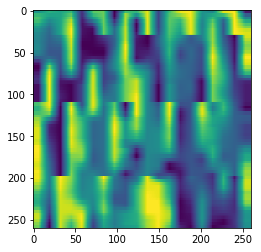

In [183]:
muse2=pd.read_csv("/home/ubuntu/anaconda3/museMonitor_test.csv",sep=',')
muse2=muse2.drop(['TimeStamp','Elements','HeadBandOn','HSI_AF7','HSI_AF8'],1)
muse2=muse2.drop([3])
muse2=muse2[['Delta_TP9', 'Delta_AF7', 'Delta_AF8', 'Delta_TP10', 'Theta_TP9',
       'Theta_AF7', 'Theta_AF8', 'Theta_TP10', 'Alpha_TP9', 'Alpha_AF7',
       'Alpha_AF8', 'Alpha_TP10', 'Beta_TP9', 'Beta_AF7', 'Beta_AF8',
       'Beta_TP10', 'Gamma_TP9', 'Gamma_AF7', 'Gamma_AF8', 'Gamma_TP10']]
for i in range(0,muse.shape[1]):
    muse2.iloc[:,i]=norm(muse2.iloc[:,i])
rgb2 = cv2.resize(np.array(muse2),(x, y))
x_test0=cv2.resize(np.array(rgb2),(x, y))

x_test=x_test0.reshape(1,x,y,1)

plt.imshow(rgb)

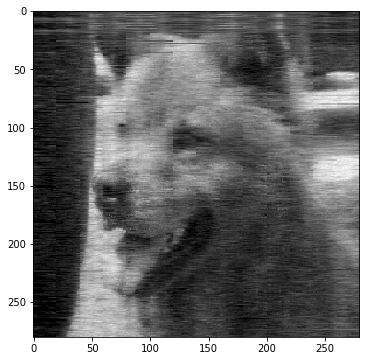

In [184]:
filename = "/home/ubuntu/anaconda3/VAE/VAE_MUSE-0.0058.hdf5"
model.load_weights(filename)
model.compile(loss='mean_squared_error', optimizer=RMS)


x_test_encoded = model.predict(x_test, batch_size=1).reshape(280,280)
plt.figure(figsize=(6, 6))
plt.imshow(x_test_encoded,cmap='gray')
plt.show()


In [185]:
np.sum(muse-muse2)

Delta_TP9    -124.061669
Delta_AF7    -361.003221
Delta_AF8    -450.798717
Delta_TP10    170.040040
Theta_TP9    -346.761408
Theta_AF7    -167.415686
Theta_AF8      64.671195
Theta_TP10   -263.702282
Alpha_TP9     -28.542672
Alpha_AF7    -644.289043
Alpha_AF8     103.703379
Alpha_TP10   -771.559112
Beta_TP9      239.678489
Beta_AF7     -897.246247
Beta_AF8     -318.980809
Beta_TP10    -573.694491
Gamma_TP9     -89.426385
Gamma_AF7    -772.369273
Gamma_AF8    -256.349970
Gamma_TP10   -372.935034
dtype: float64